## Data Exploration of HEPMASS Dataset

In [1]:
import os
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from typing import List, Tuple, Dict, Union

%matplotlib inline
sns.set()

In [2]:
from script import free_mem, set_random_seed
from script import utils 
from script.datasets.hepmass import Hepmass

In [3]:
set_random_seed(42)

Random seed 42 set.


---

Dataset loading

In [4]:
# unique mass values of the dataset
mass_values = [499.99997, 750.0, 1000.0, 1250.0, 1500.0]

In [5]:
data = Hepmass(x_scaler=None, m_scaler=None)
data.load(path=Hepmass.TRAIN_PATH)

free_mem()

loading...
dataset loaded.


0

In [7]:
data.ds.head()

f0            f1            f2            f3            f4  \
count  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   1.612529e-02  4.770024e-04  2.686593e-05  1.056081e-02 -1.050026e-04   
std    1.004417e+00  9.974865e-01  1.000080e+00  9.956003e-01  9.998670e-01   
min   -1.960549e+00 -2.365355e+00 -1.732165e+00 -9.980274e+00 -1.732137e+00   
25%   -7.288206e-01 -7.332548e-01 -8.656704e-01 -6.092291e-01 -8.658025e-01   
50%   -3.930319e-02  8.523957e-04  3.199154e-04  1.963316e-02 -5.070131e-04   
75%    6.900799e-01  7.347832e-01  8.659464e-01  6.798818e-01  8.657646e-01   
max    4.378282e+00  2.365287e+00  1.732370e+00  4.148023e+00  1.731978e+00   

                 f5            f6            f7            f8            f9  \
count  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   2.765929e-03  1.815953e-02  2.510948e-05  4.345872e-04 -6.869951e-03   
std    1.000957e+00  9.867746e-01  9.965867e-01  1.000007e+00  1.001938e+00   
min   -1.054221e+00 -3.034787e+00 -2.757853e+00 -1.732359e+00 -1.325801e+00   
25%   -1.054221e+00 -7.566092e-01 -7.014146e-01 -8.656543e-01 -1.325801e+00   
50%   -5.983562e-03 -1.499527e-01 -1.067553e-04  1.384781e-03  7.542607e-01   
75%    8.504885e-01  7.686690e-01  7.013194e-01  8.665976e-01  7.542607e-01   
max    4.482618e+00  3.720345e+00  2.758590e+00  1.731450e+00  7.542607e-01   

       ...           f17           f18           f19           f20  \
count  ...  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   ...  4.960189e-03  1.164789e-02 -1.127098e-04  7.686740e-05   
std    ...  1.001006e+00  1.002725e+00  1.000038e+00  1.000033e+00   
min    ... -8.154401e-01 -1.728284e+00 -2.281867e+00 -1.731758e+00   
25%    ... -8.154401e-01 -7.423630e-01 -7.206846e-01 -8.656855e-01   
50%    ... -8.154401e-01 -8.992496e-02 -6.735953e-05 -4.424527e-04   
75%    ...  1.226331e+00  6.423185e-01  7.204921e-01  8.659566e-01   
max    ...  1.226331e+00  5.866367e+00  2.282217e+00  1.732740e+00   

                f21           f22           f23           f24           f25  \
count  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   2.909124e-04  1.228773e-02  9.778375e-03  5.269842e-03 -1.760961e-03   
std    1.000170e+00  1.010477e+00  1.005418e+00  1.009990e+00  9.844511e-01   
min   -5.736825e-01 -3.631608e+00 -4.729473e+00 -2.062223e+01 -3.452634e+00   
25%   -5.736825e-01 -5.417942e-01 -5.115522e-01 -3.543870e-01 -6.925097e-01   
50%   -5.736825e-01 -1.602760e-01 -3.144032e-01 -3.265228e-01 -3.570301e-01   
75%   -5.736825e-01  4.812194e-01  1.634892e-01 -2.337671e-01  4.753128e-01   
max    1.743123e+00  7.293420e+00  9.333287e+00  1.499064e+01  5.277313e+00   

                f26  
count  7.000000e+06  
mean   1.533137e-02  
std    9.822798e-01  
min   -2.632761e+00  
25%   -7.943804e-01  
50%   -8.828640e-02  
75%    7.610846e-01  
max    4.444690e+00  

[8 rows x 27 columns]

#### Overall View of the Dataset


In [6]:
bkg = data.ds[data.ds[data.columns['label']] == 0]
sig = data.ds[data.ds[data.columns['label']] == 1]

Histograms

In [38]:
def histogram(col: str, bins=None, hatch='//'):
    plt.title(col)
    plt.hist(sig[col], bins=bins, alpha=0.55, label='sig', color='blue', edgecolor='blue')
    plt.hist(bkg[col], bins=bins, alpha=0.7, label='bkg', color='red', histtype='step', hatch=hatch, 
             linewidth=2, edgecolor='red')
    plt.legend()

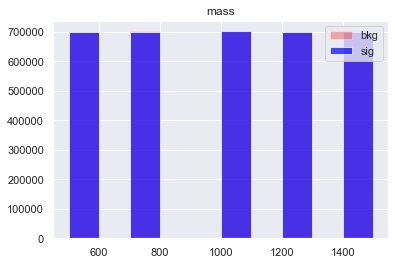

In [8]:
histogram(col=data.columns['mass'])

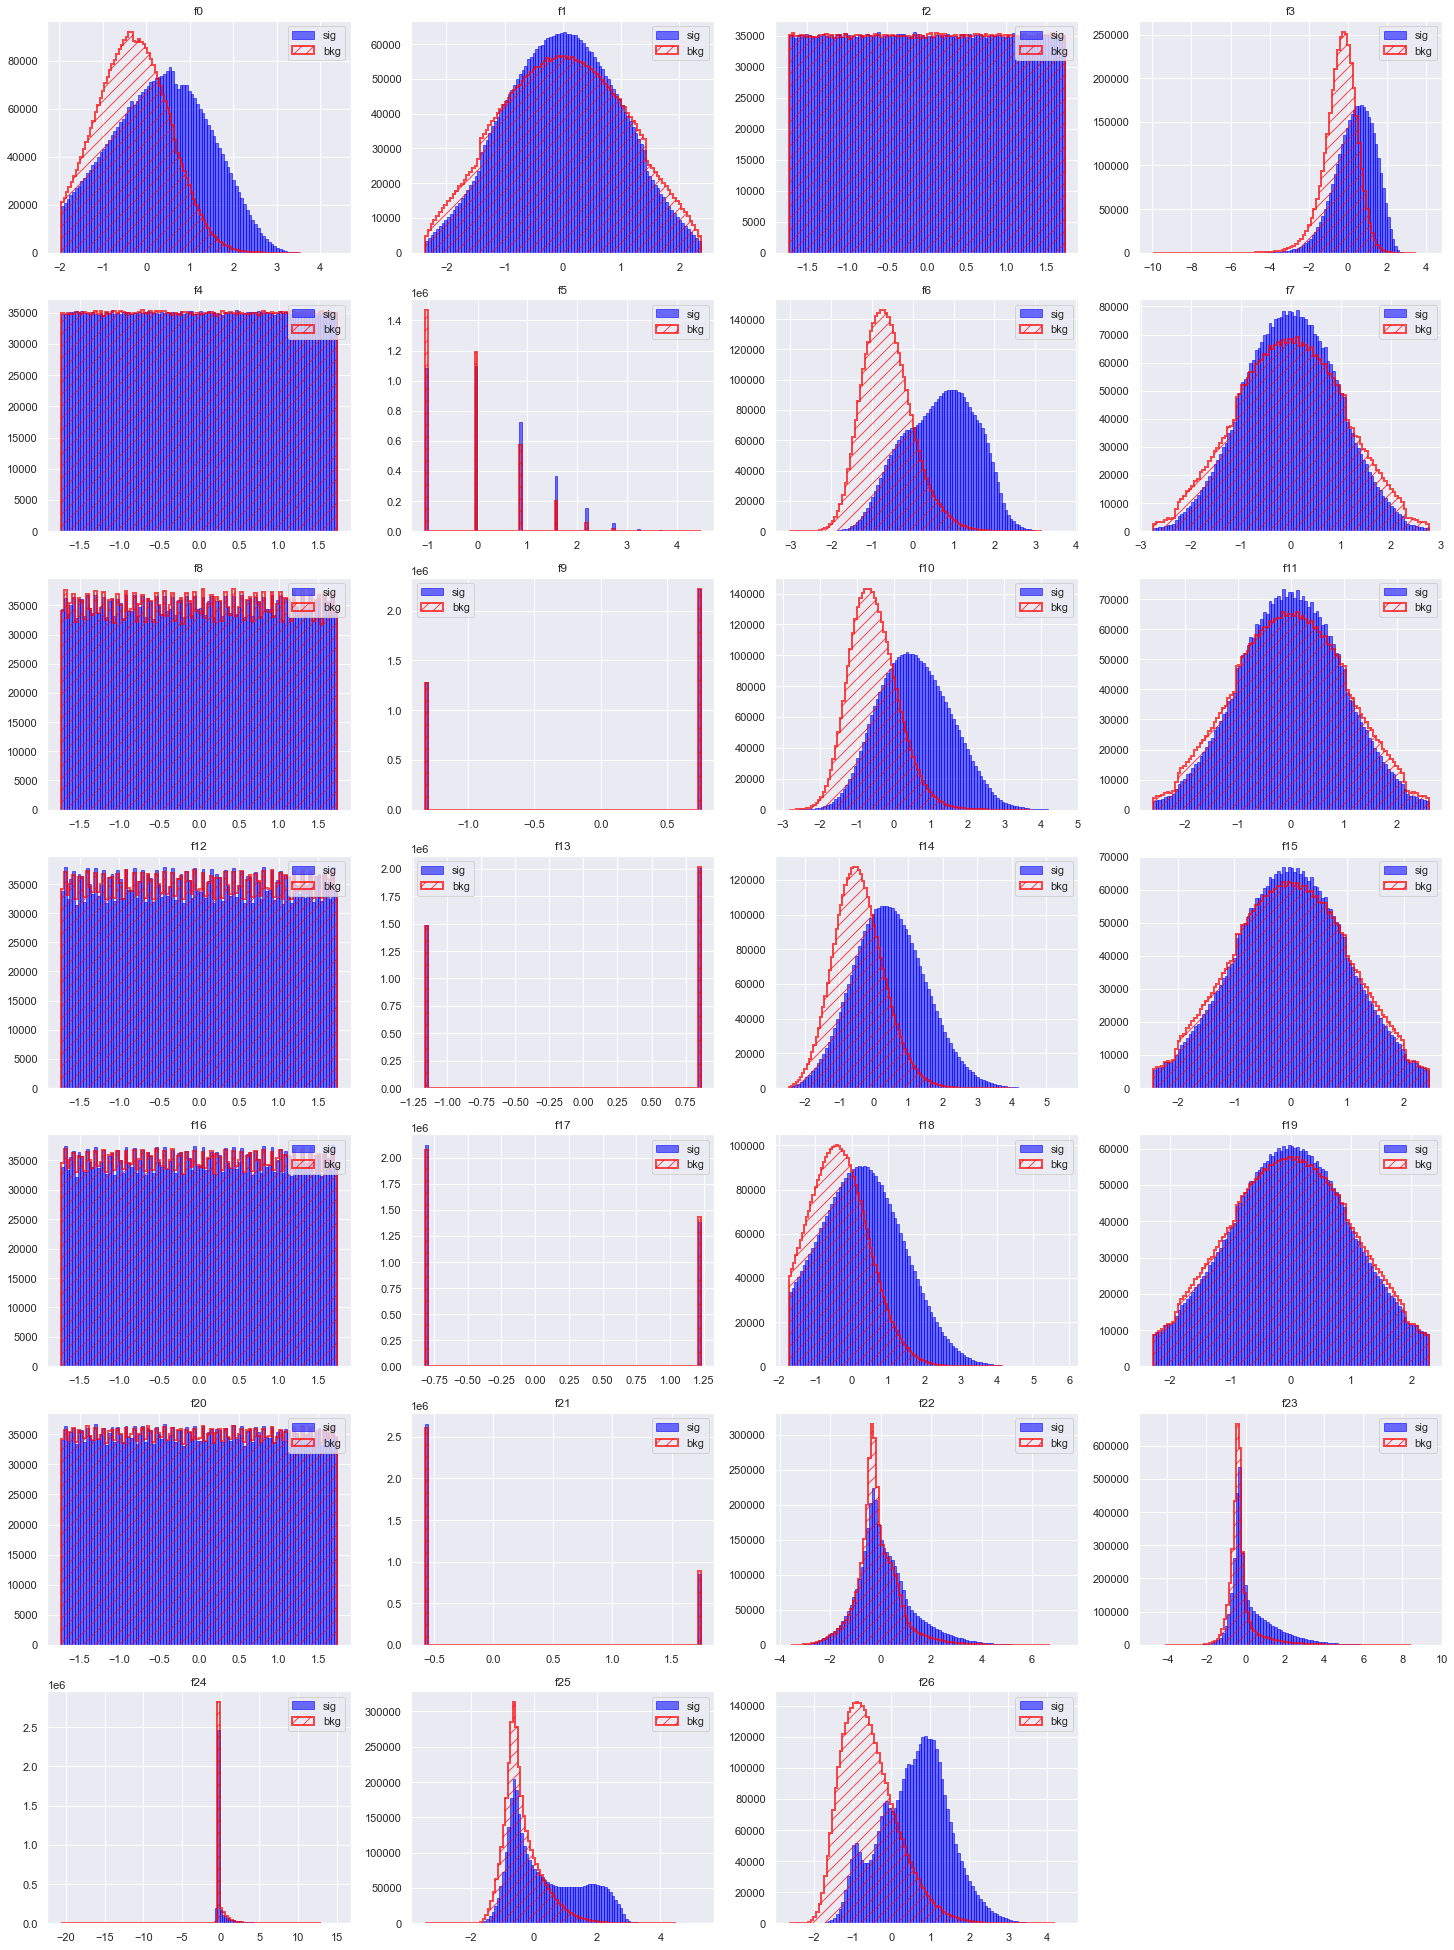

In [39]:
# compare feature distribution
plt.figure(figsize=(25, 35))

for i, col in enumerate(data.columns['feature']):
    plt.subplot(7, 4, i + 1)
    histogram(col, bins=100)

Per-mass histograms

In [44]:
def histogram_per_mass(col: str, bins=None, figsize=(25, 5), **kwargs):
    fig, axes = plt.subplots(1, len(data.unique_mass), figsize=figsize)
    fig.suptitle(f'Feature {col}')
    
    for i, mass in enumerate(data.unique_mass):
        plt.subplot(1, len(data.unique_mass), i + 1)
        plt.xlabel(f'{math.ceil(mass)} mA')
        
        x_bkg = bkg.loc[bkg.mass == mass, col]
        x_sig = sig.loc[sig.mass == mass, col]
        
        plt.hist(x_sig, bins=bins, alpha=0.55, label='sig', color='blue', edgecolor='blue')
        plt.hist(x_bkg, bins=bins, alpha=0.7, label='bkg', color='red', histtype='step', hatch='//', 
                 linewidth=2, edgecolor='red')
#         plt.hist(x_sig, bins=bins, alpha=0.55, label='sig', color='blue', edgecolor='blue')
        
    plt.legend(loc='best')


<ipython-input-44-bf268a653108>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, len(data.unique_mass), figsize=figsize)
<ipython-input-44-bf268a653108>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, len(data.unique_mass), figsize=figsize)
<ipython-input-44-bf268a653108>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

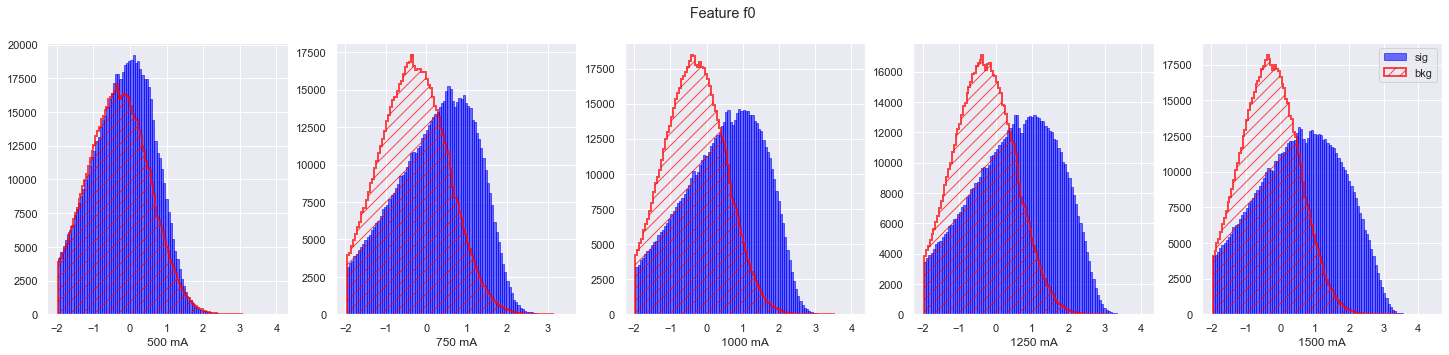

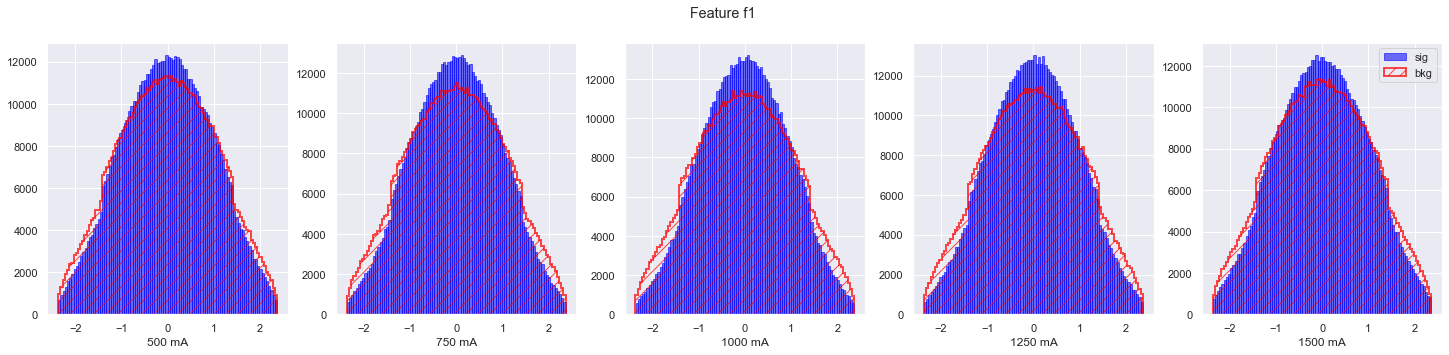

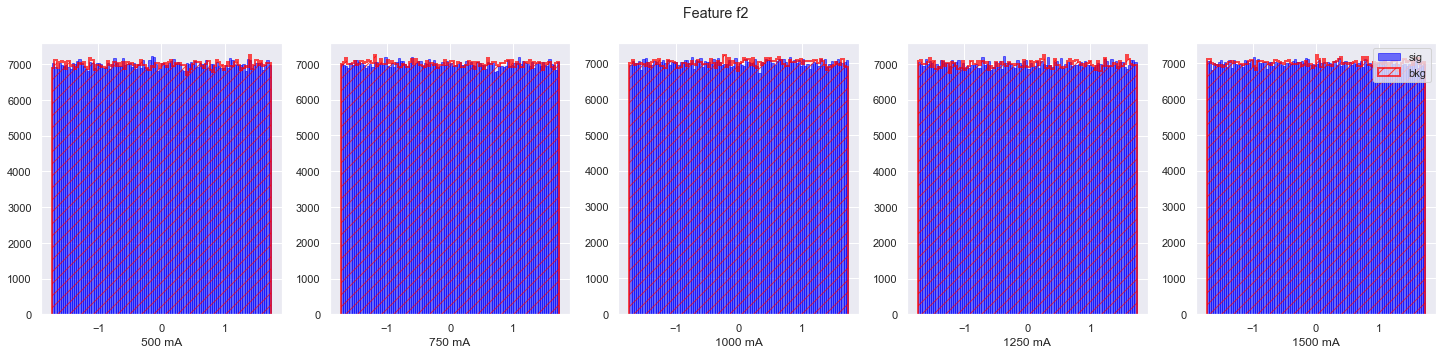

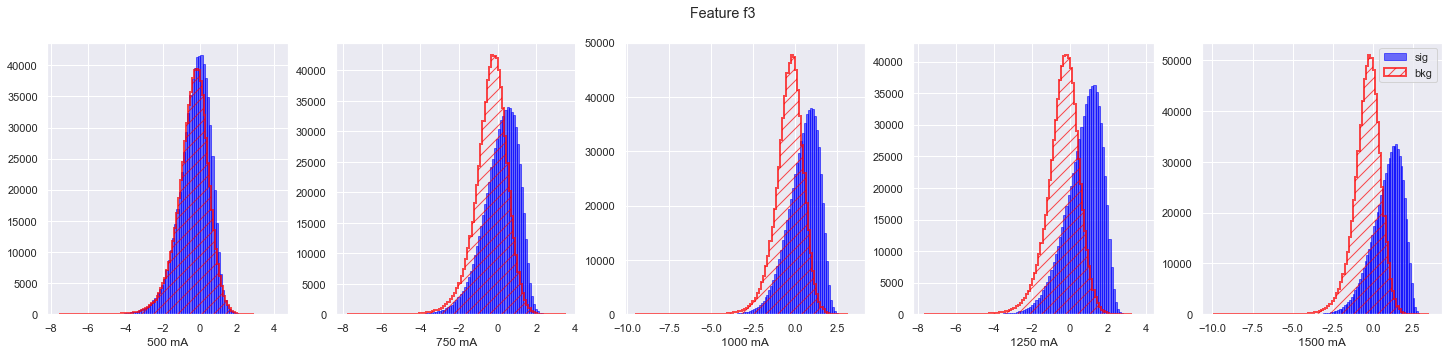

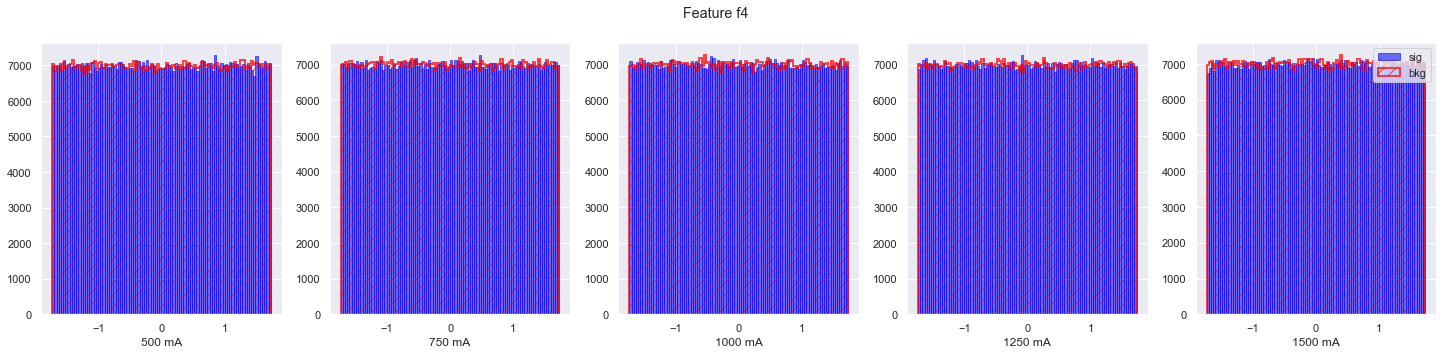

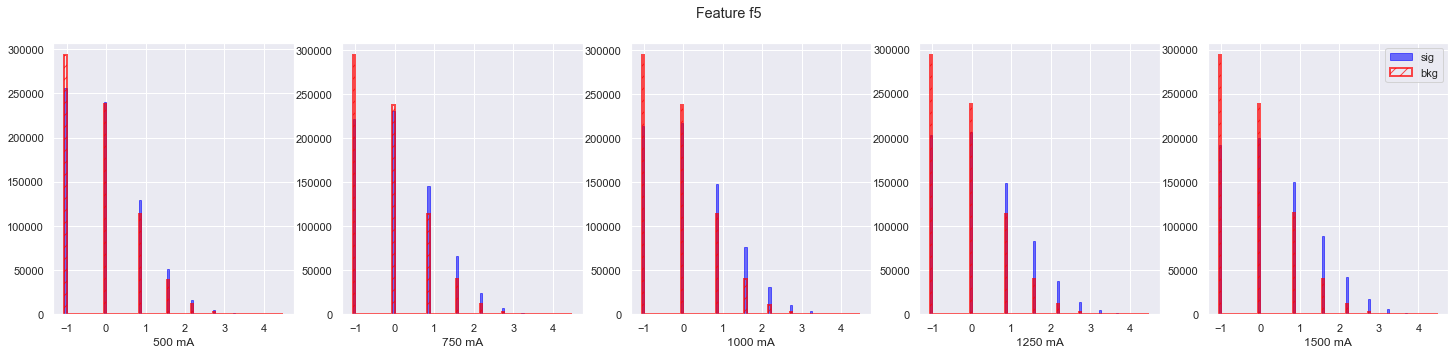

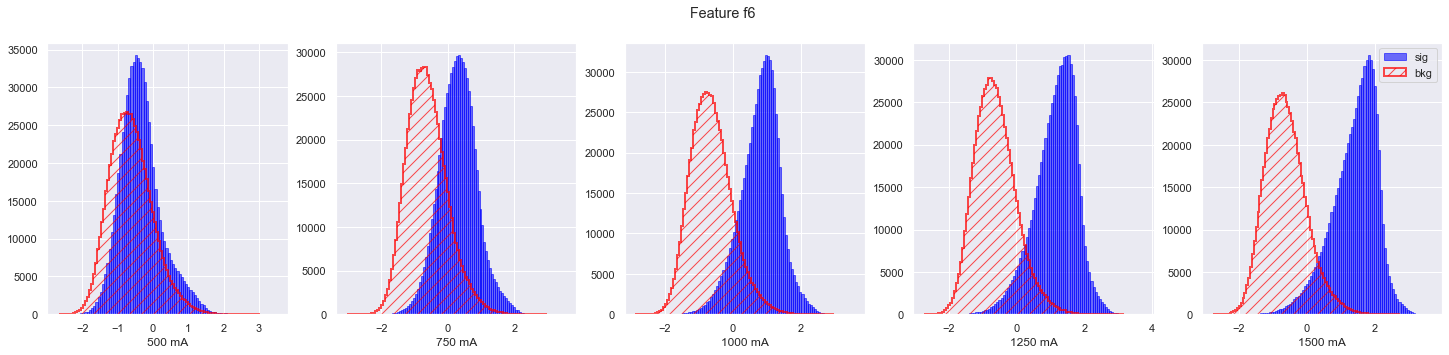

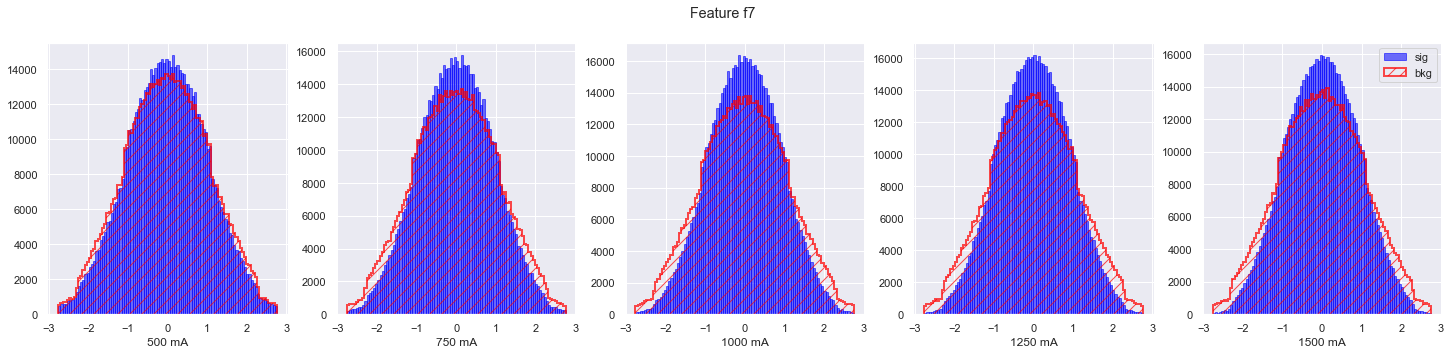

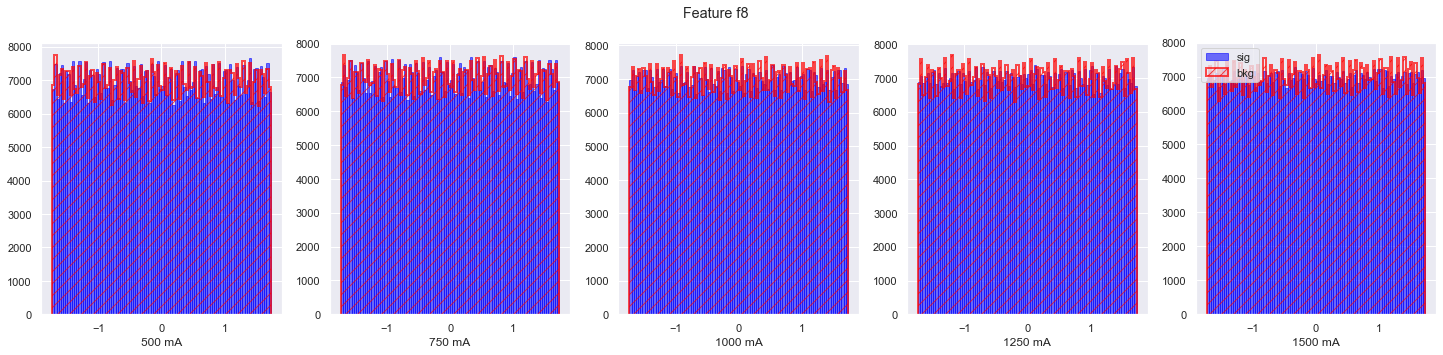

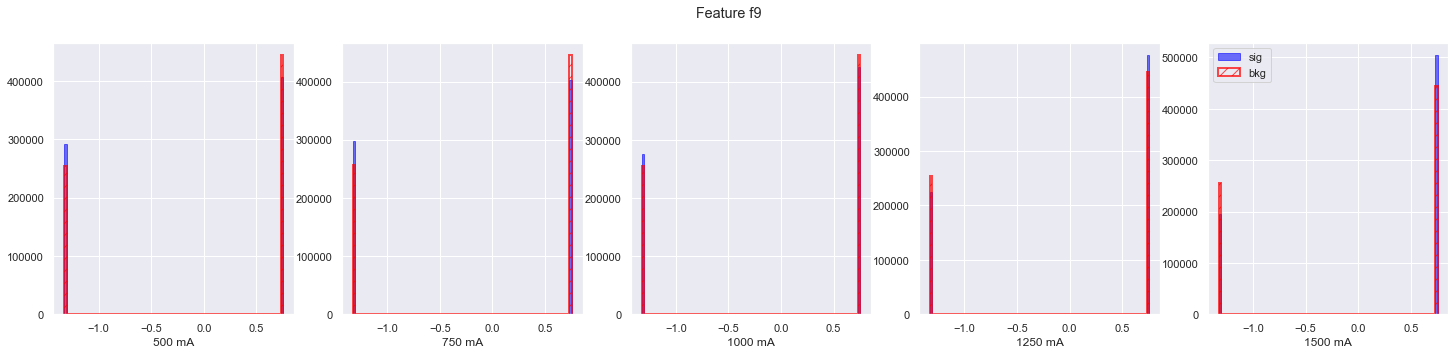

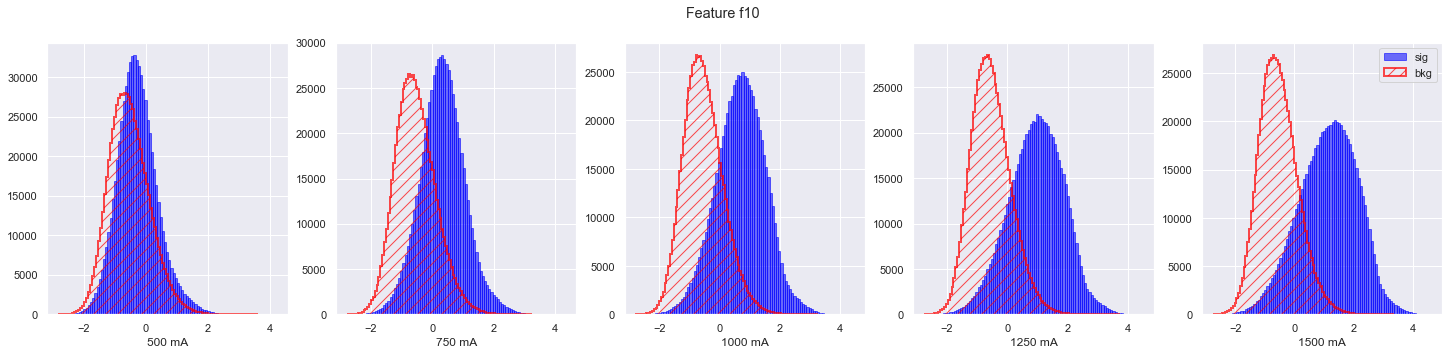

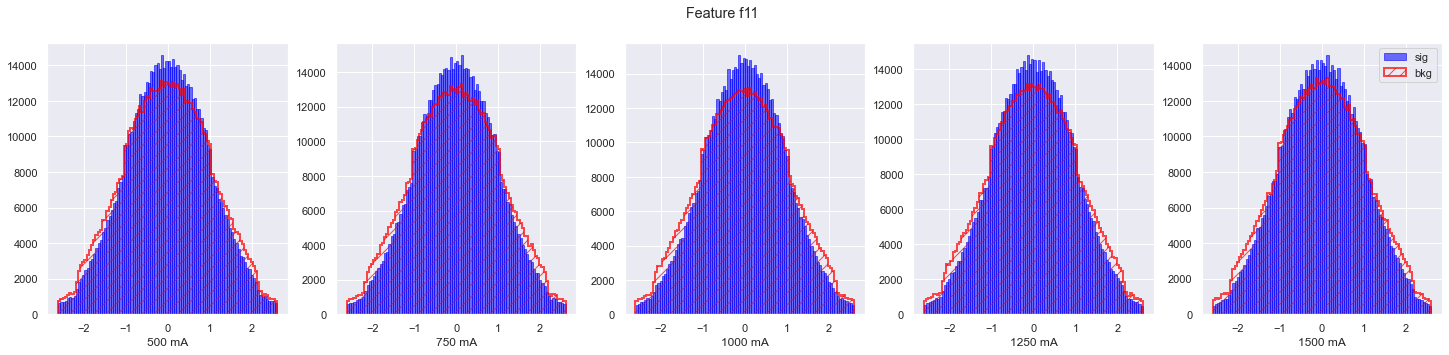

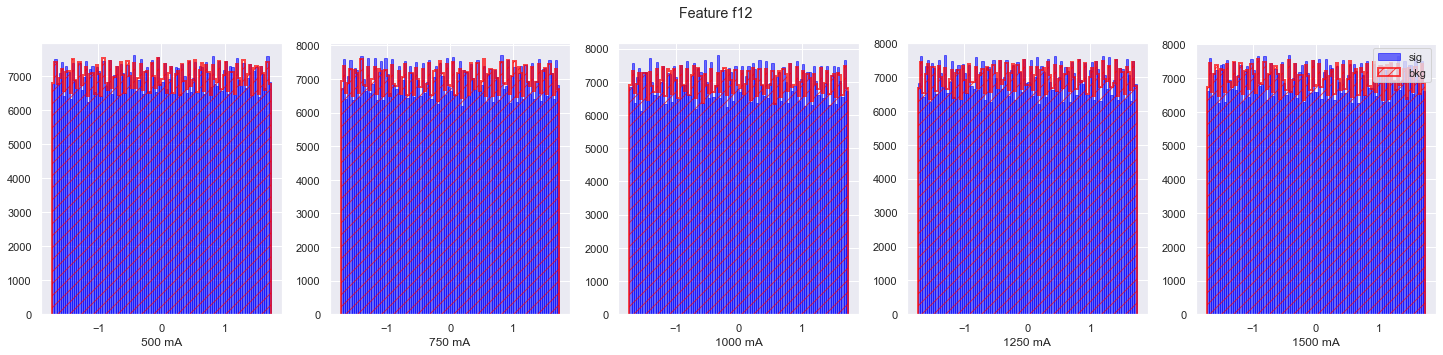

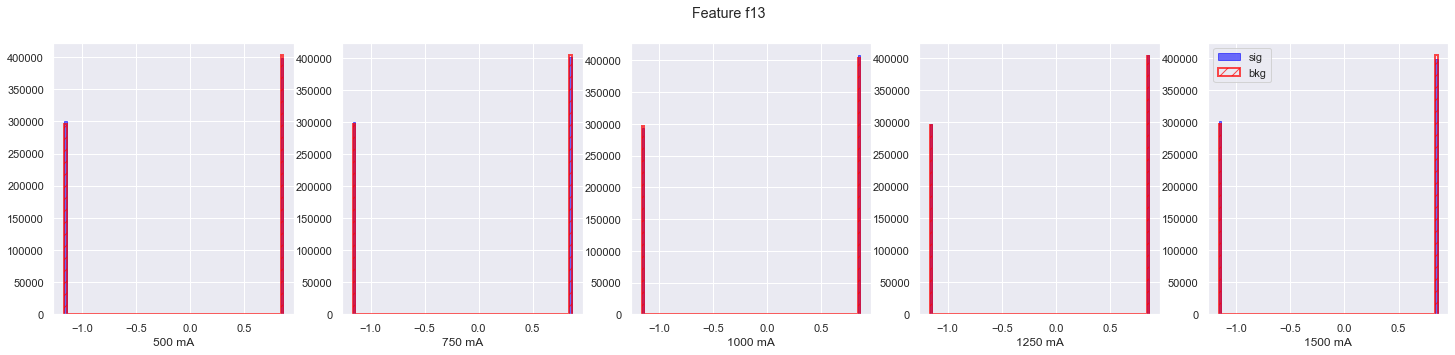

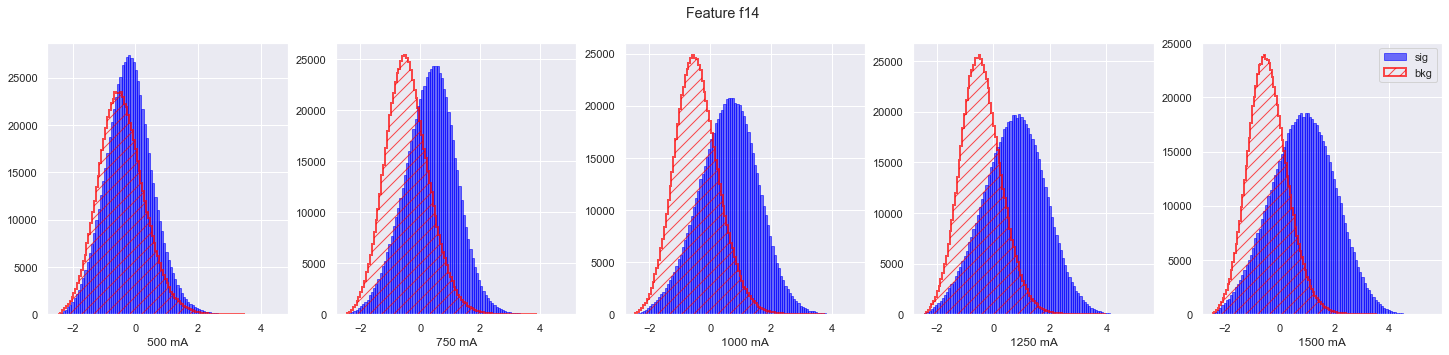

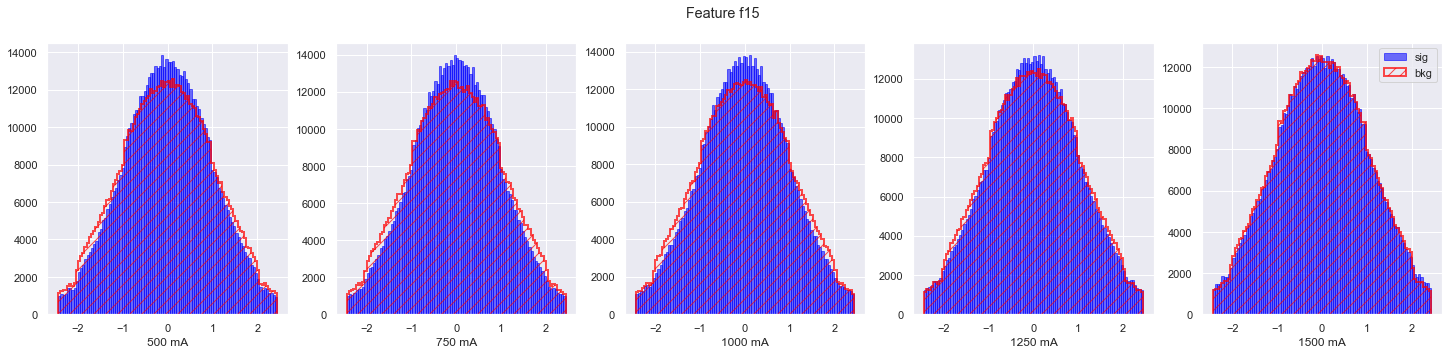

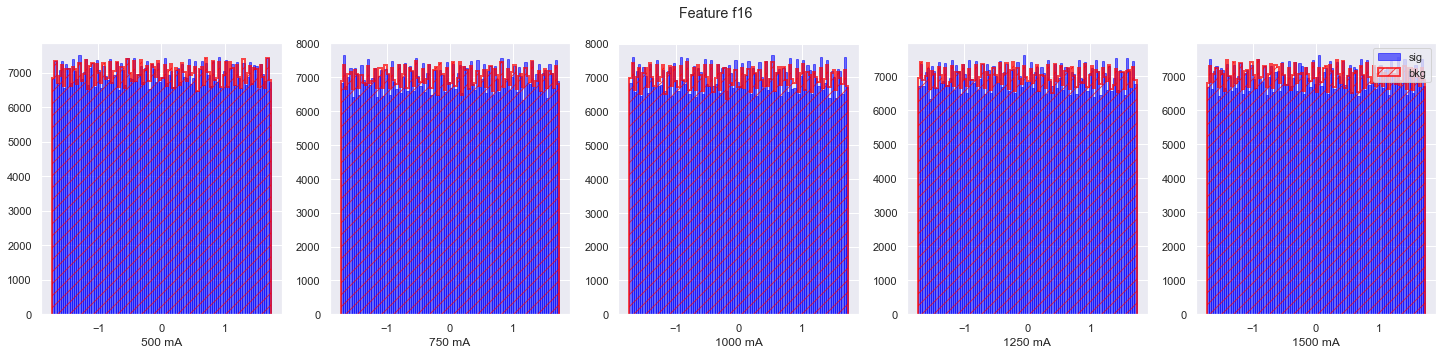

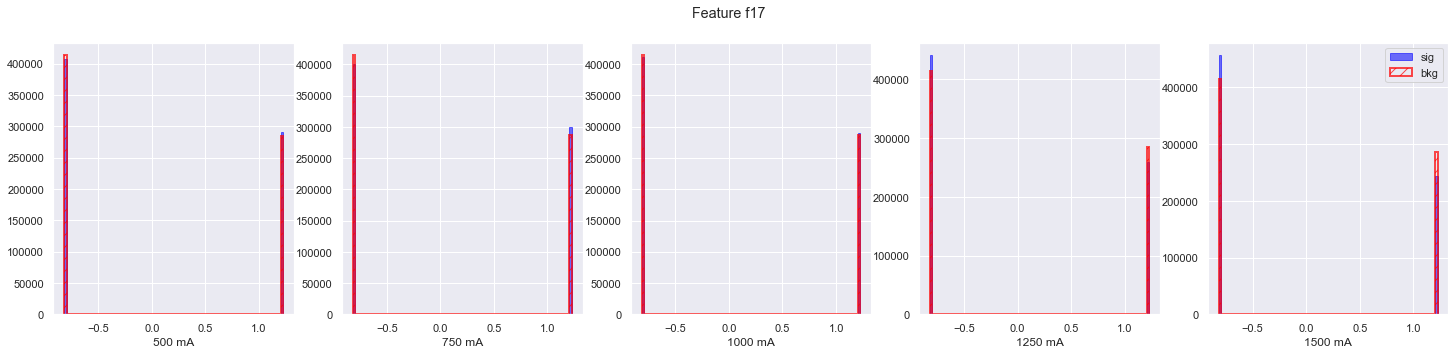

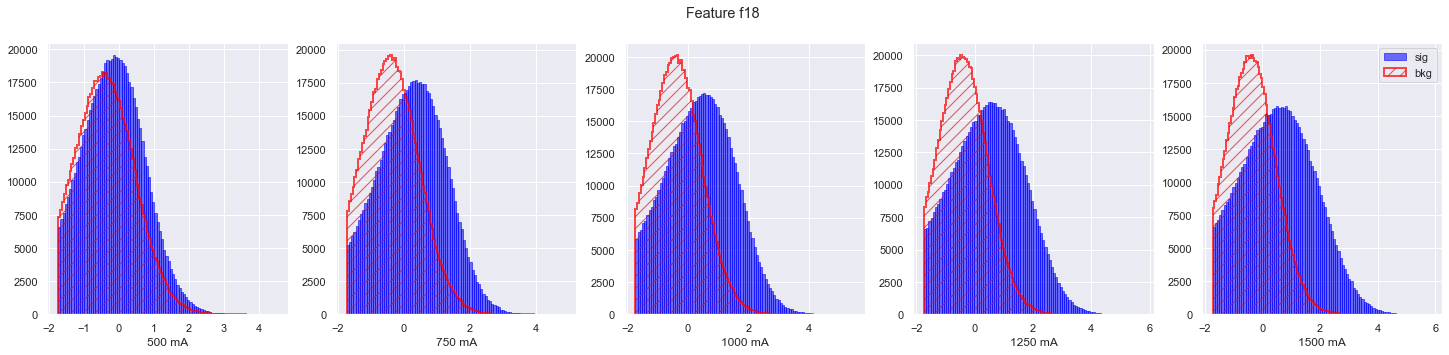

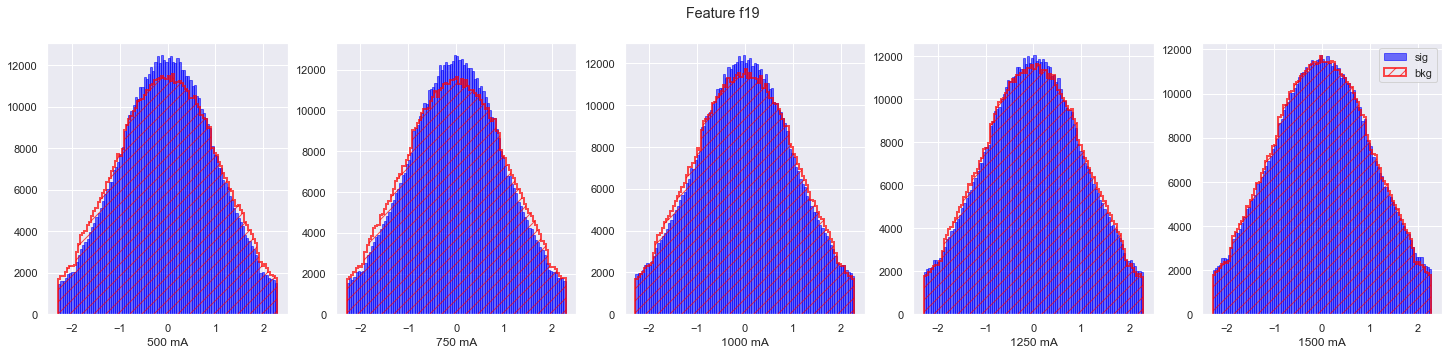

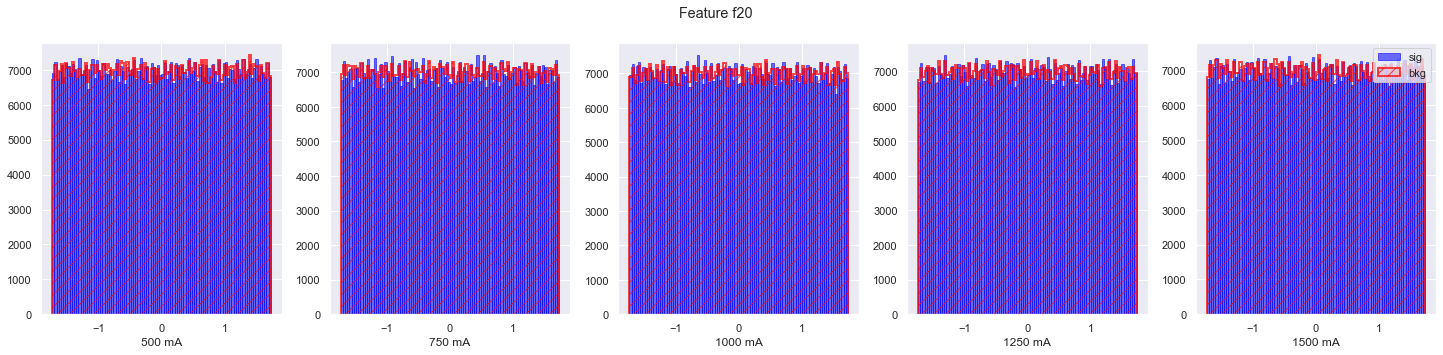

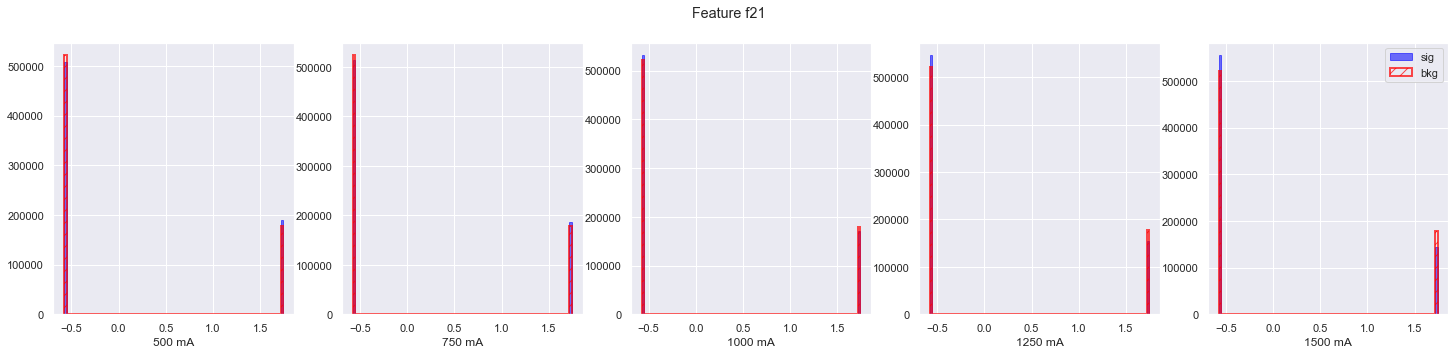

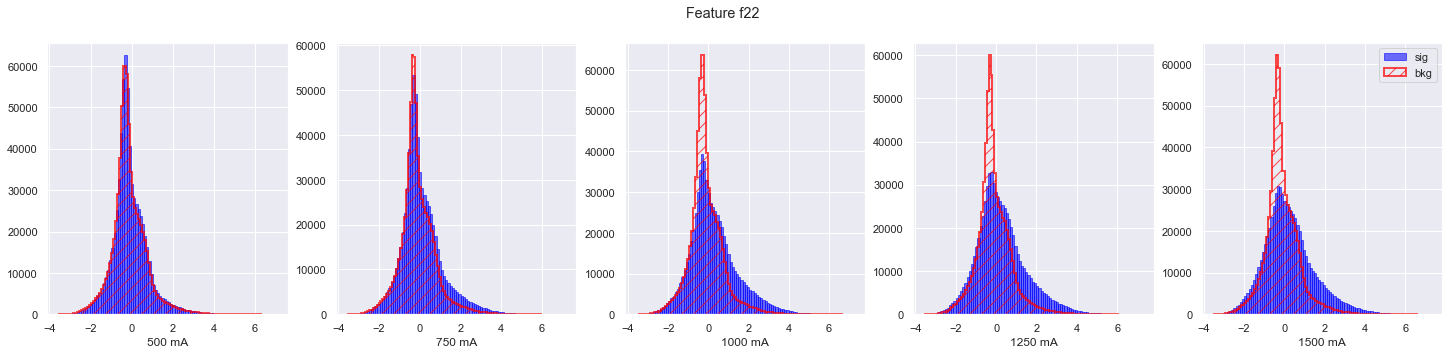

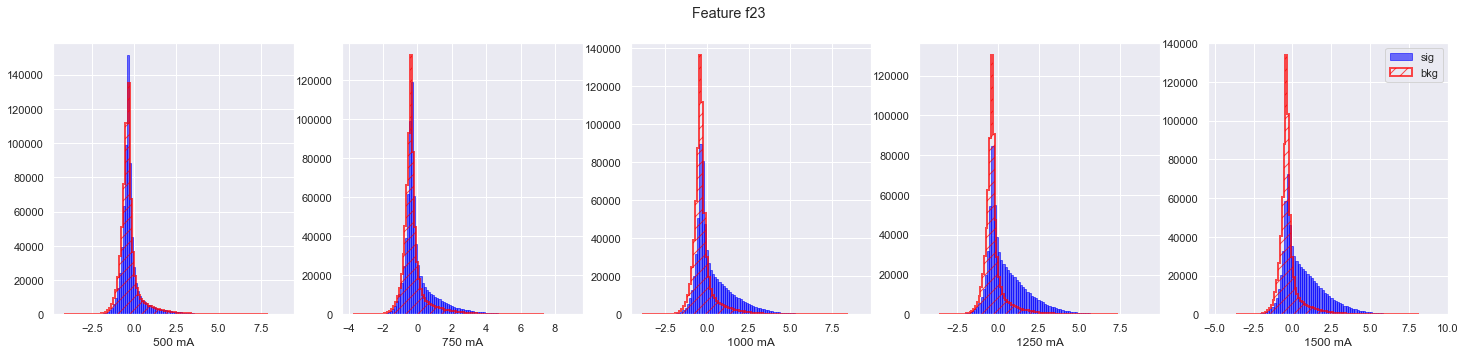

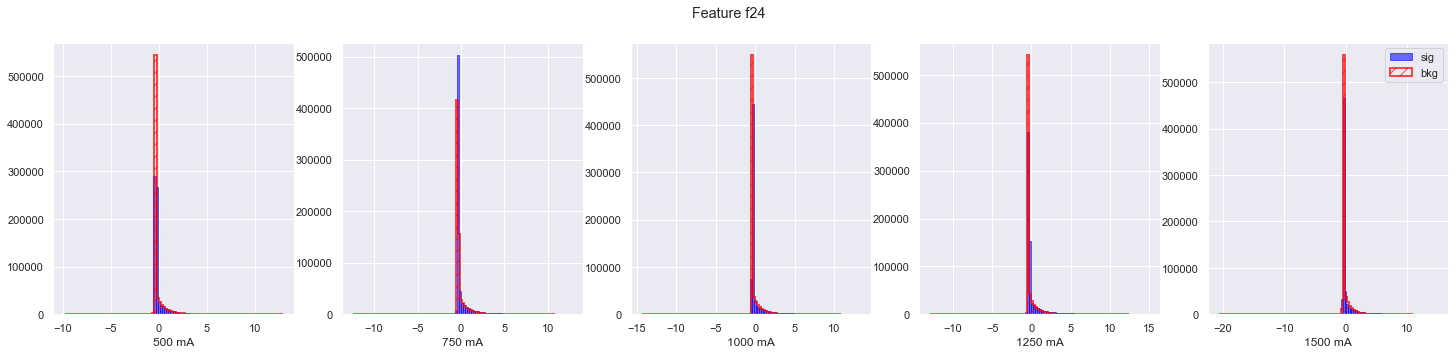

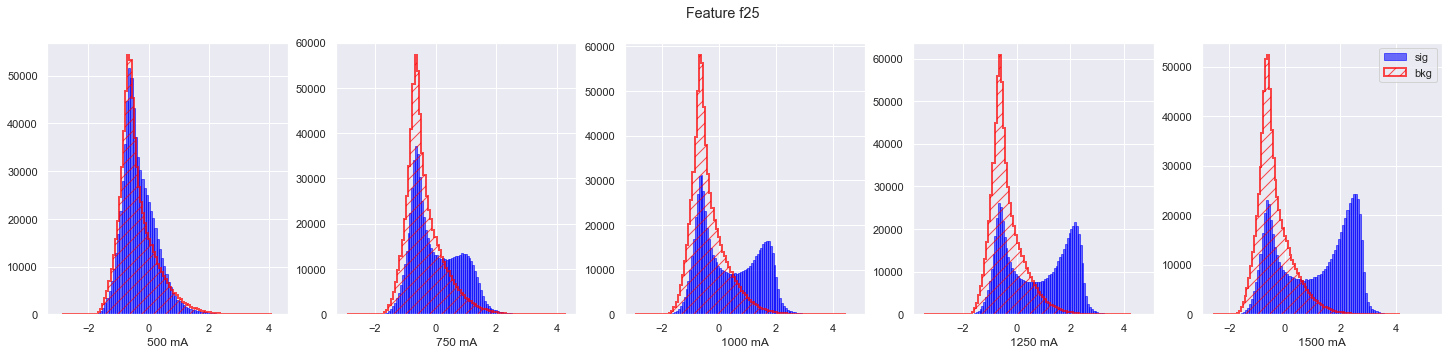

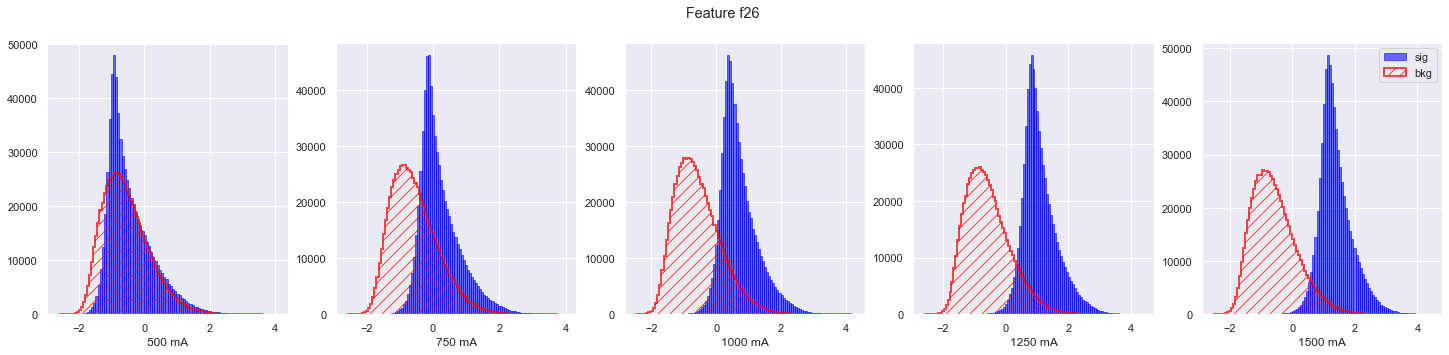

In [46]:
for i, col in enumerate(data.columns['feature']):
    histogram_per_mass(col, bins=100)

Scatterplot

In [12]:
def scatter(col: str, limit=10_000, seed=utils.SEED):
    mass_bkg = bkg[data.columns['mass']].sample(limit, random_state=seed)
    col_bkg = bkg[col].sample(limit, random_state=seed)
    
    mass_sig = sig[data.columns['mass']].sample(limit, random_state=seed)
    col_sig = sig[col].sample(limit, random_state=seed)
    
    plt.title(f'mA vs {col}')
    plt.scatter(mass_sig, col_sig, alpha=0.7, label='sig', color='blue', marker='s', s=40)
    plt.scatter(mass_bkg, col_bkg, alpha=0.3, label='bkg', color='red', marker='o', s=10)
    
    plt.xlabel('mA')
    plt.ylabel(col)
    plt.legend()

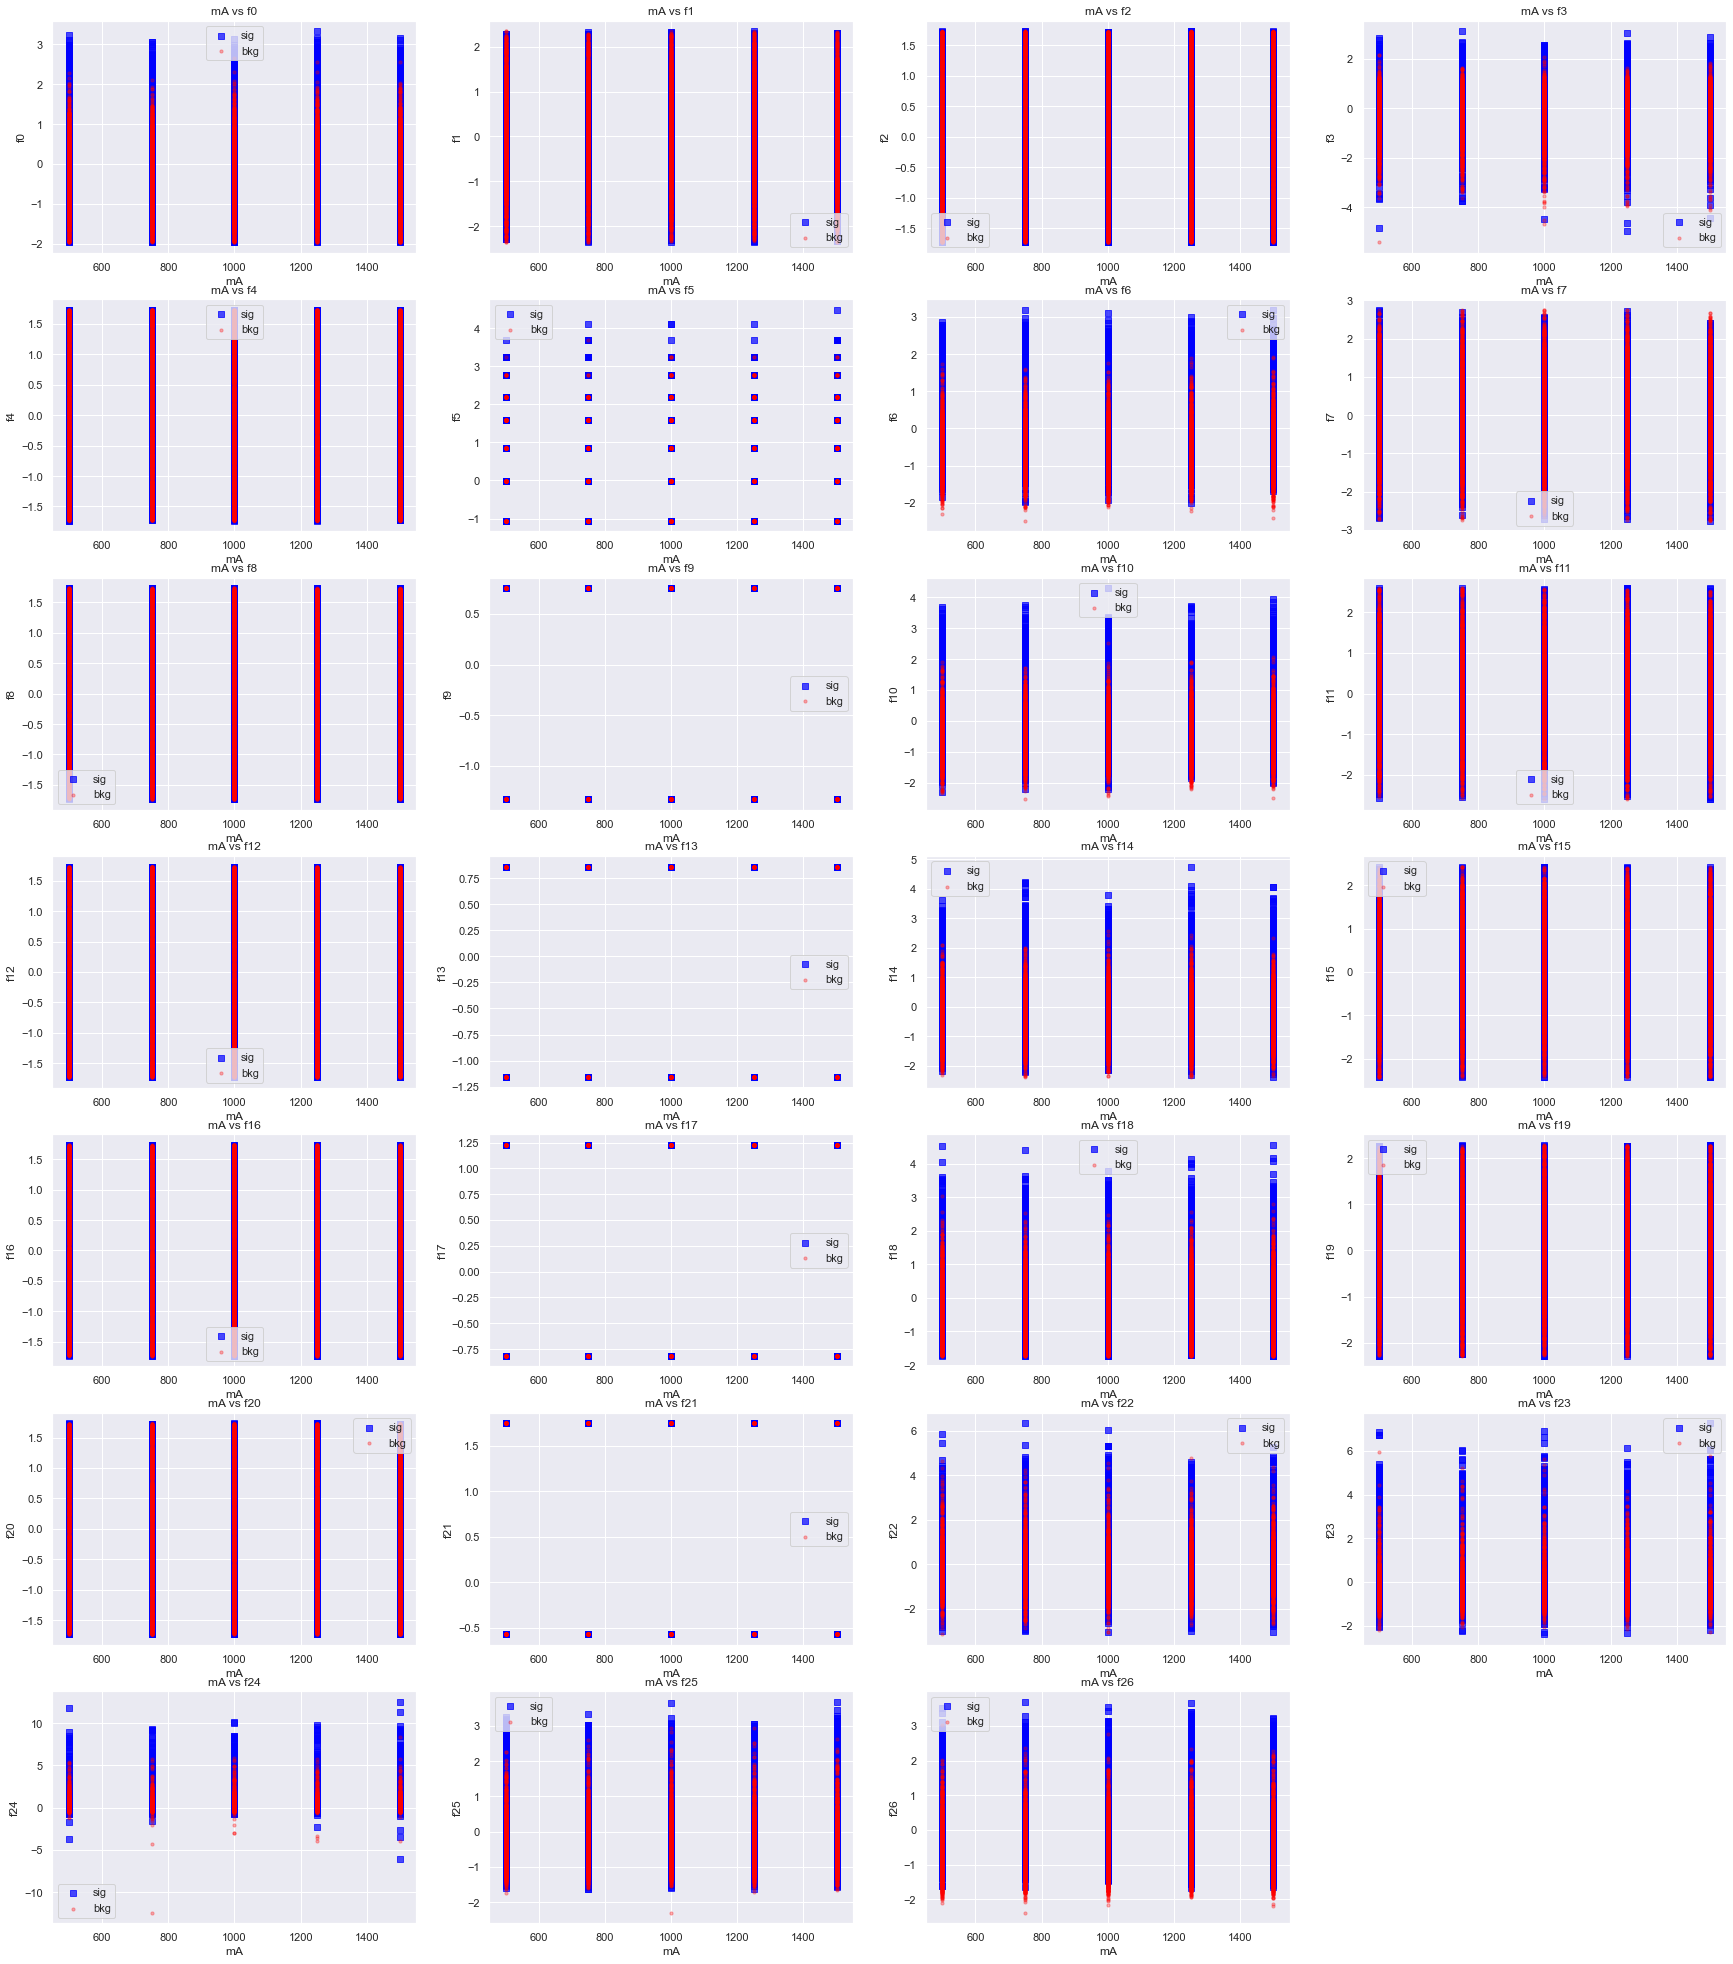

In [13]:
plt.figure(figsize=(30, 35))

for i, col in enumerate(data.columns['feature']):
    plt.subplot(7, 4, i + 1)
    scatter(col)

#### Plot Feature Distribution

<ipython-input-7-937115baafa9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
<ipython-input-7-937115baafa9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
<ipython-input-7-937115baafa9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

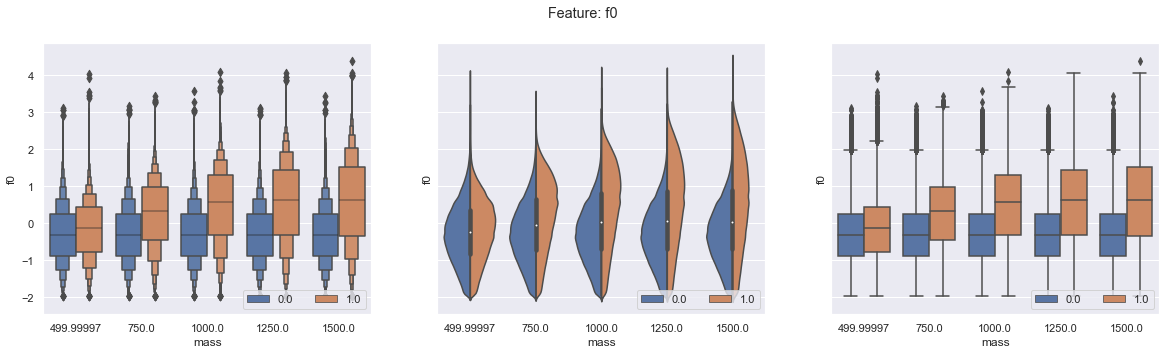

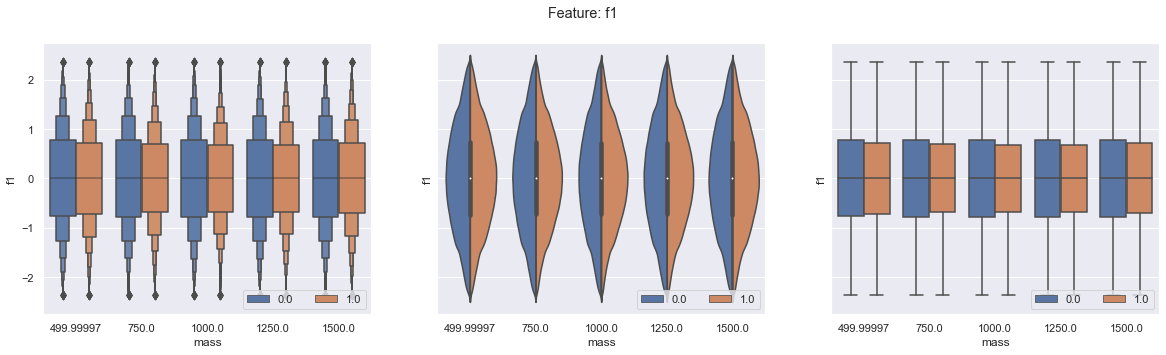

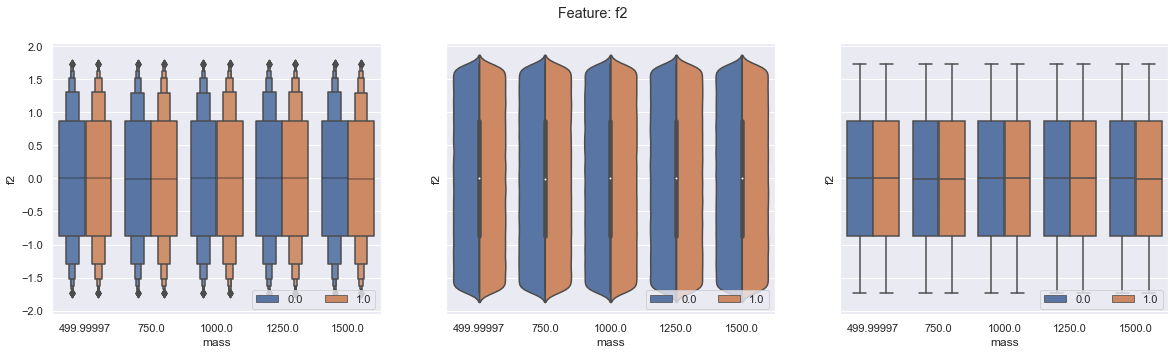

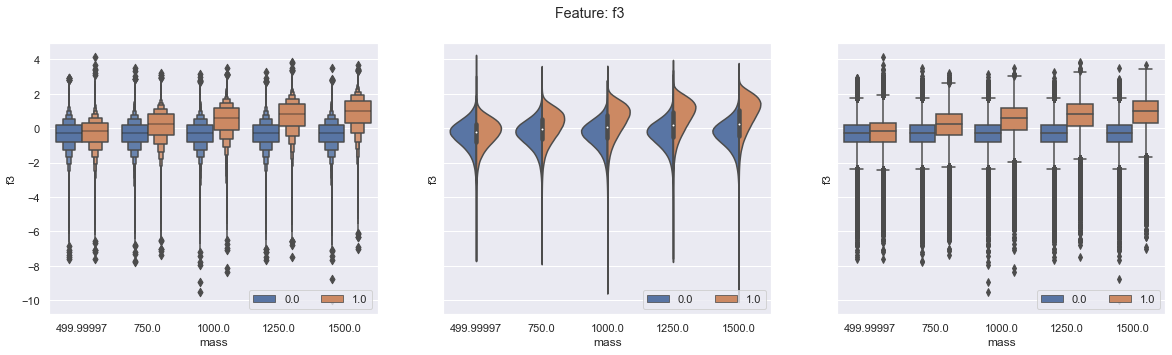

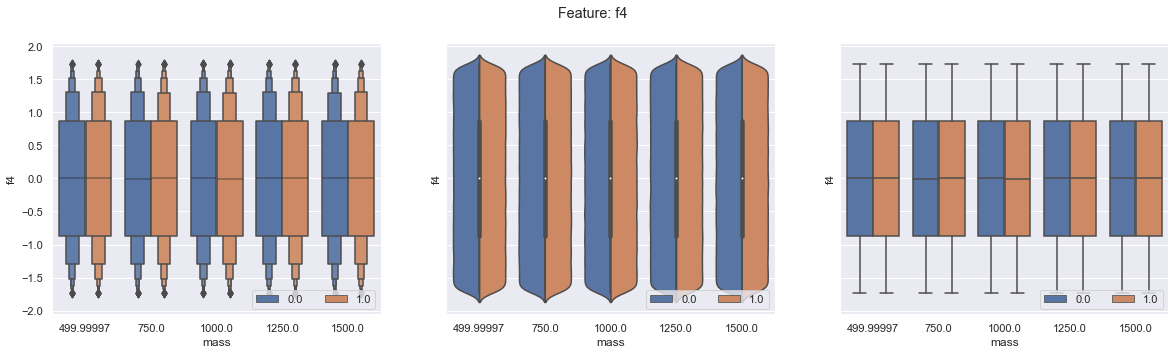

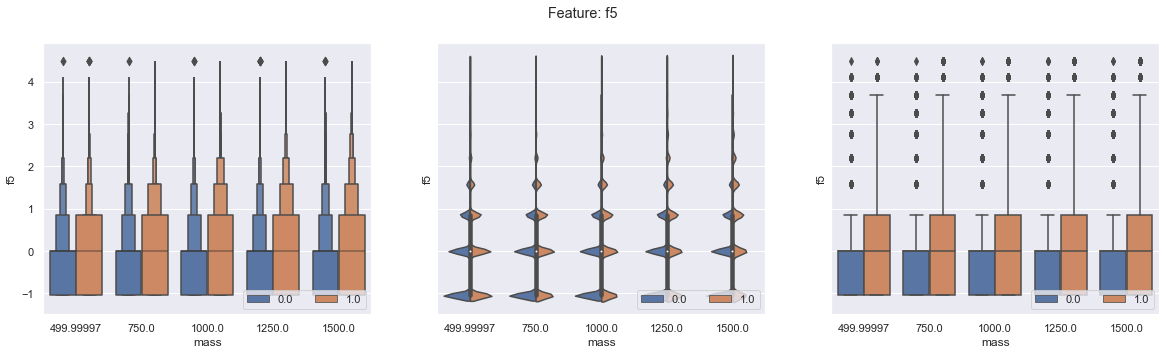

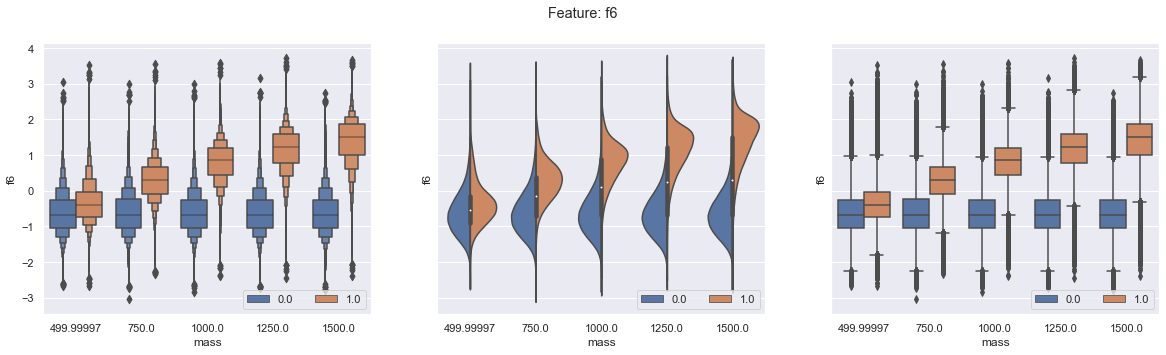

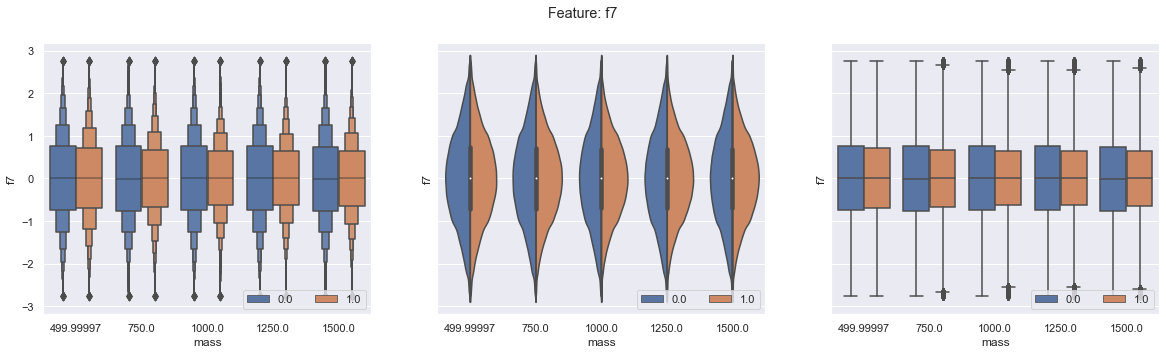

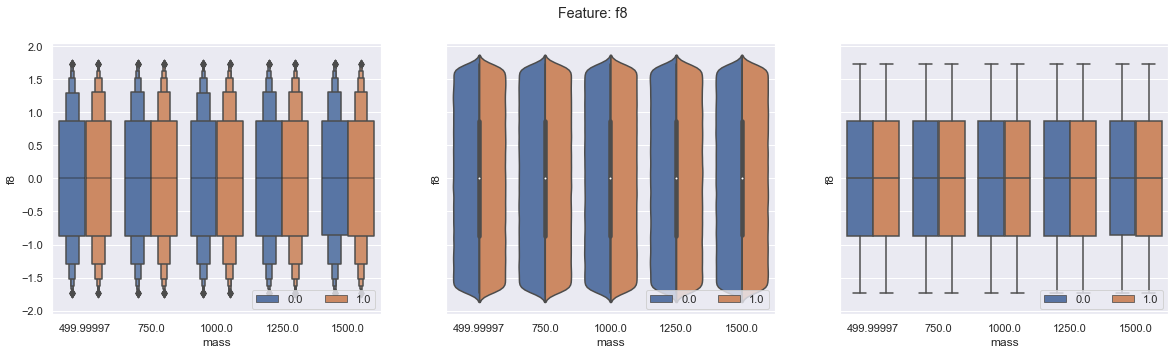

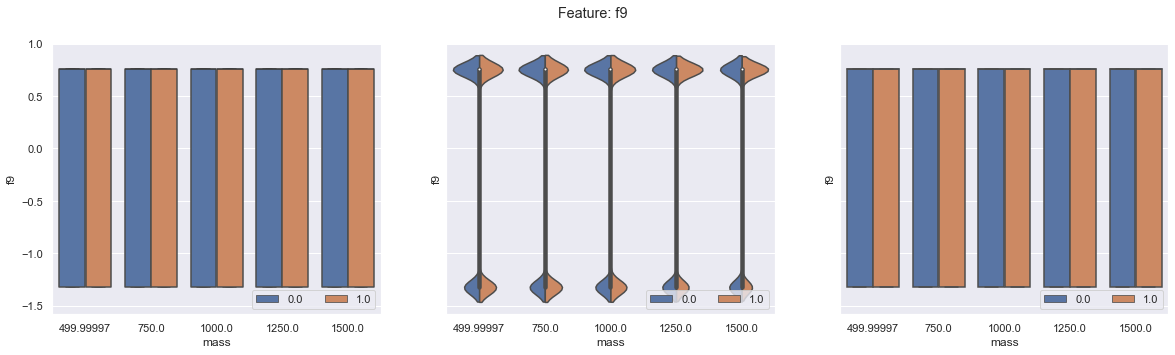

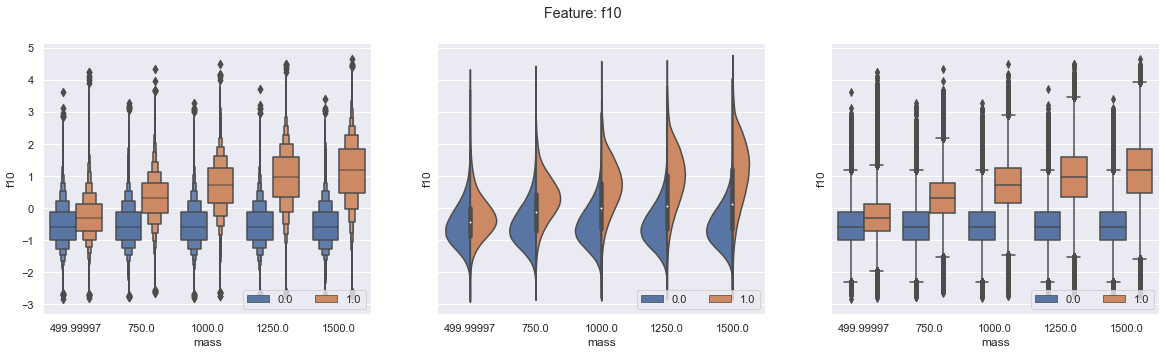

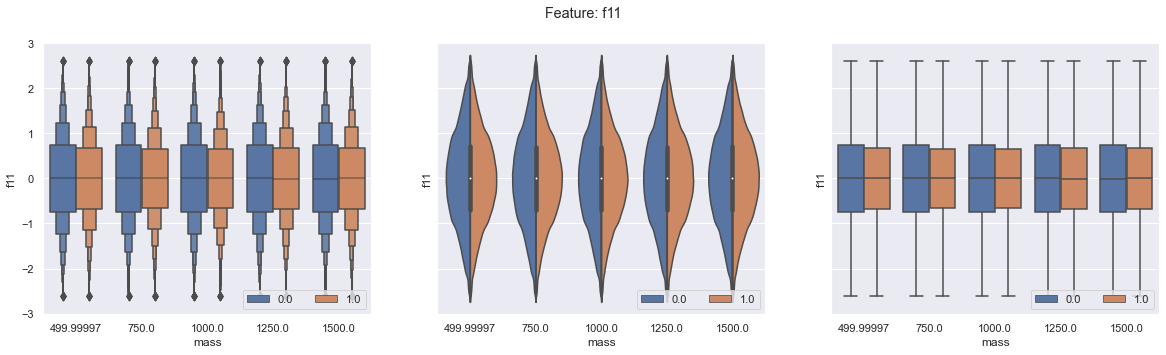

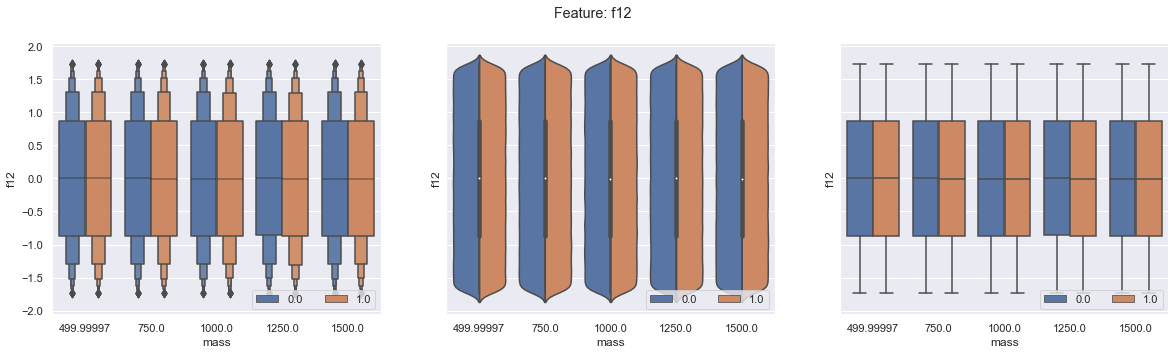

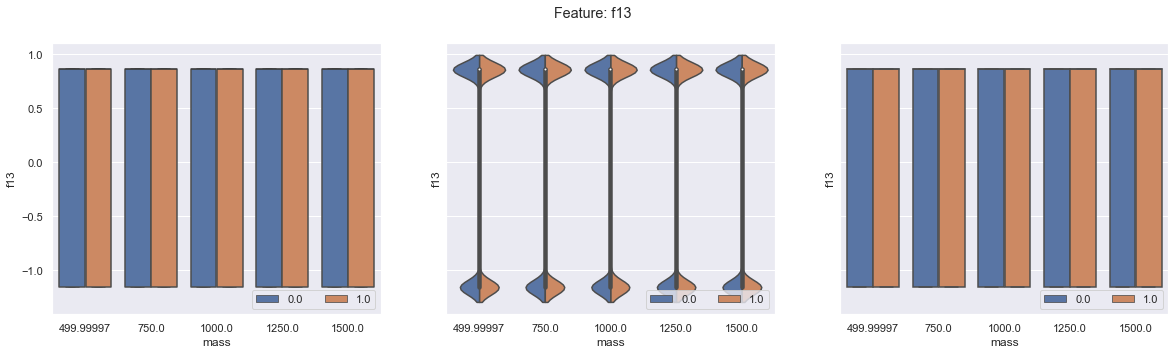

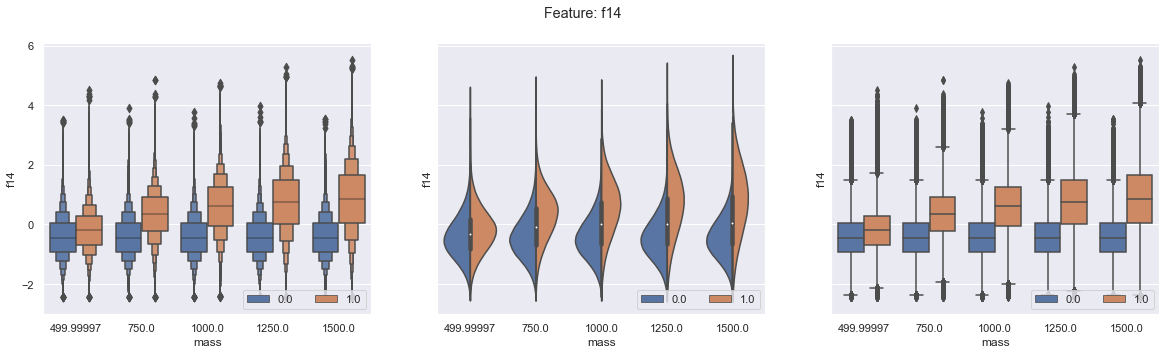

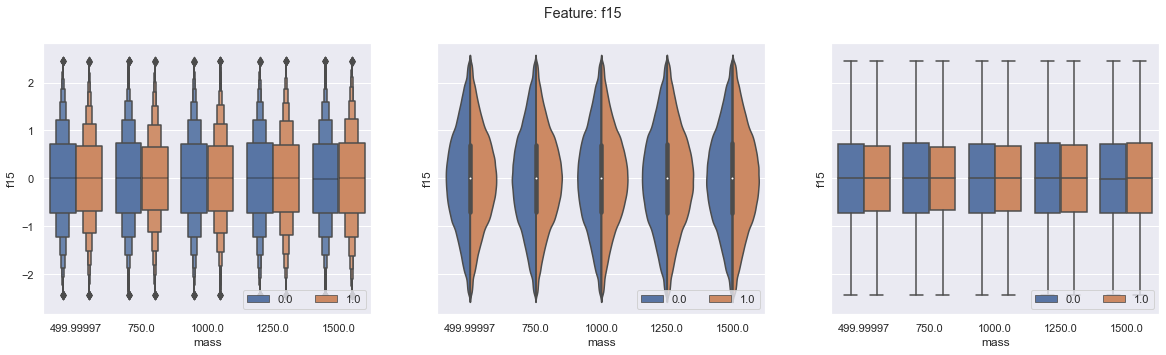

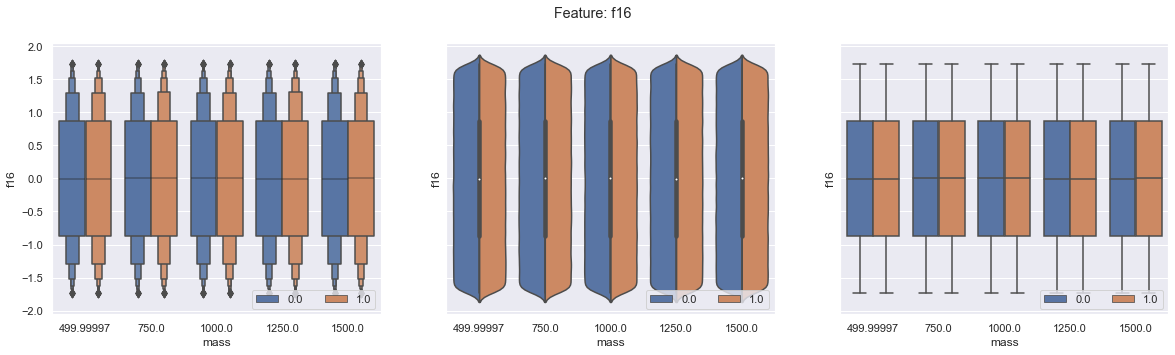

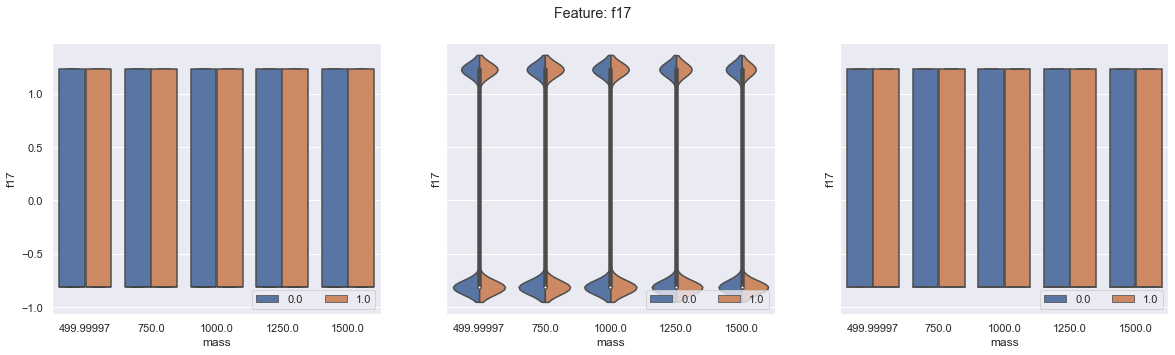

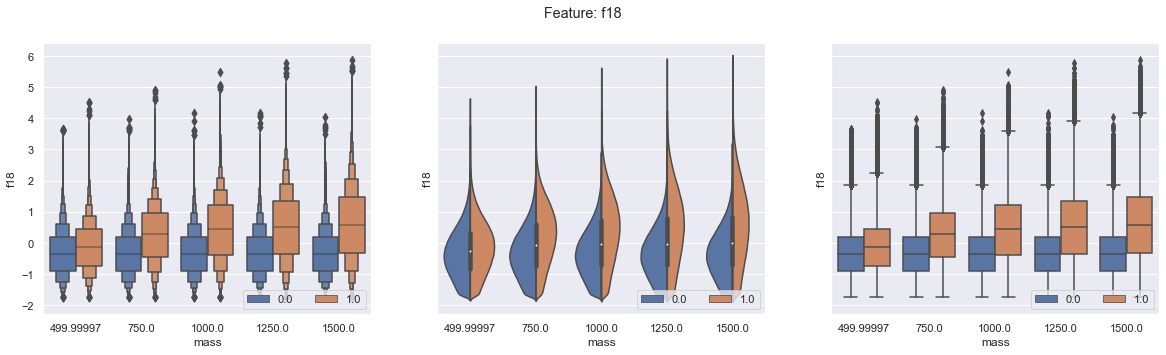

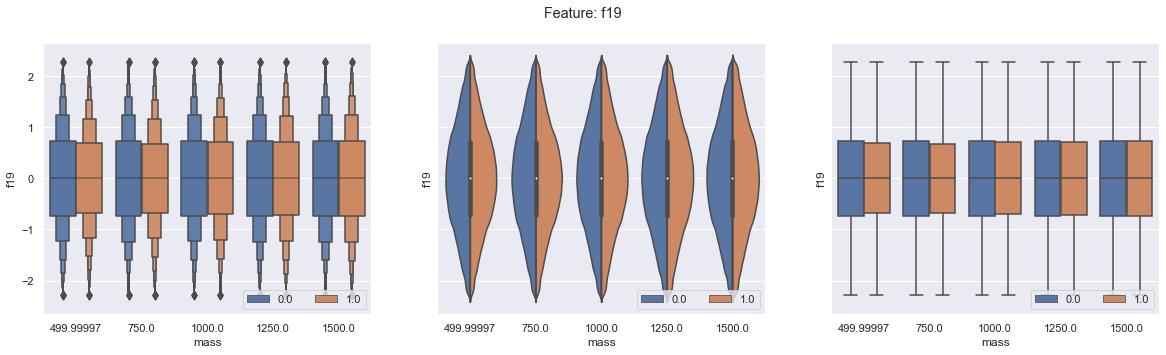

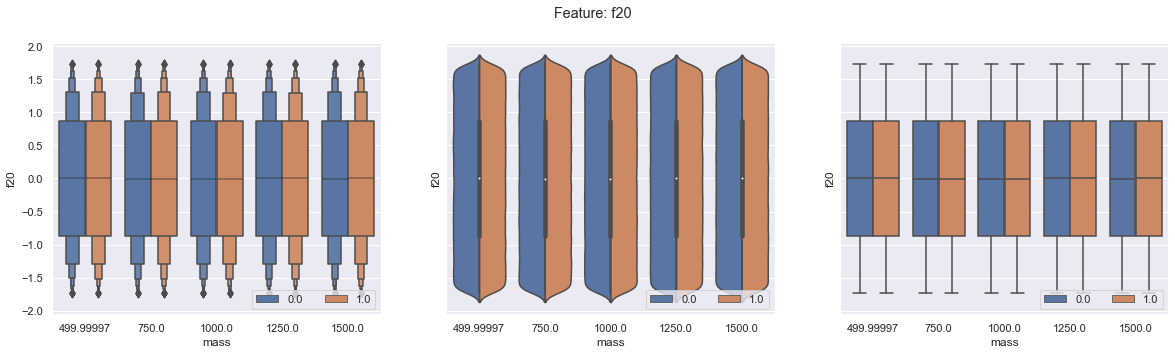

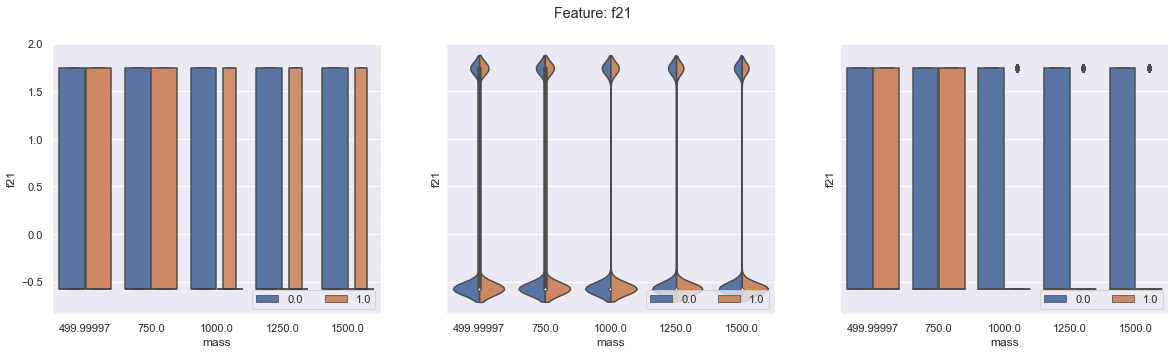

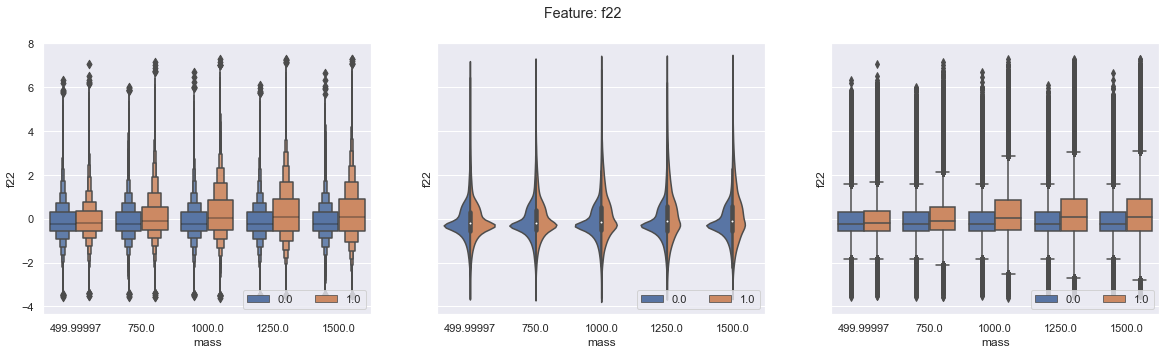

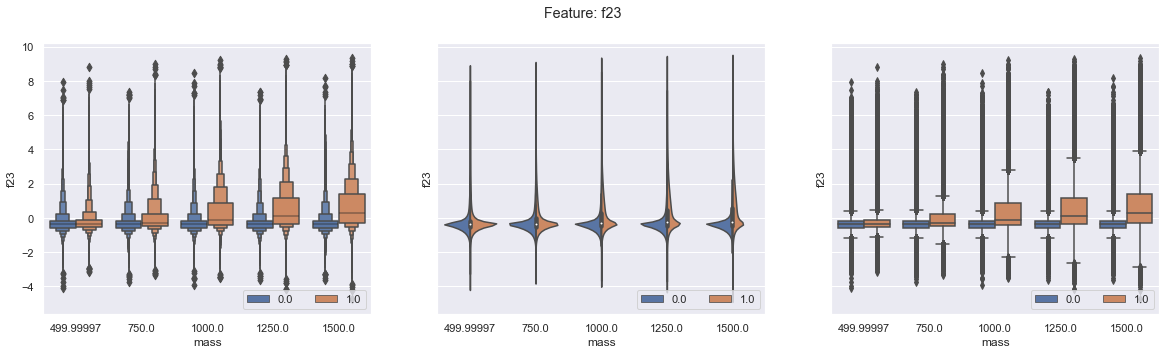

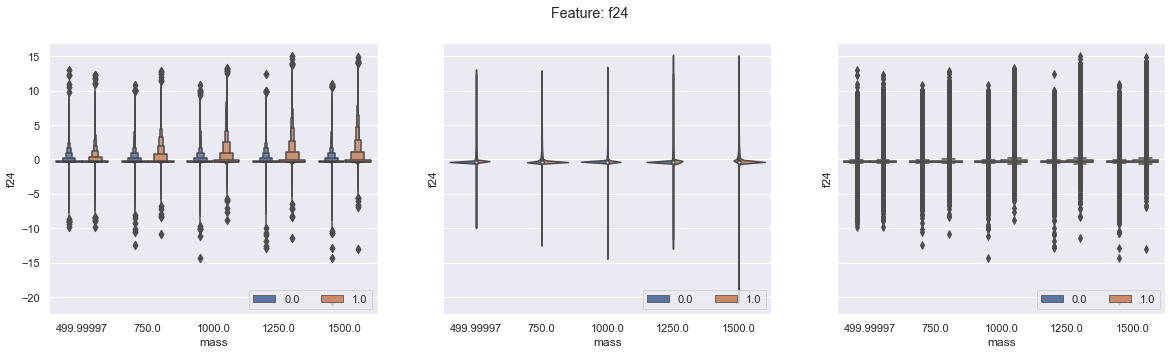

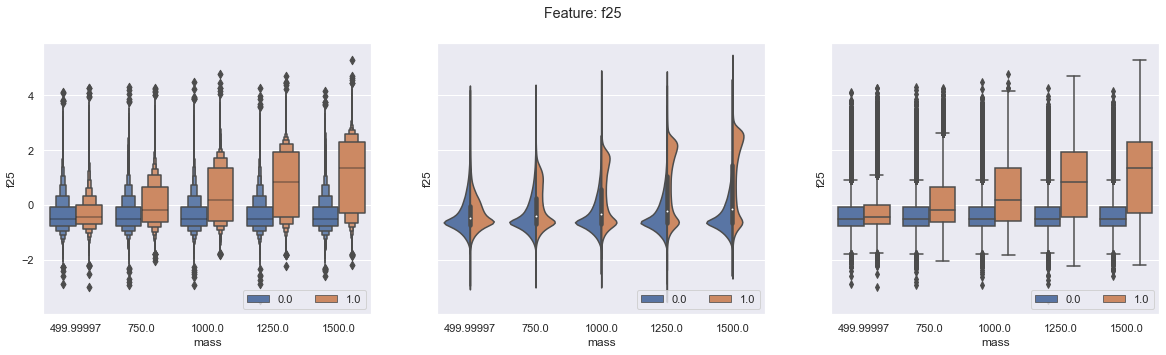

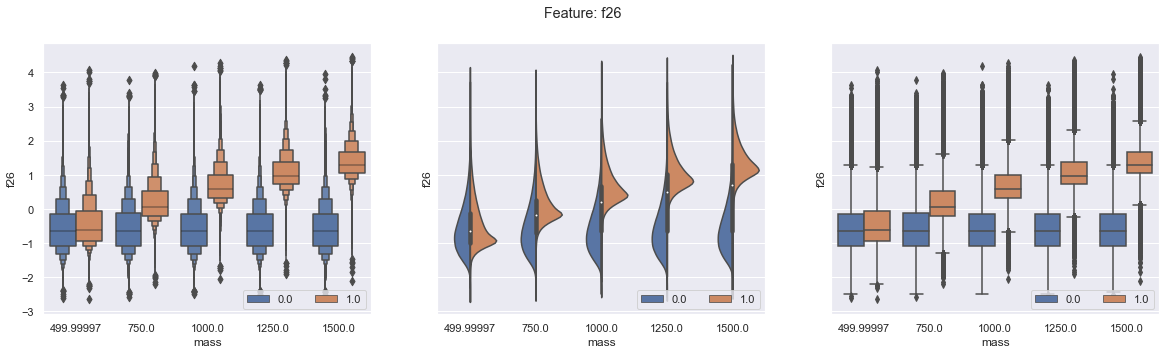

In [7]:
legend_args = dict(loc='lower right', ncol=2)

for col in data.columns['feature']:
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    fig.suptitle(f'Feature {col}')

    plot = sns.boxenplot(x='mass', y=col, hue=data.columns['label'], data=data.ds, ax=axes[0])
    plot.legend(**legend_args)

    plot = sns.violinplot(x='mass', y=col, hue=data.columns['label'], split=True, data=data.ds, ax=axes[1])
    plot.legend(**legend_args)

    plot = sns.boxplot(x='mass', y=col, hue=data.columns['label'], data=data.ds, ax=axes[2])
    plot.legend(**legend_args)
    _ = free_mem()
    

* In general, the distribution of features changes both along mass values and class.
* *bkg* tends to be more distinguishable from *sig* as mass increases.
* For $500 mA$ the feature **distribution looks almost the same** for both *sig* and *bkg* classes. This may explain the **low AUC** values, obtained on such data.

#### Principal Component Analysis

PCA on raw data

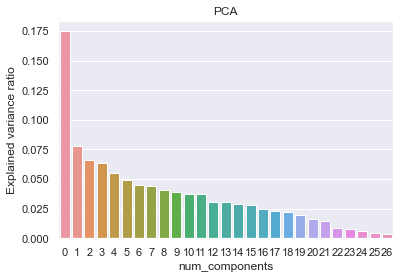

0.3185908759119005

In [7]:
pca = PCA(n_components=data.features.shape[-1], random_state=utils.SEED)
pca.fit(data.features)

utils.pca_plot(pca)

sum(pca.explained_variance_ratio_[:3])

* Each component has some variance, even if little.
* **First feature** f0 has the major variance, seems to confirm that is more important (also considering previous plots).
* Standardizing the data almost results in the same plot: for 3 components kept variance is 31.8% vs 32.0%.

PCA on min-max scaled data

In [14]:
min_max_scaler = MinMaxScaler()
_ = min_max_scaler.fit(data.features)

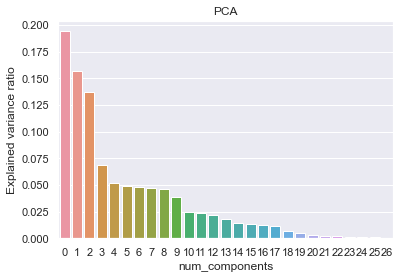

0.48880732992976816

In [12]:
pca_scaled = PCA(n_components=data.features.shape[-1], random_state=utils.SEED)
pca_scaled.fit(min_max_scaler.transform(data.features))

utils.pca_plot(pca_scaled)

sum(pca_scaled.explained_variance_ratio_[:3])

* **Min-max scaling** seems to be beneficial, allowing to retain more variance with less components.

### Robust Statistics
Clip outliers for each features, taking into account the mass. So the clipping is not global but per-mass, since each mass is as it defines a dataset with a distinct distribution of the features.

Overall view:

In [21]:
data.ds[data.columns['feature']].describe()

f0            f1            f2            f3            f4  \
count  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   1.612529e-02  4.770024e-04  2.686593e-05  1.056081e-02 -1.050026e-04   
std    1.004417e+00  9.974865e-01  1.000080e+00  9.956003e-01  9.998670e-01   
min   -1.960549e+00 -2.365355e+00 -1.732165e+00 -9.980274e+00 -1.732137e+00   
25%   -7.288206e-01 -7.332548e-01 -8.656704e-01 -6.092291e-01 -8.658025e-01   
50%   -3.930319e-02  8.523957e-04  3.199154e-04  1.963316e-02 -5.070131e-04   
75%    6.900799e-01  7.347832e-01  8.659464e-01  6.798818e-01  8.657646e-01   
max    4.378282e+00  2.365287e+00  1.732370e+00  4.148023e+00  1.731978e+00   

                 f5            f6            f7            f8            f9  \
count  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   2.765929e-03  1.815953e-02  2.510948e-05  4.345872e-04 -6.869951e-03   
std    1.000957e+00  9.867746e-01  9.965867e-01  1.000007e+00  1.001938e+00   
min   -1.054221e+00 -3.034787e+00 -2.757853e+00 -1.732359e+00 -1.325801e+00   
25%   -1.054221e+00 -7.566092e-01 -7.014146e-01 -8.656543e-01 -1.325801e+00   
50%   -5.983562e-03 -1.499527e-01 -1.067553e-04  1.384781e-03  7.542607e-01   
75%    8.504885e-01  7.686690e-01  7.013194e-01  8.665976e-01  7.542607e-01   
max    4.482618e+00  3.720345e+00  2.758590e+00  1.731450e+00  7.542607e-01   

       ...           f17           f18           f19           f20  \
count  ...  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   ...  4.960189e-03  1.164789e-02 -1.127098e-04  7.686740e-05   
std    ...  1.001006e+00  1.002725e+00  1.000038e+00  1.000033e+00   
min    ... -8.154401e-01 -1.728284e+00 -2.281867e+00 -1.731758e+00   
25%    ... -8.154401e-01 -7.423630e-01 -7.206846e-01 -8.656855e-01   
50%    ... -8.154401e-01 -8.992496e-02 -6.735953e-05 -4.424527e-04   
75%    ...  1.226331e+00  6.423185e-01  7.204921e-01  8.659566e-01   
max    ...  1.226331e+00  5.866367e+00  2.282217e+00  1.732740e+00   

                f21           f22           f23           f24           f25  \
count  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06  7.000000e+06   
mean   2.909124e-04  1.228773e-02  9.778375e-03  5.269842e-03 -1.760961e-03   
std    1.000170e+00  1.010477e+00  1.005418e+00  1.009990e+00  9.844511e-01   
min   -5.736825e-01 -3.631608e+00 -4.729473e+00 -2.062223e+01 -3.452634e+00   
25%   -5.736825e-01 -5.417942e-01 -5.115522e-01 -3.543870e-01 -6.925097e-01   
50%   -5.736825e-01 -1.602760e-01 -3.144032e-01 -3.265228e-01 -3.570301e-01   
75%   -5.736825e-01  4.812194e-01  1.634892e-01 -2.337671e-01  4.753128e-01   
max    1.743123e+00  7.293420e+00  9.333287e+00  1.499064e+01  5.277313e+00   

                f26  
count  7.000000e+06  
mean   1.533137e-02  
std    9.822798e-01  
min   -2.632761e+00  
25%   -7.943804e-01  
50%   -8.828640e-02  
75%    7.610846e-01  
max    4.444690e+00  

[8 rows x 27 columns]

In [ ]:
mass = data.unique_mass
mass

In [73]:
# Example on one mass value
df = data.ds[data.columns['feature']]

print('mass', mass[0])
df[data.ds.mass == mass[0]].describe([0.15, 0.25, 0.75, 0.85])

mass 499.99997


f0            f1            f2            f3            f4  \
count  1.397616e+06  1.397616e+06  1.397616e+06  1.397616e+06  1.397616e+06   
mean  -2.351812e-01  1.031944e-03  4.587128e-04 -3.198295e-01  8.262458e-04   
std    8.092260e-01  1.007924e+00  1.000205e+00  8.400509e-01  1.000363e+00   
min   -1.960531e+00 -2.365355e+00 -1.732165e+00 -7.605146e+00 -1.732137e+00   
15%   -1.140931e+00 -1.114438e+00 -1.212631e+00 -1.142726e+00 -1.212269e+00   
25%   -8.289108e-01 -7.447120e-01 -8.649039e-01 -8.000163e-01 -8.655613e-01   
50%   -2.268887e-01  2.051167e-03  6.575192e-04 -2.369163e-01  1.164280e-03   
75%    3.491048e-01  7.470784e-01  8.671223e-01  2.587842e-01  8.671981e-01   
85%    6.294724e-01  1.114919e+00  1.213060e+00  5.033805e-01  1.213368e+00   
max    4.014482e+00  2.365221e+00  1.732370e+00  4.148023e+00  1.731978e+00   

                 f5            f6            f7            f8            f9  \
count  1.397616e+06  1.397616e+06  1.397616e+06  1.397616e+06  1.397616e+06   
mean  -1.048898e-01 -4.859819e-01  4.162775e-04 -8.605697e-04 -5.859282e-02   
std    9.283272e-01  6.132533e-01  1.031977e+00  9.999003e-01  1.014917e+00   
min   -1.054221e+00 -2.684351e+00 -2.757761e+00 -1.732348e+00 -1.325801e+00   
15%   -1.054221e+00 -1.098433e+00 -1.090457e+00 -1.212944e+00 -1.325801e+00   
25%   -1.054221e+00 -9.032016e-01 -7.261026e-01 -8.671000e-01 -1.325801e+00   
50%   -5.983562e-03 -5.288767e-01 -2.193982e-04 -1.334074e-03  7.542607e-01   
75%    8.504885e-01 -1.361553e-01  7.262140e-01  8.649657e-01  7.542607e-01   
85%    8.504885e-01  1.088153e-01  1.092230e+00  1.210708e+00  7.542607e-01   
max    4.482618e+00  3.506952e+00  2.758526e+00  1.731445e+00  7.542607e-01   

       ...           f17           f18           f19           f20  \
count  ...  1.397616e+06  1.397616e+06  1.397616e+06  1.397616e+06   
mean   ...  2.624472e-02 -2.153592e-01  5.760237e-04  1.046355e-03   
std    ...  1.005035e+00  8.133518e-01  9.885698e-01  1.000014e+00   
min    ... -8.154401e-01 -1.728284e+00 -2.281867e+00 -1.731758e+00   
15%    ... -8.154401e-01 -1.108787e+00 -1.083315e+00 -1.211473e+00   
25%    ... -8.154401e-01 -8.291416e-01 -7.111348e-01 -8.650845e-01   
50%    ... -8.154401e-01 -2.560063e-01 -1.533431e-05  1.744560e-03   
75%    ...  1.226331e+00  3.333704e-01  7.126152e-01  8.668774e-01   
85%    ...  1.226331e+00  6.478959e-01  1.084653e+00  1.213775e+00   
max    ...  1.226331e+00  4.523824e+00  2.282209e+00  1.732734e+00   

                f21           f22           f23           f24           f25  \
count  1.397616e+06  1.397616e+06  1.397616e+06  1.397616e+06  1.397616e+06   
mean   3.634524e-02 -1.025713e-01 -2.267084e-01 -9.077723e-02 -3.490118e-01   
std    1.020384e+00  8.577424e-01  7.237280e-01  7.096484e-01  5.897072e-01   
min   -5.736825e-01 -3.568321e+00 -4.119920e+00 -9.871223e+00 -3.000129e+00   
15%   -5.736825e-01 -8.001998e-01 -6.894156e-01 -3.678226e-01 -8.705119e-01   
25%   -5.736825e-01 -5.448689e-01 -5.521632e-01 -3.524340e-01 -7.344066e-01   
50%   -5.736825e-01 -2.184273e-01 -3.621948e-01 -3.293839e-01 -4.821895e-01   
75%    1.743123e+00  3.176935e-01 -1.575452e-01 -2.683682e-01 -3.720038e-02   
85%    1.743123e+00  6.434964e-01  1.214487e-01  1.429206e-01  2.427884e-01   
max    1.743123e+00  7.062573e+00  8.810124e+00  1.298221e+01  4.262649e+00   

                f26  
count  1.397616e+06  
mean  -4.979074e-01  
std    7.017508e-01  
min   -2.632761e+00  
15%   -1.143919e+00  
25%   -9.909203e-01  
50%   -6.415590e-01  
75%   -1.057672e-01  
85%    2.313863e-01  
max    4.064188e+00  

[10 rows x 27 columns]

* Values of the outliers are different than when computed on the whole dataset.

In [7]:
def boxplot_on_features(mass: float, columns: list, size=5, title=True, **kwargs):
    """Slices the dataset accourding to the given mass, and does boxplots for given feature columns"""
    fig, axes = plt.subplots(1, len(columns), figsize=(size * len(columns), size))
    
    if title:
        fig.suptitle(f'Outliers for mass {math.ceil(mass)}')
    
    df = data.ds[data.ds['mass'] == mass]
    
    for i, col in enumerate(columns):
        sns.boxplot(x='mass', y=col, hue=data.columns['label'], data=df, ax=axes[i], **kwargs)
    
    plt.plot()

In [8]:
# indices of the feature columns to plot each time
indices = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 27)]

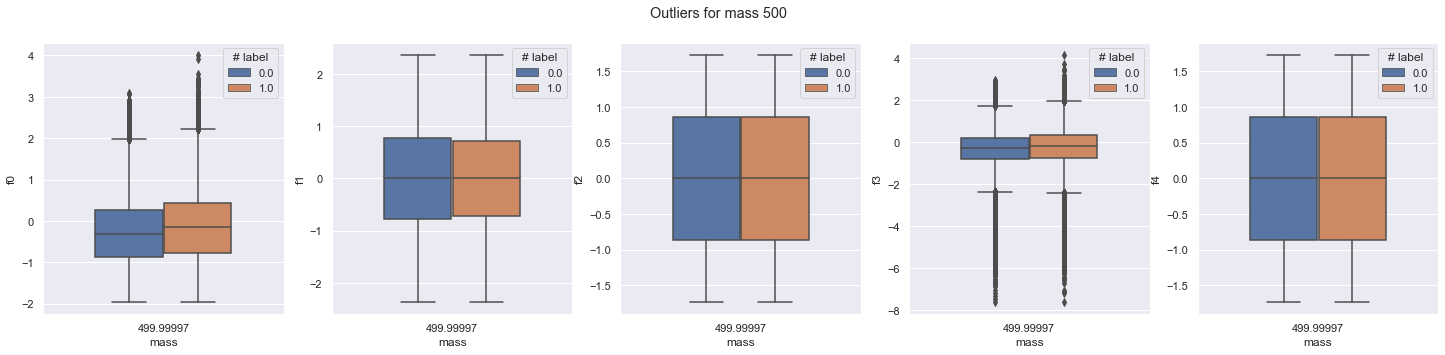

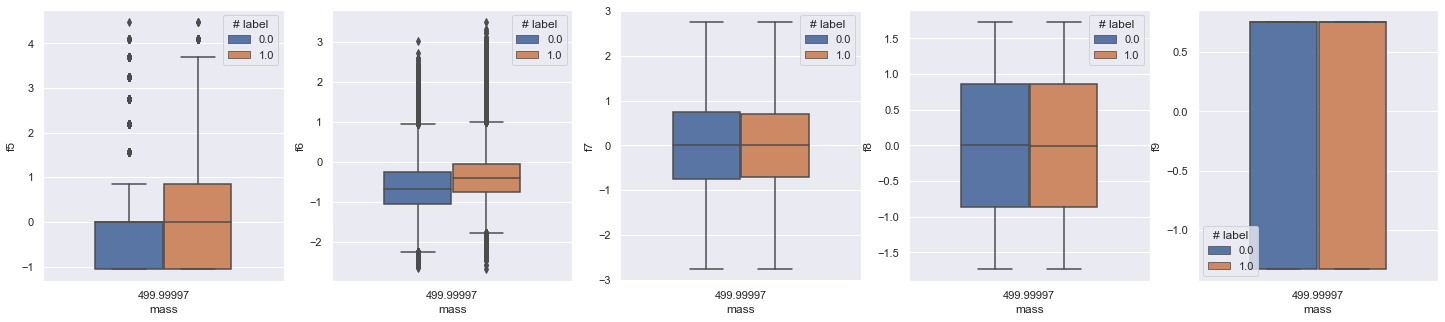

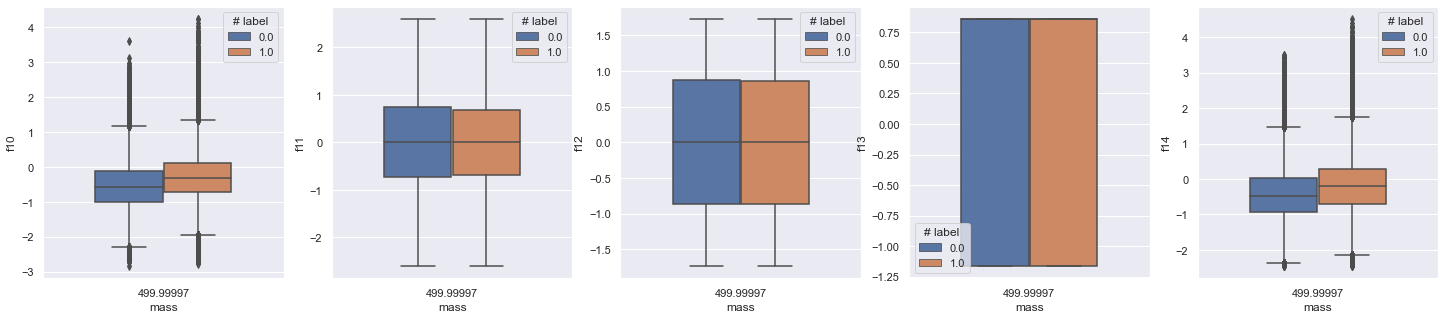

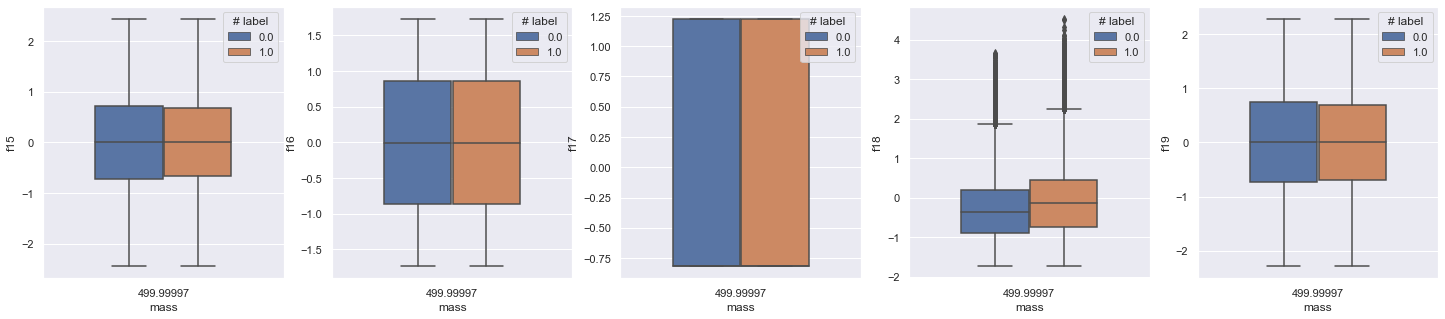

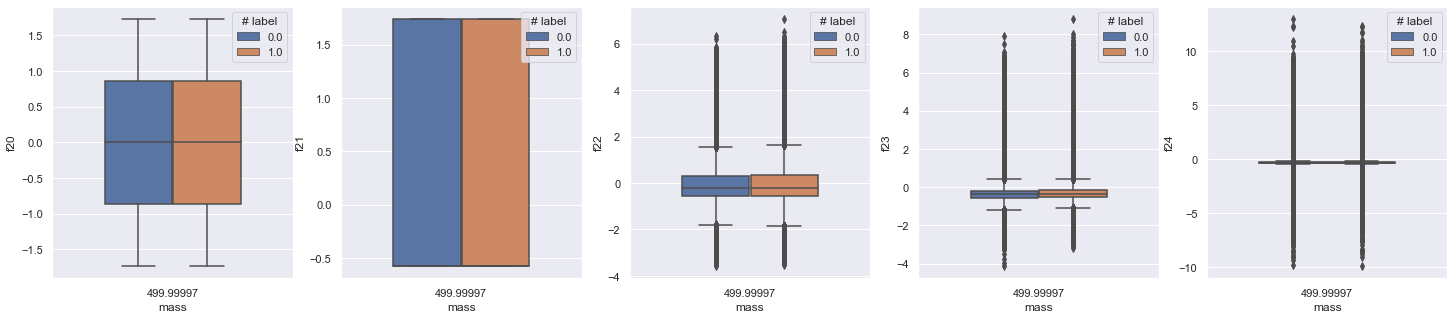

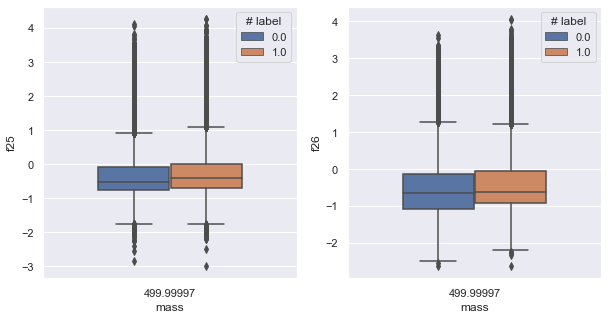

In [60]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[0], columns=data.columns['feature'][inf:sup], title=inf == 0)

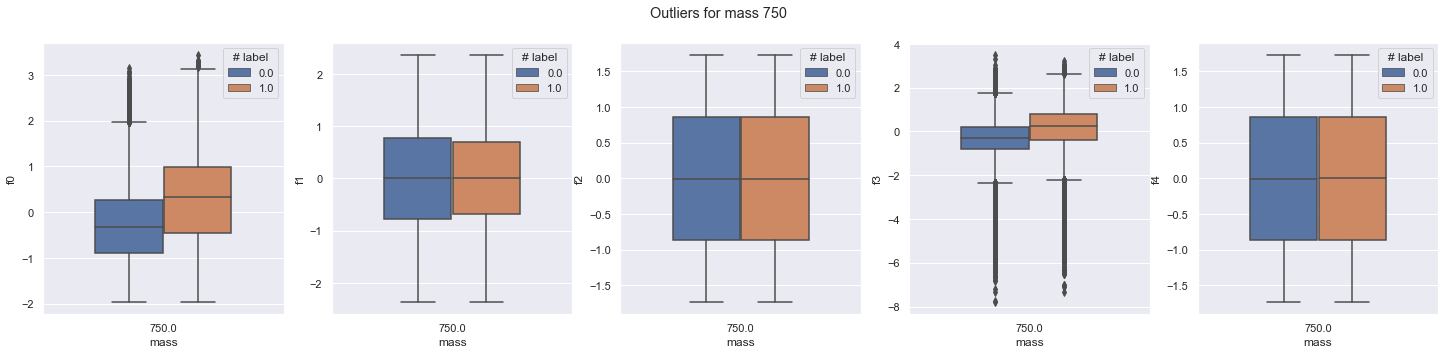

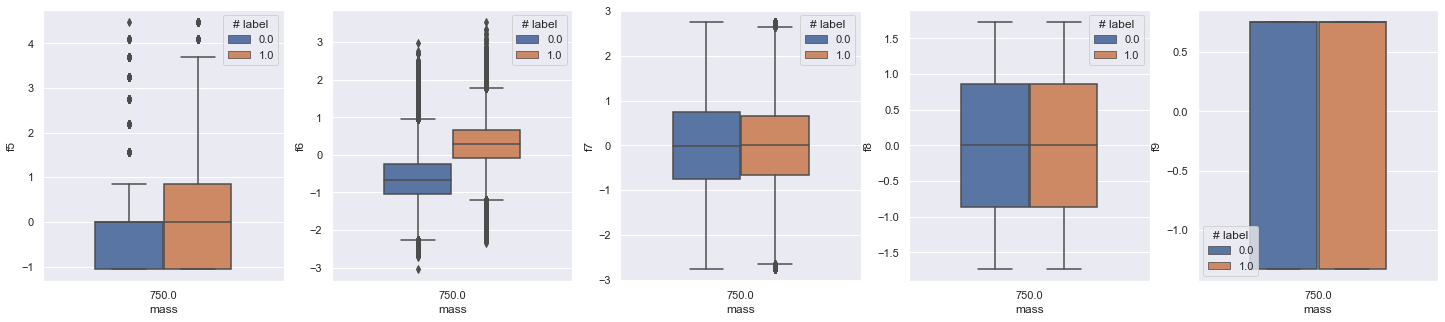

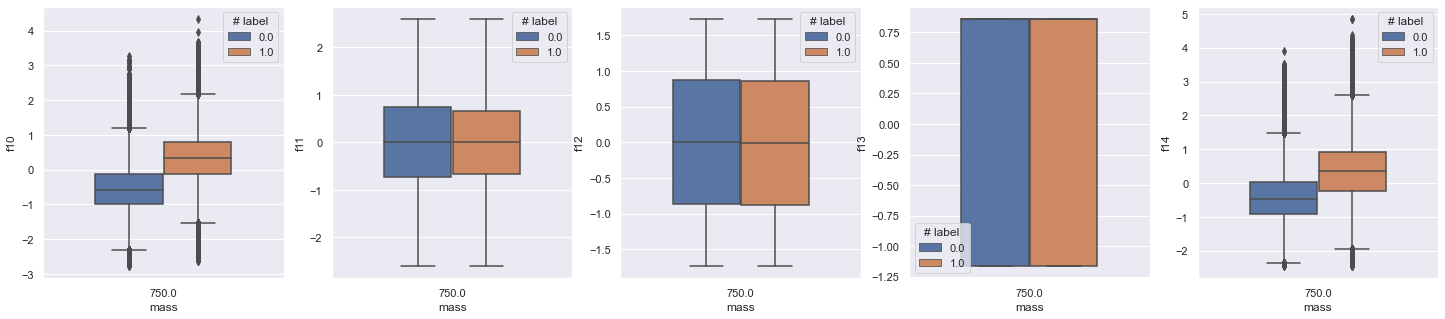

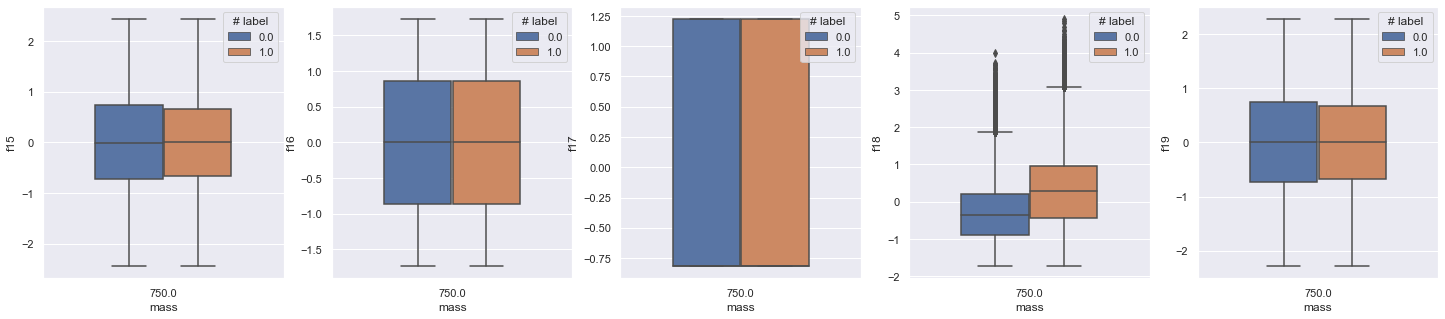

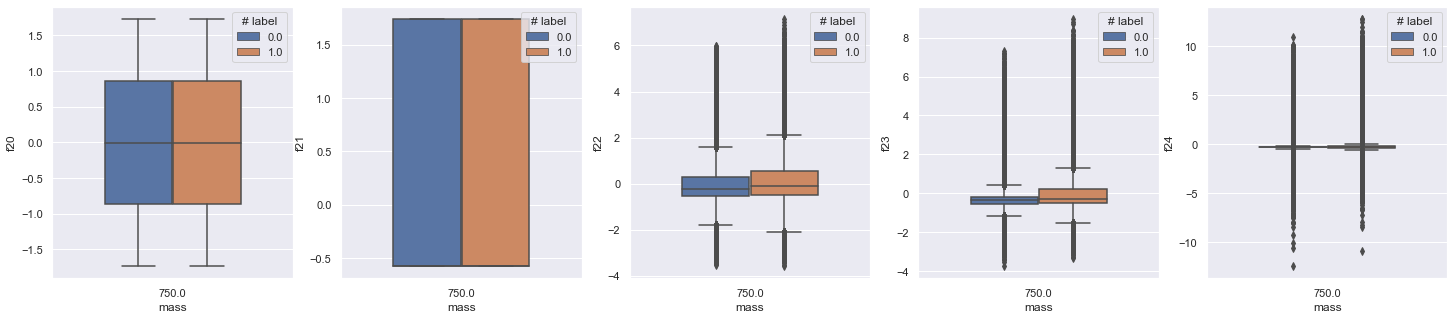

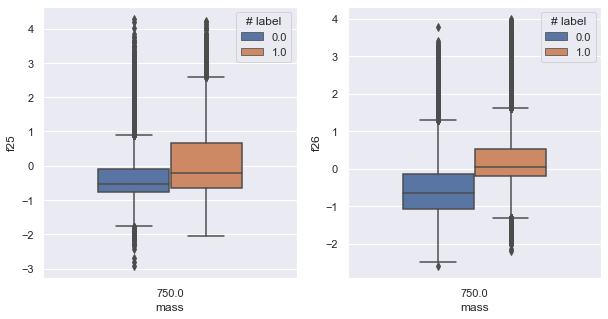

In [64]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[1], columns=data.columns['feature'][inf:sup], title=inf == 0)

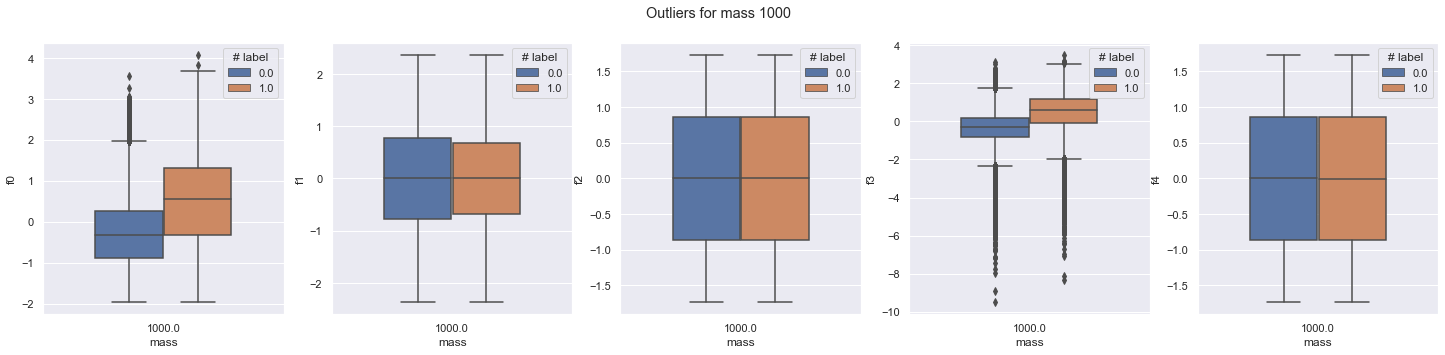

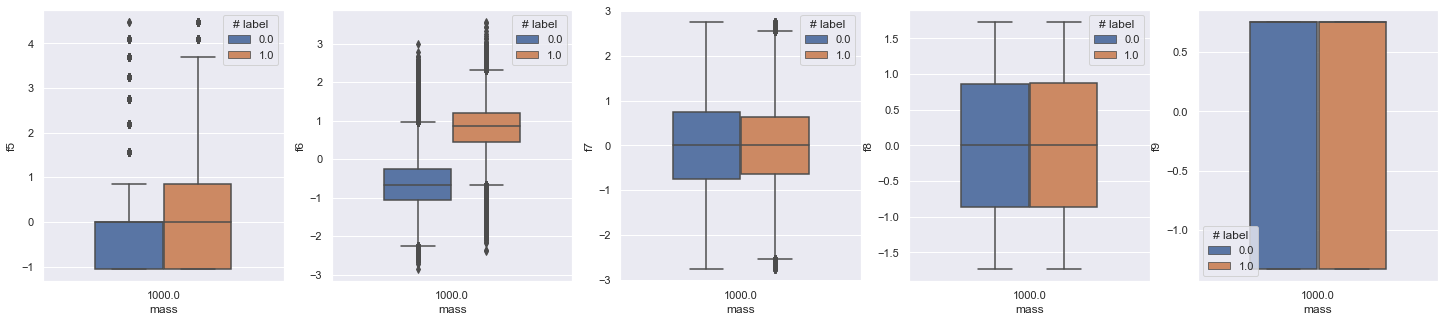

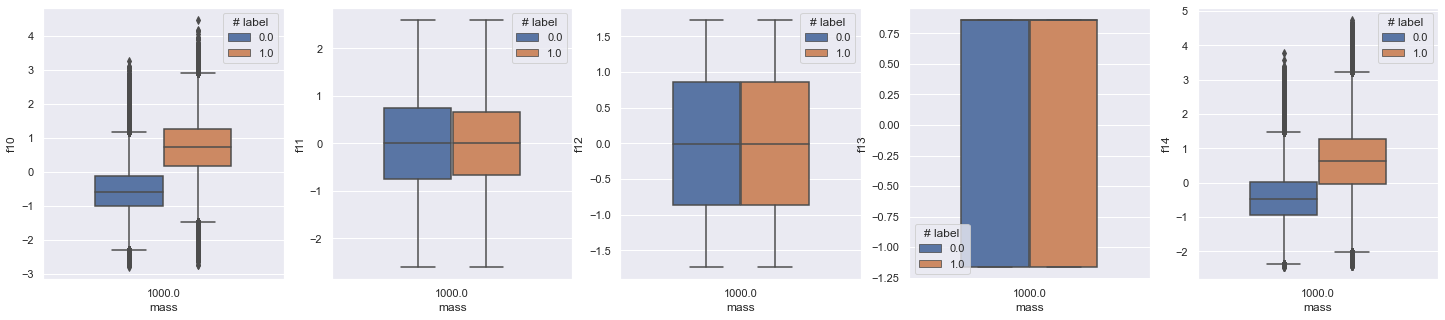

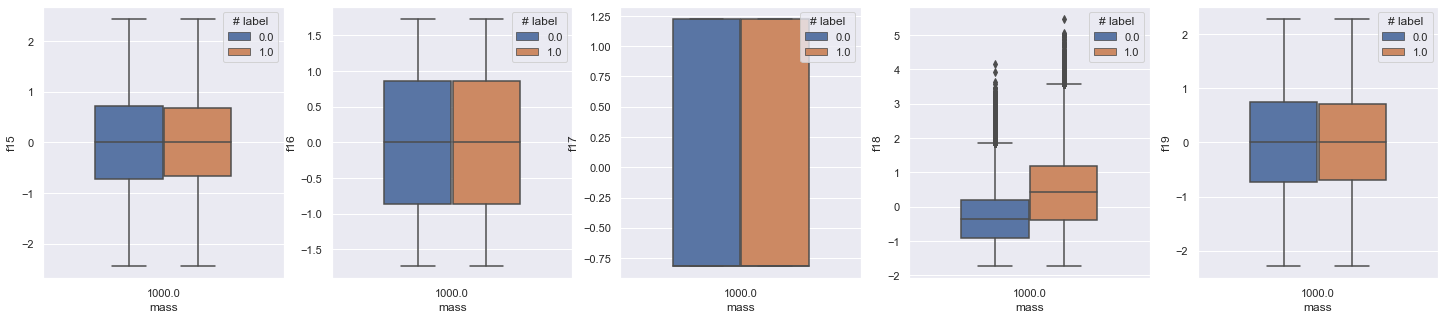

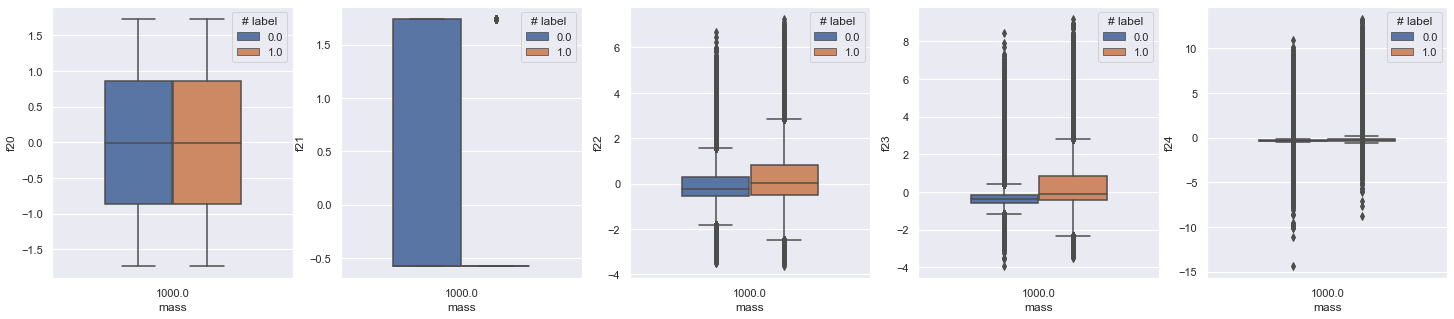

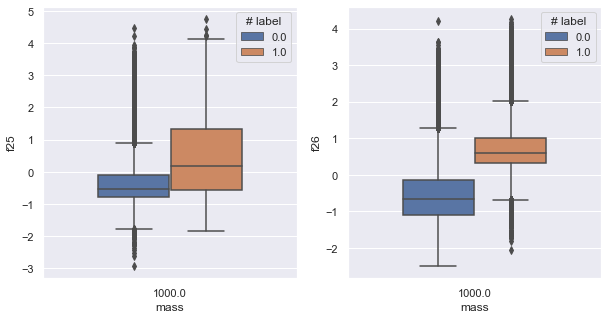

In [65]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[2], columns=data.columns['feature'][inf:sup], title=inf == 0)

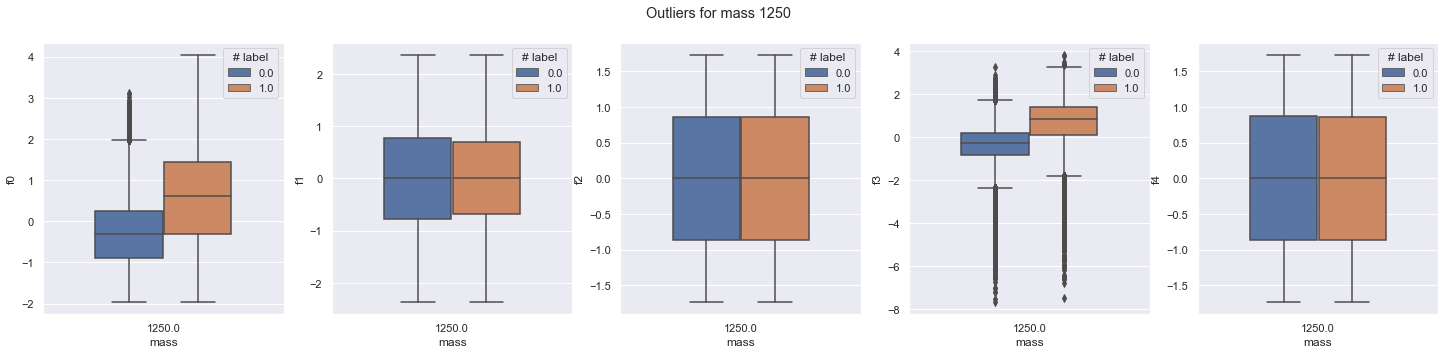

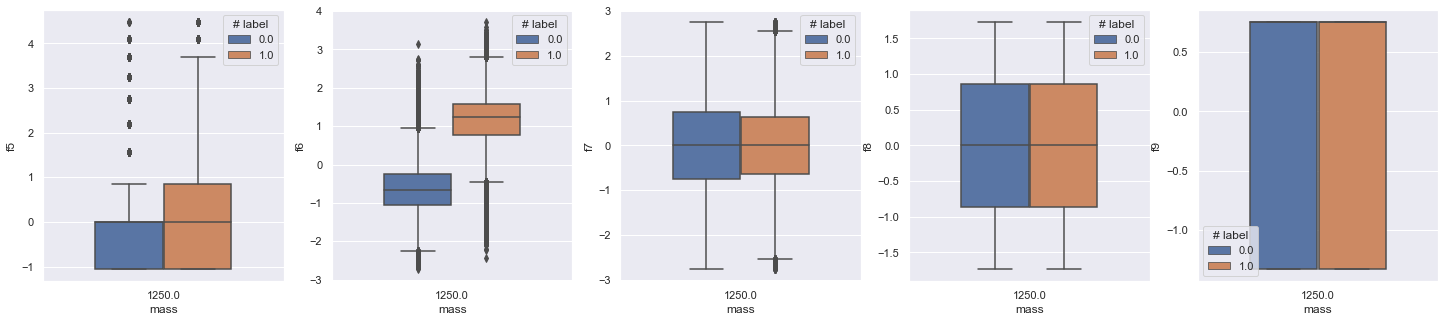

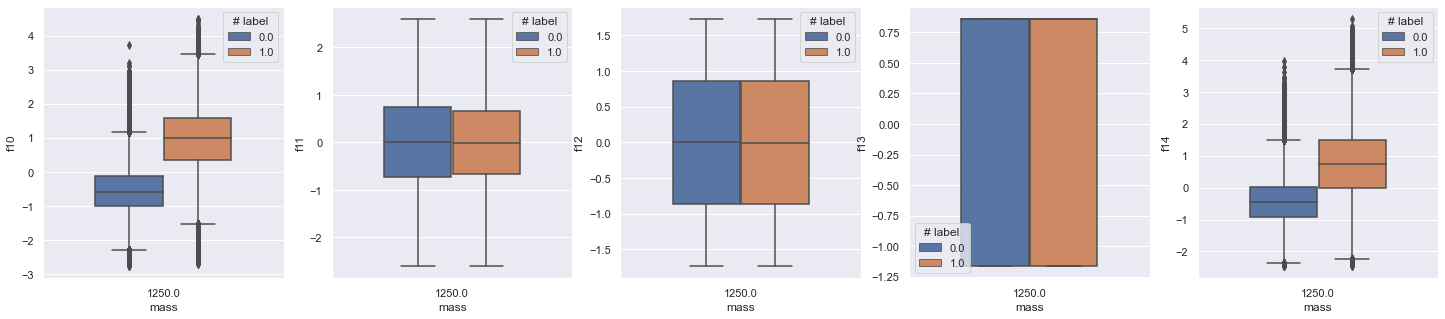

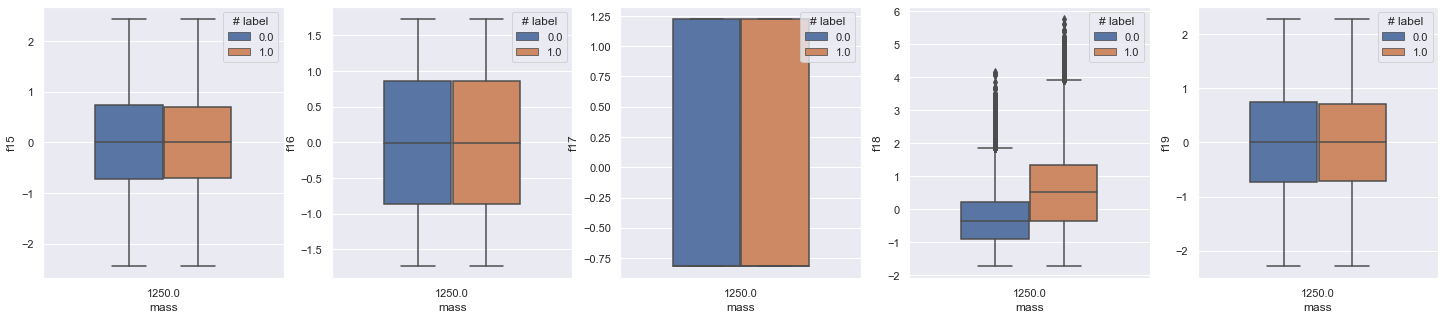

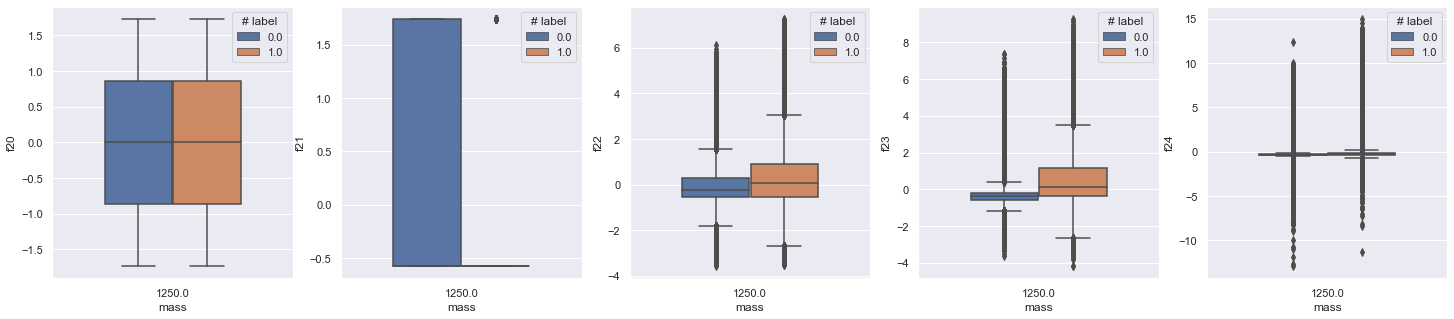

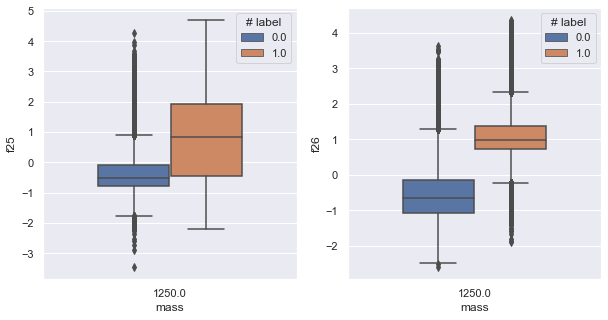

In [66]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[3], columns=data.columns['feature'][inf:sup], title=inf == 0)

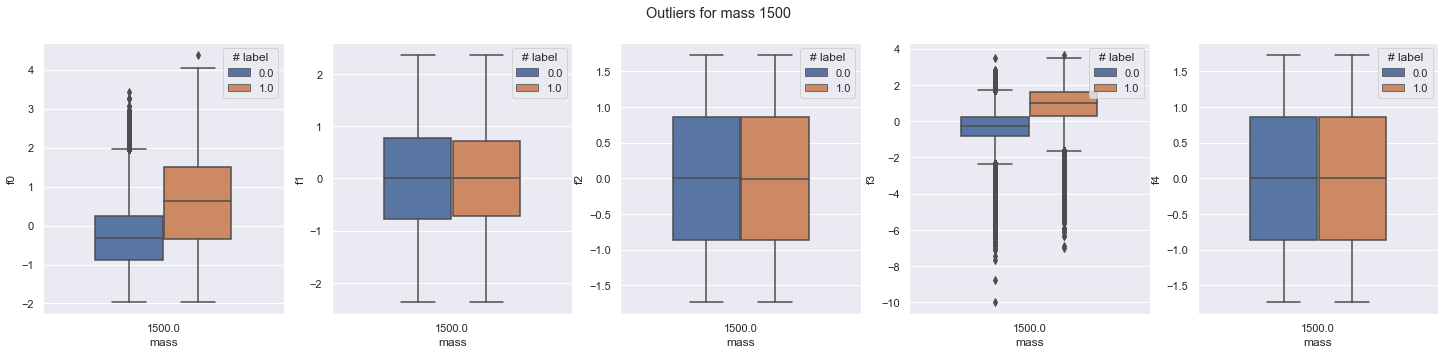

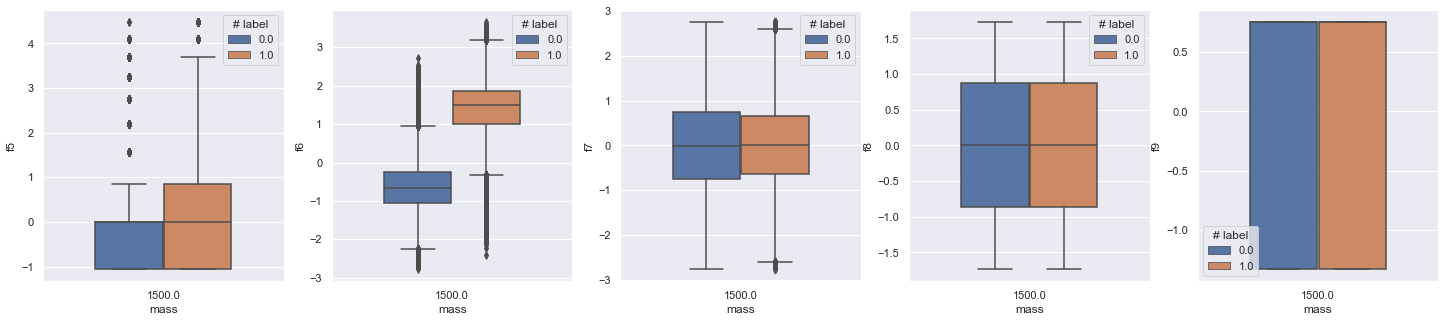

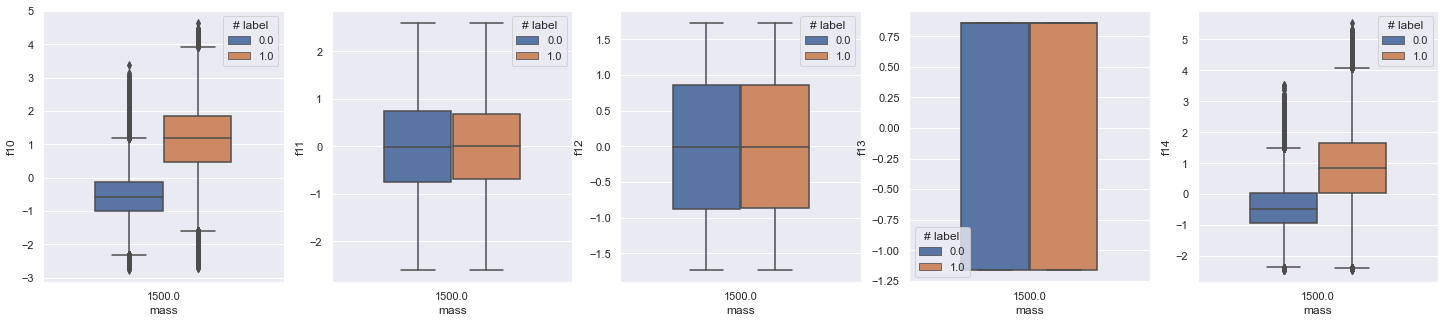

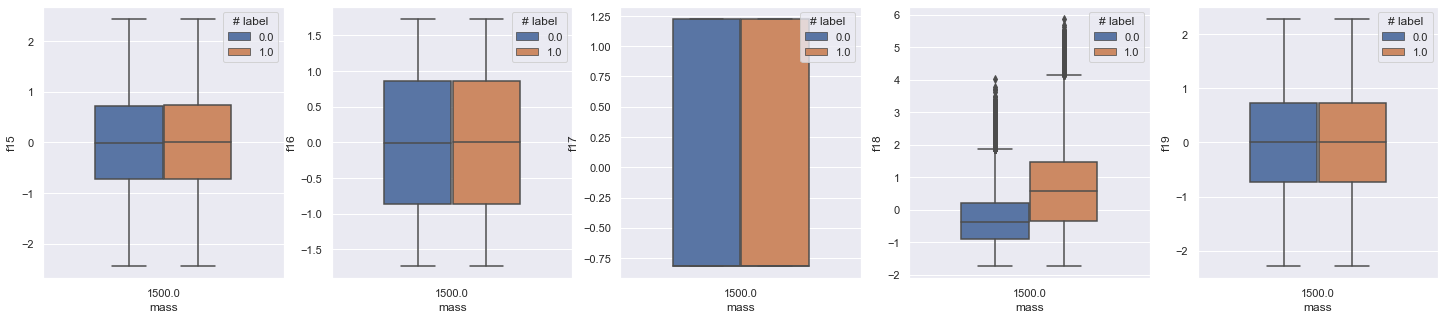

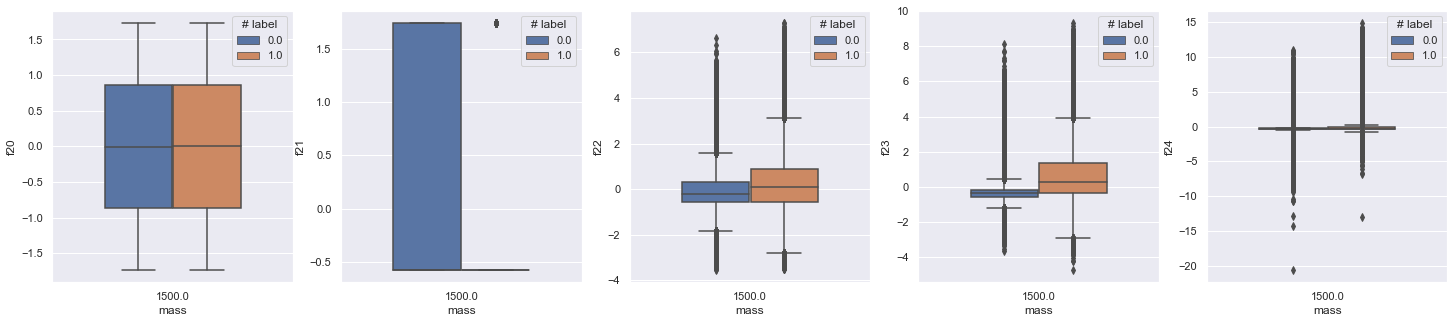

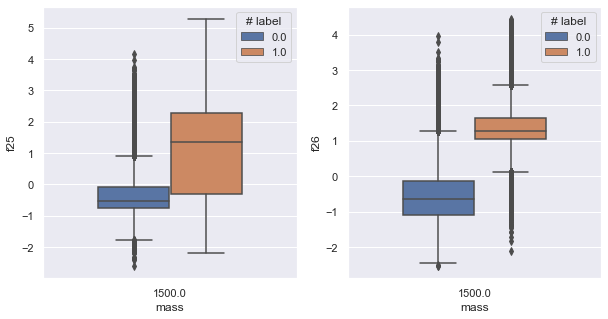

In [67]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[4], columns=data.columns['feature'][inf:sup], title=inf == 0)

#### Outlier Clipping
Clip outliers acording to *mass*, *feature*, and *class* label.

In [11]:
def clip_outliers(data):
    for mass in data.unique_mass:
        for col in data.columns['feature']:
            for label in [0.0, 1.0]:
                mask = (data.ds['mass'] == mass) & (data.ds[data.columns['label']] == label)
                
                # select data
                serie = data.ds.loc[mask, col]
                
                # get quantiles
                # source: https://paolapozzolo.it/boxplot/
                stats = serie.describe()
                
                q1 = stats['25%']
                q3 = stats['75%']
                iqr = q3 - q1  # inter-quartile range
                
                low = q1 - 1.5 * iqr
                upp = q3 + 1.5 * iqr
                
                # clip
                serie.clip(lower=low, upper=upp, inplace=True)
                
                # apply changes
                data.ds.loc[mask, col] = serie


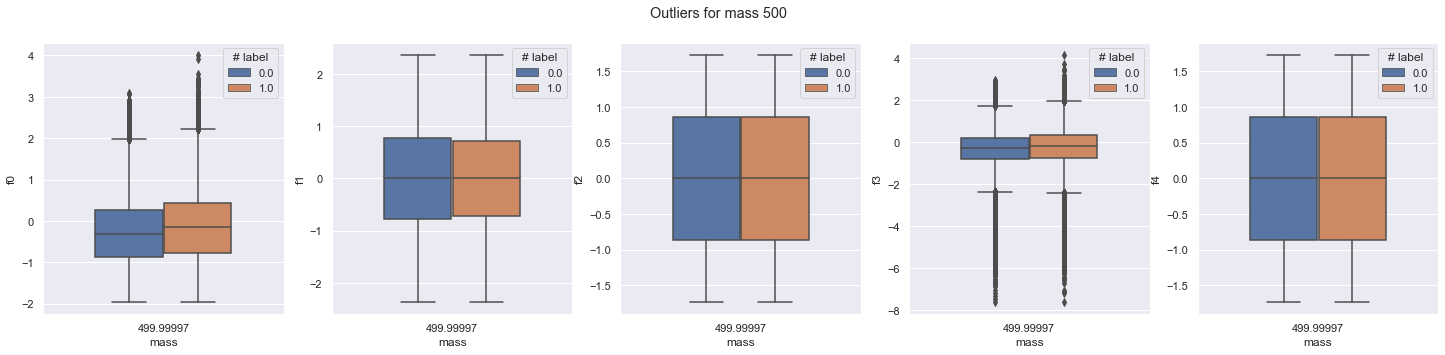

In [10]:
# unclipped
for (inf, sup) in [indices[0]]:
    boxplot_on_features(mass=mass[0], columns=data.columns['feature'][inf:sup], title=inf == 0)

In [12]:
clip_outliers(data)

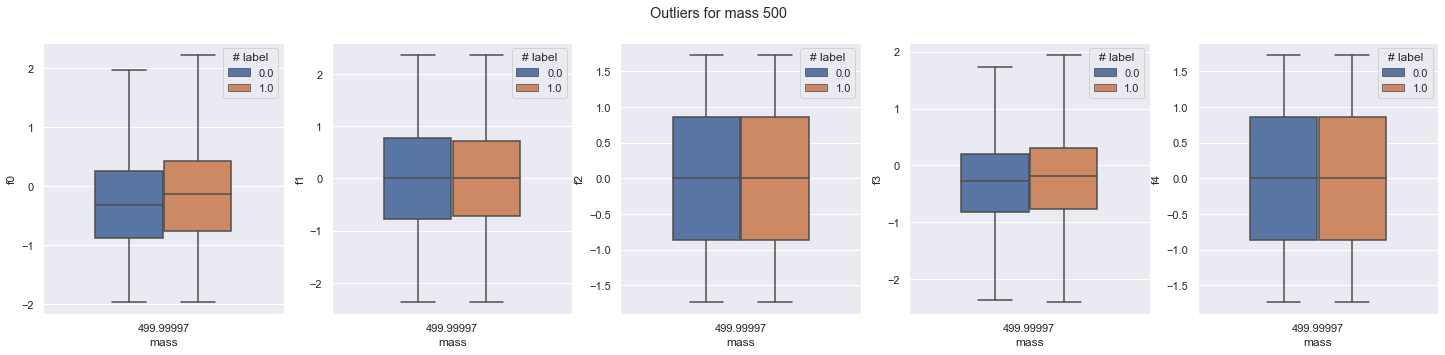

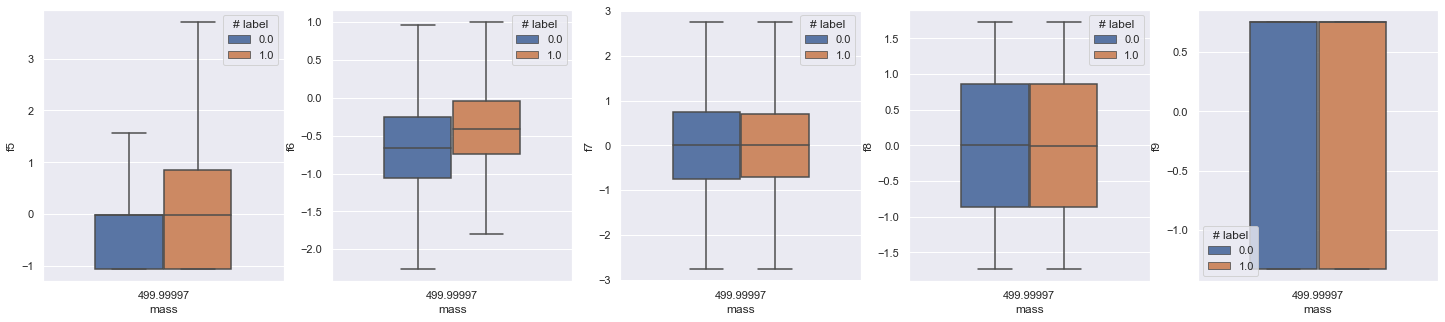

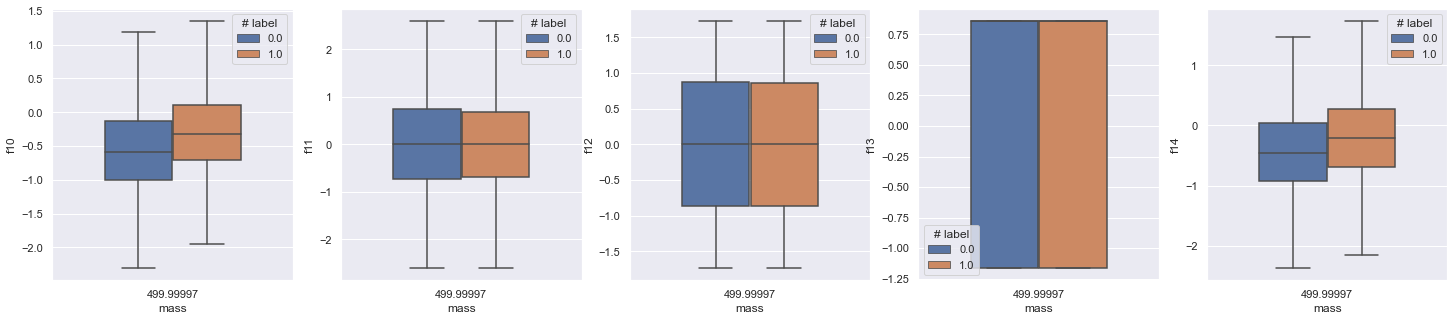

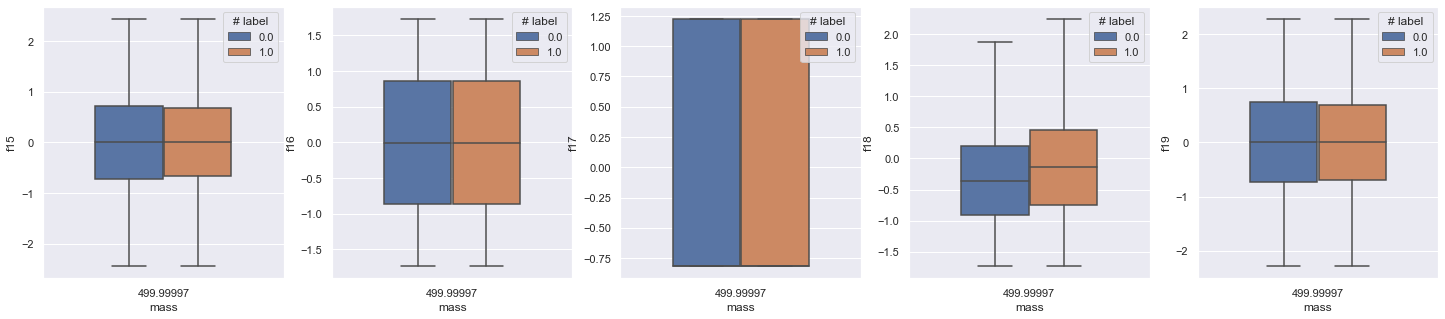

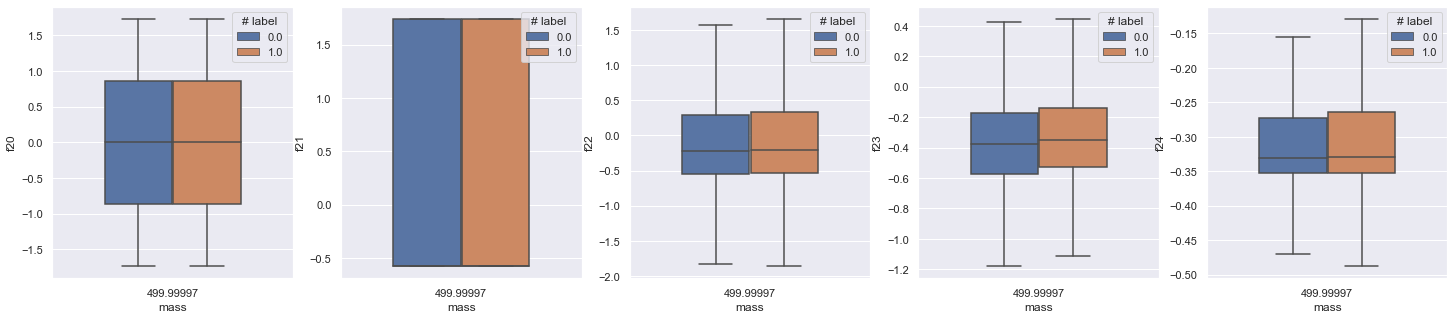

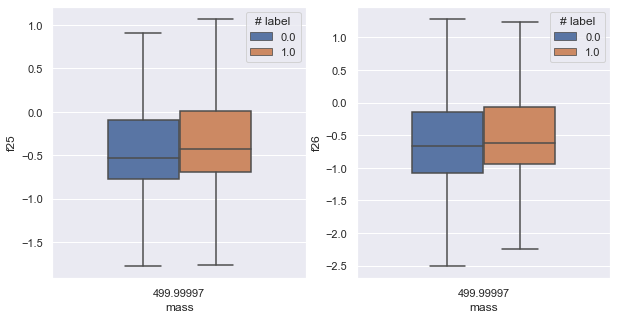

In [13]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[0], columns=data.columns['feature'][inf:sup], title=inf == 0)

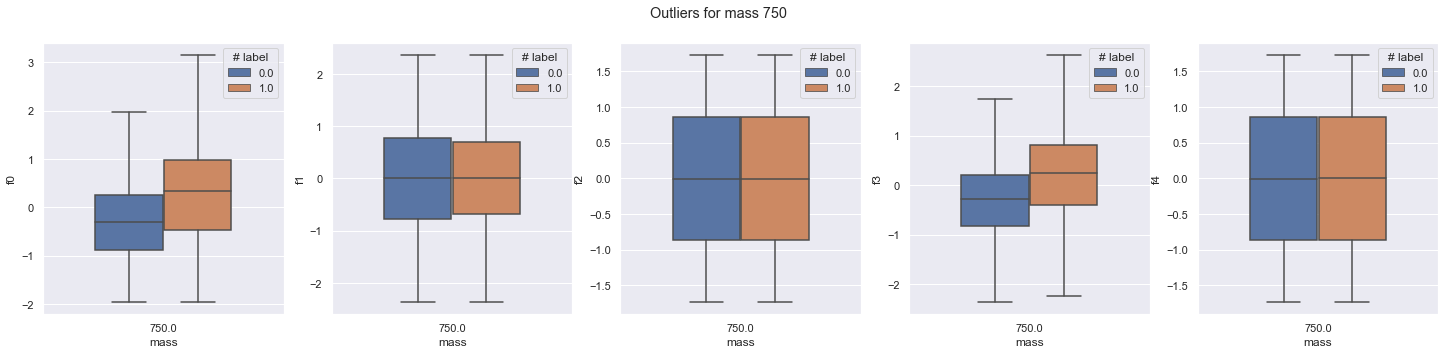

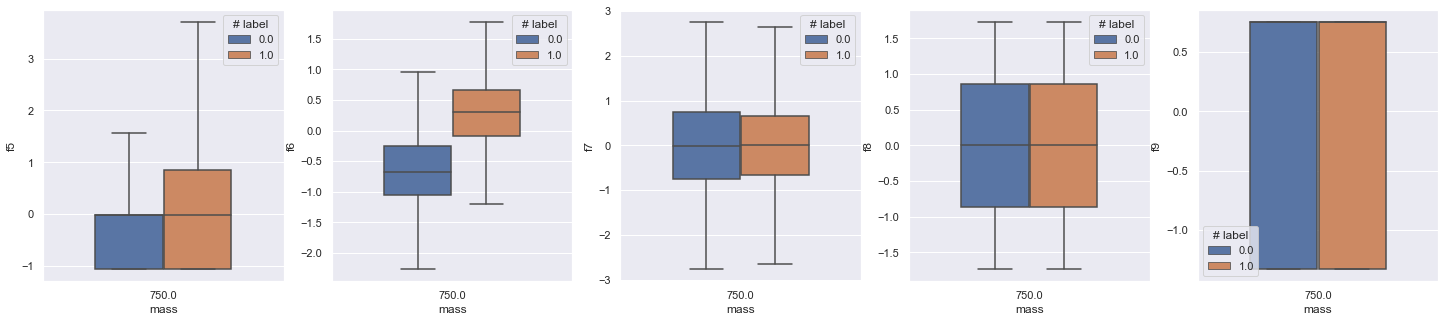

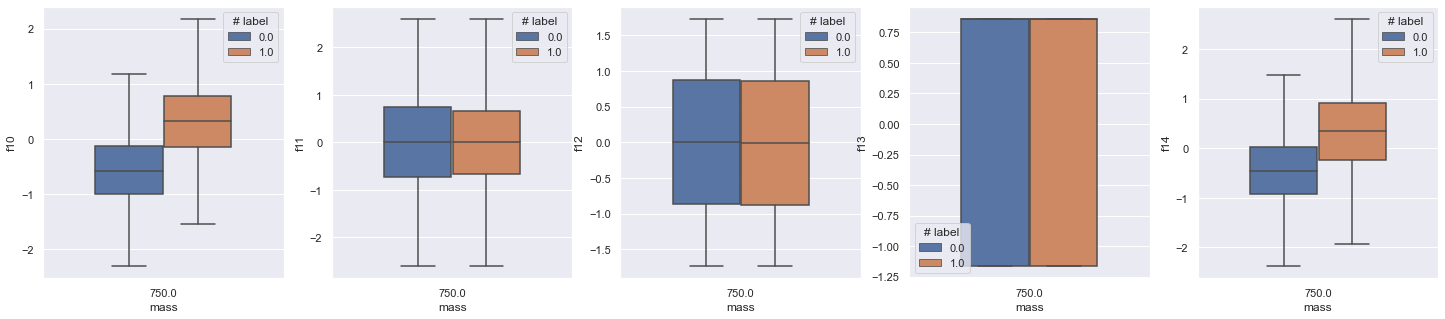

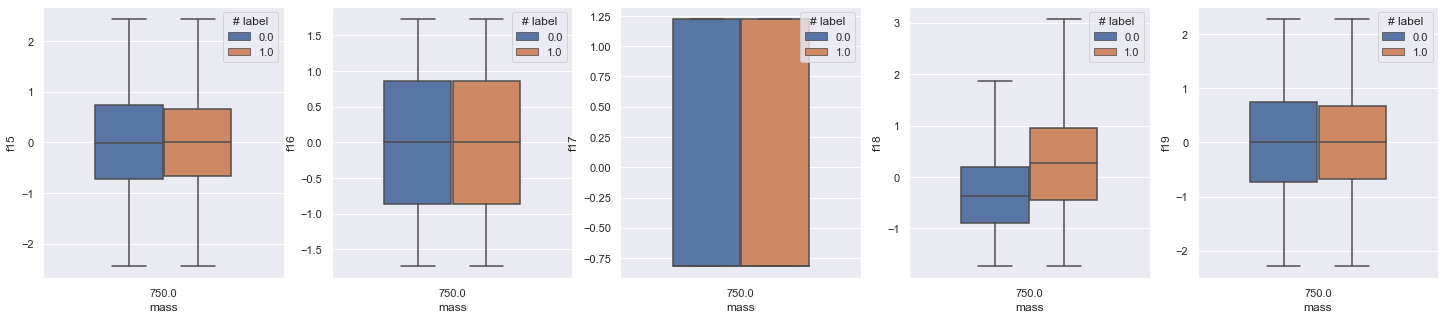

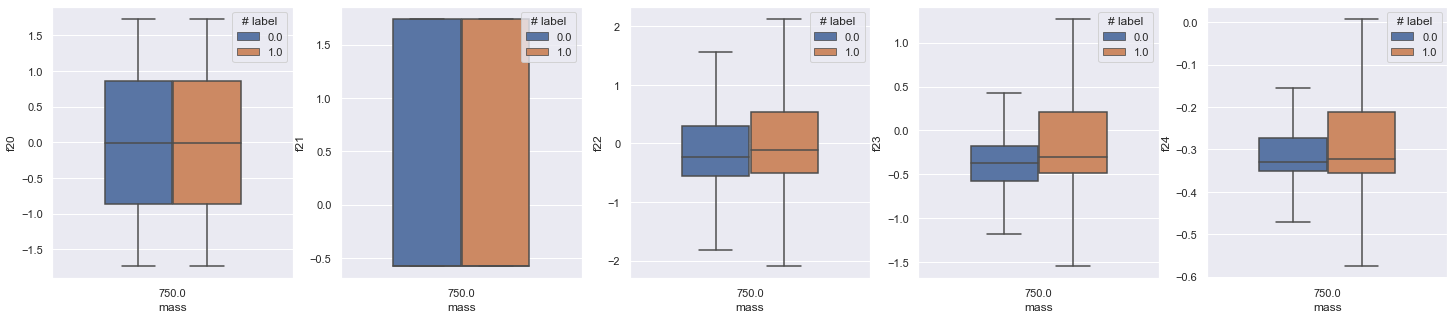

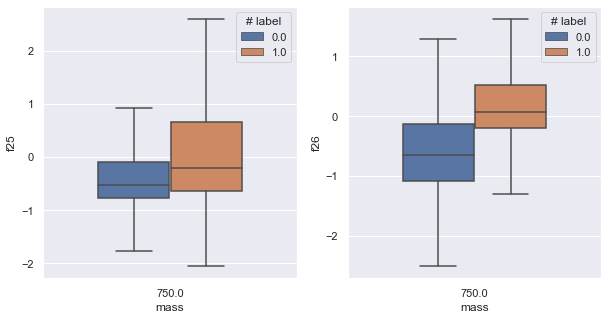

In [14]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[1], columns=data.columns['feature'][inf:sup], title=inf == 0)

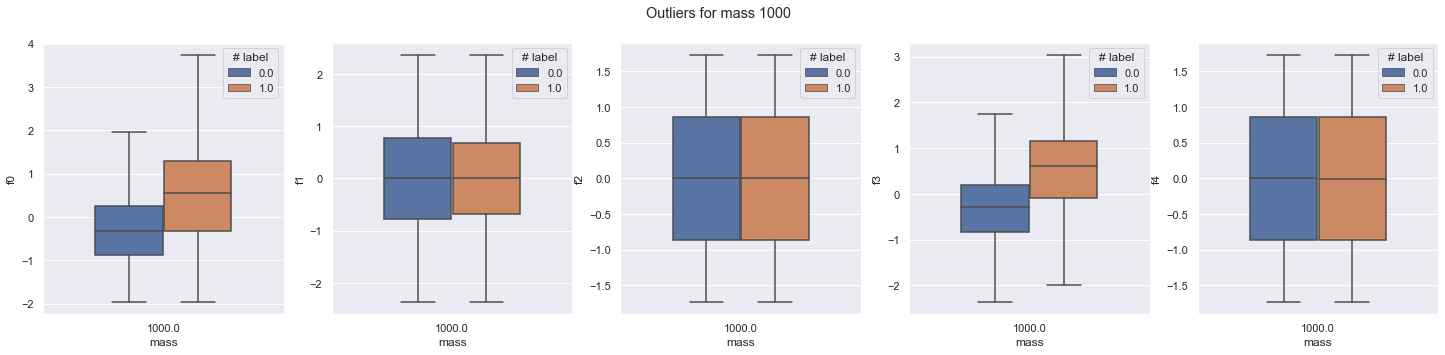

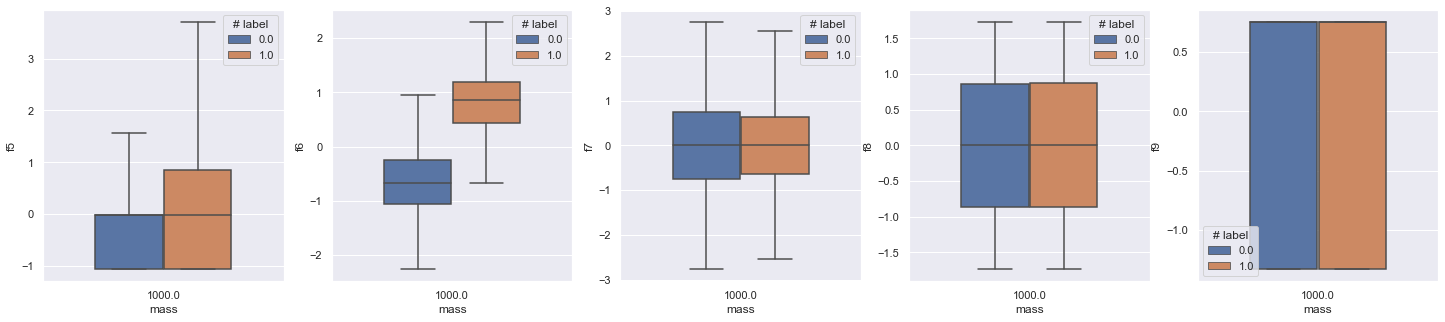

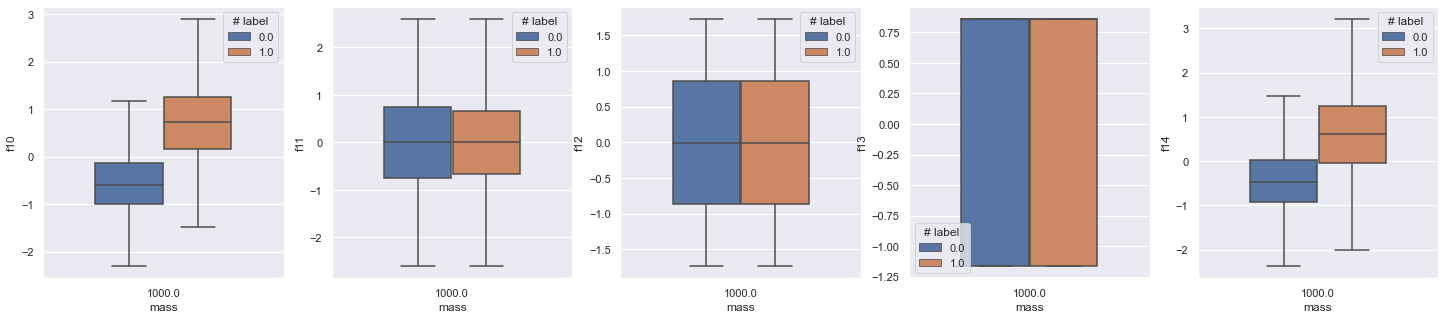

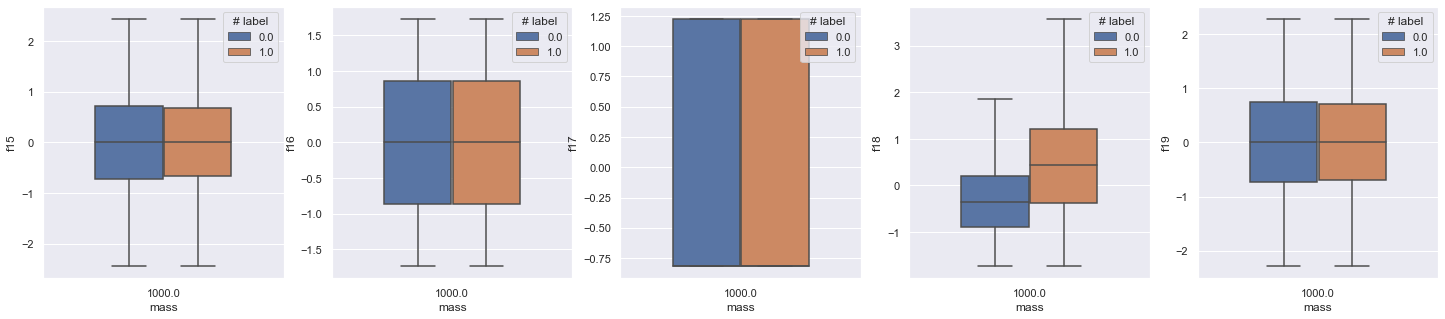

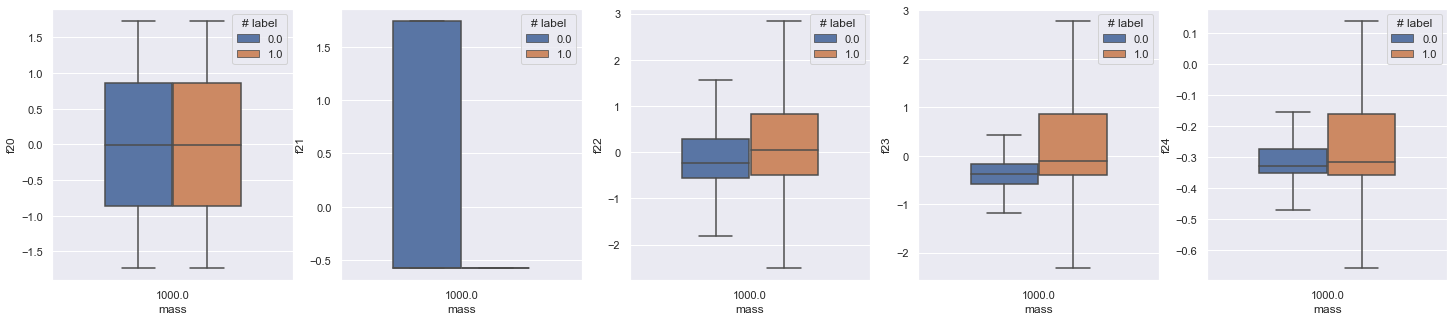

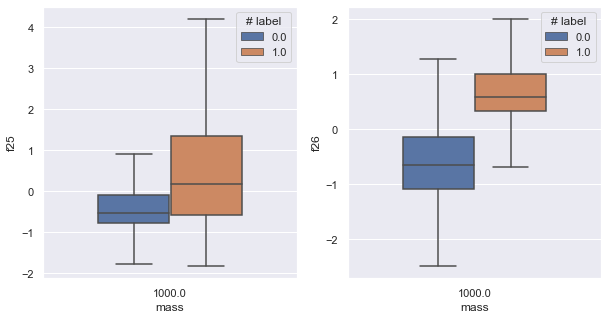

In [15]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[2], columns=data.columns['feature'][inf:sup], title=inf == 0)

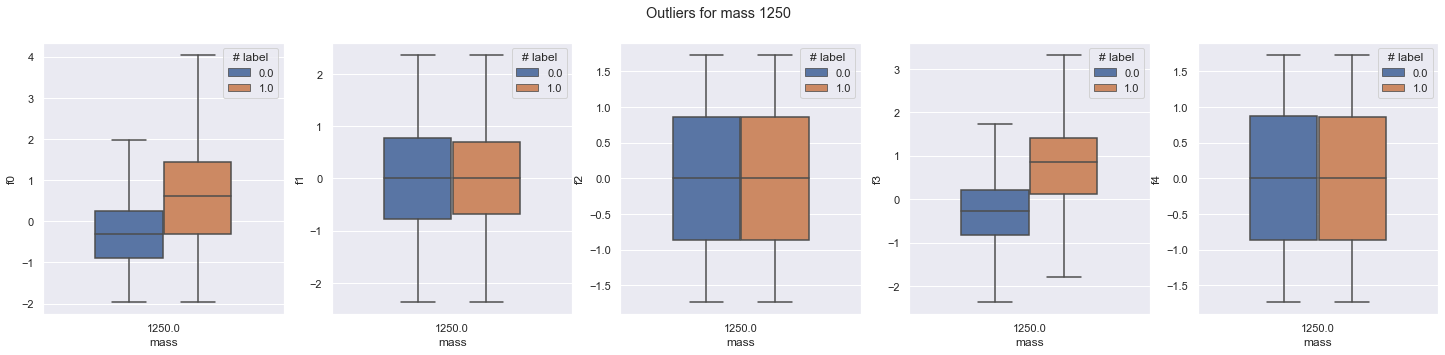

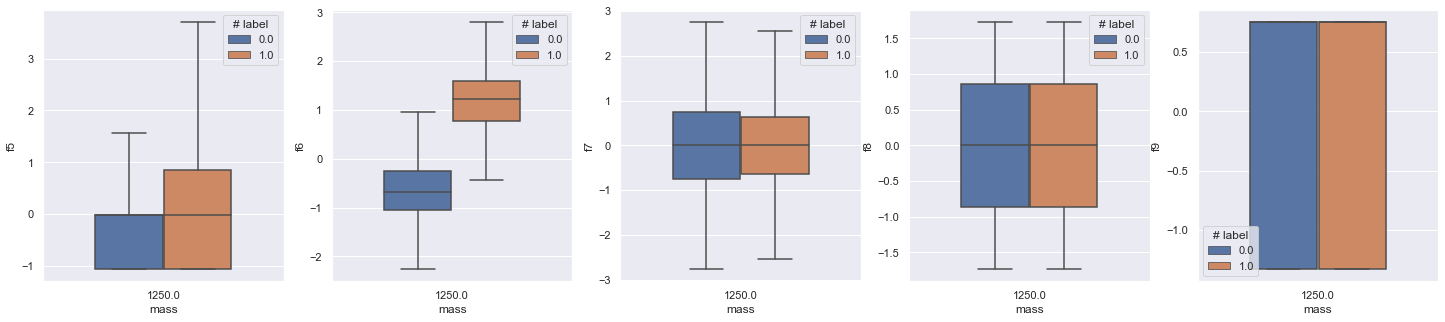

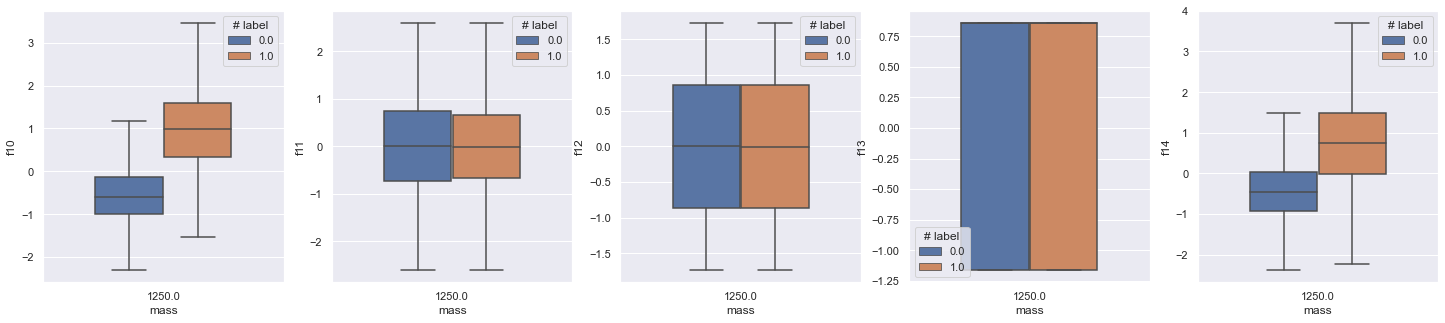

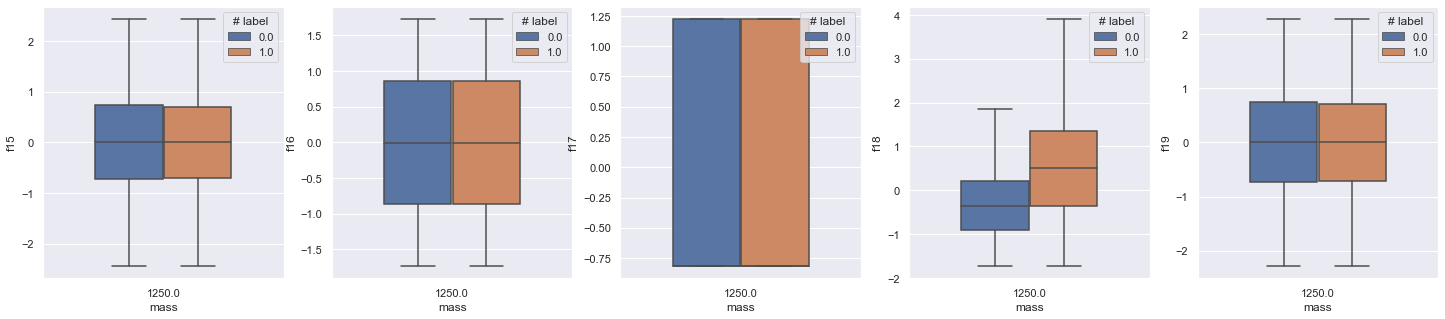

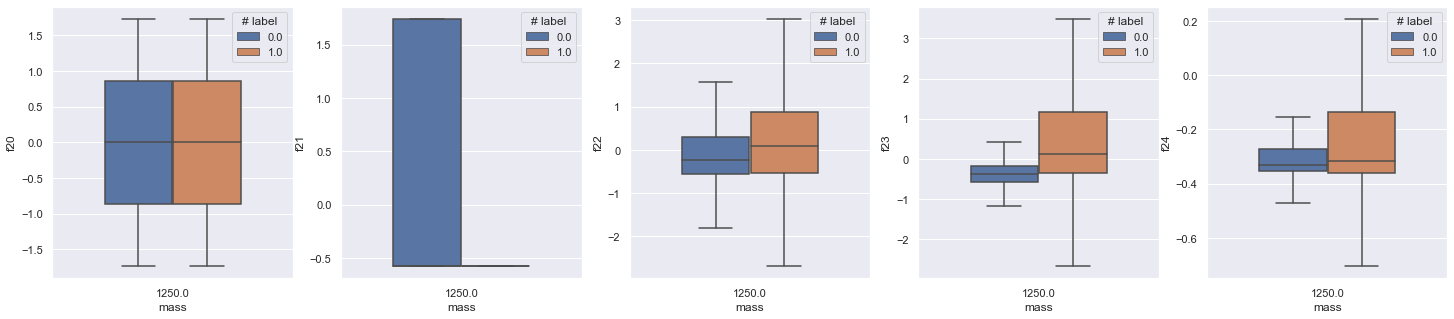

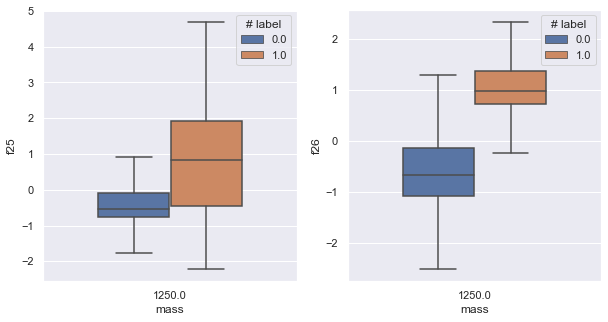

In [16]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[3], columns=data.columns['feature'][inf:sup], title=inf == 0)

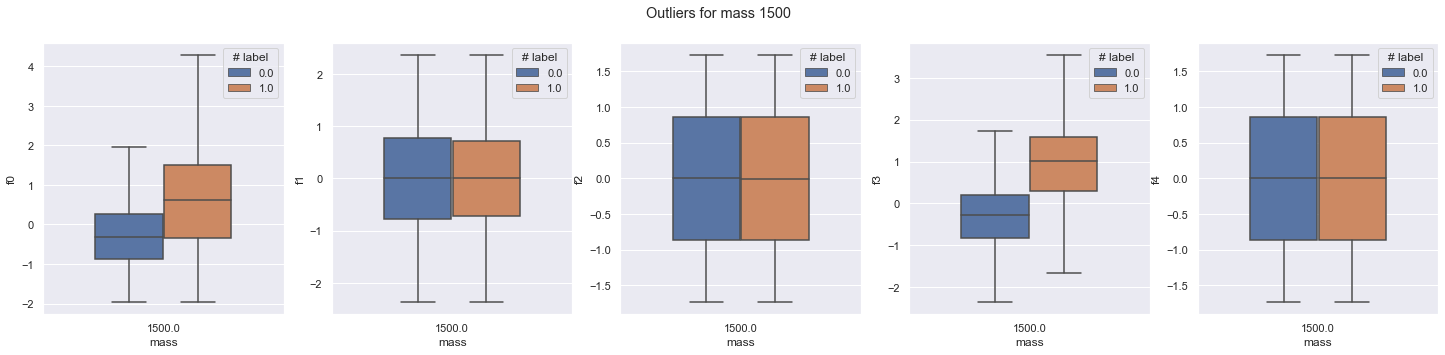

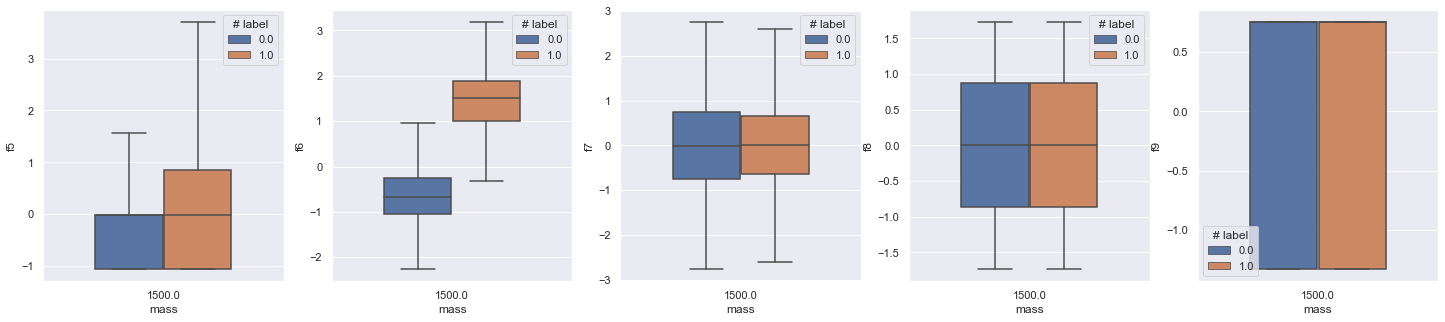

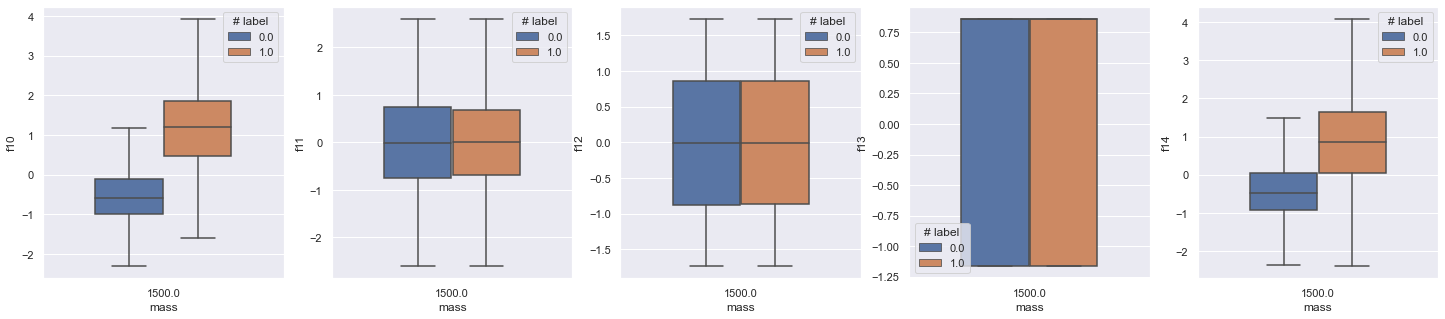

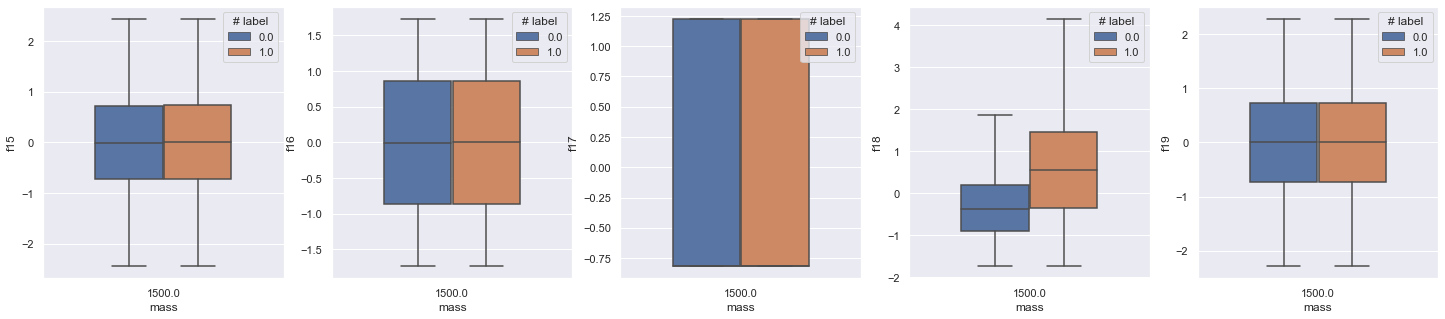

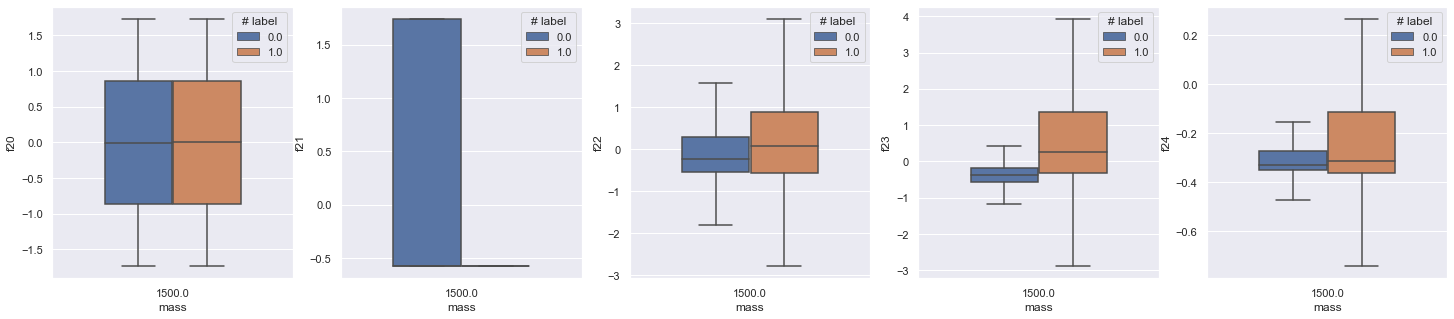

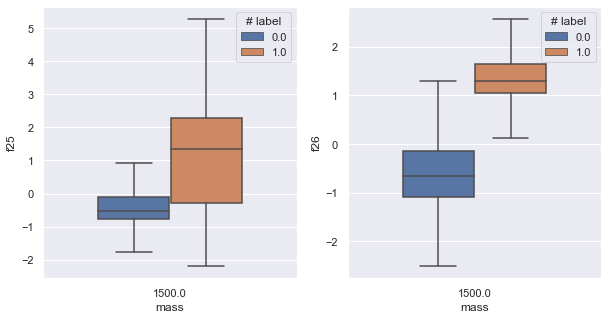

In [17]:
for (inf, sup) in indices:
    boxplot_on_features(mass=mass[4], columns=data.columns['feature'][inf:sup], title=inf == 0)

Train a PNN on the robust dataset:

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import *
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler

from script import utils
from script.models import PNN
from script.models.parameters import StepDecay

In [7]:
data = Hepmass(x_scaler=MinMaxScaler(), m_scaler=MinMaxScaler())
data.load(path=Hepmass.TRAIN_PATH, robust=True)

# NOTE: when loading the test-set, should clip outliers in the same manner as train-set!

loading...
clipping outliers..
fitting feature scaler..
fitting mass scaler..
dataset loaded.


In [8]:
free_mem()
x_train, y_train = data.get()

In [9]:
batch_size = 100
val_split = 0.25

In [10]:
model = PNN(input_shapes=dict(m=(1,), x=(data.features.shape[-1],)), 
            units=[300, 150, 100, 50])
model.summary()

Model: "ParametricNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
m (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
x (InputLayer)                  [(None, 27)]         0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28)           0           m[0][0]                          
                                                                 x[0][0]                          
__________________________________________________________________________________________________
dense (Dense)                   (None, 300)          8700        concatenate[0][0]     

In [11]:
model.compile(metrics=['binary_accuracy', metrics.AUC(name='auc'), 
                       metrics.Precision(), metrics.Recall()])

In [8]:
checkpoint = ModelCheckpoint('my_weights/pnn-robust/weights-{epoch:02d}-{val_auc:.3f}',
                             save_weights_only=True, monitor='val_auc',
                             mode='max', save_best_only=True)

In [17]:
h = model.fit(x=x_train, y=y_train, batch_size=batch_size, validation_split=val_split, 
              epochs=20, callbacks=[checkpoint])

# accuracy: 92.75, AUC: 98.50

Epoch 1/20
52500/52500 [==============================] - 277s 5ms/step - loss: 0.1722 - binary_accuracy: 0.8946 - auc: 0.9696 - precision_1: 0.8859 - recall_1: 0.9059 - lr: 0.0010 - norm: 1.5067 - weight-norm: 36.5236 - reg-losses: 0.0000e+00 - val_loss: 0.1782 - val_binary_accuracy: 0.9151 - val_auc: 0.9797 - val_precision_1: 0.9060 - val_recall_1: 0.9264
Epoch 2/20
52500/52500 [==============================] - 273s 5ms/step - loss: 0.1242 - binary_accuracy: 0.9101 - auc: 0.9773 - precision_1: 0.9034 - recall_1: 0.9184 - lr: 0.0010 - norm: 1.4632 - weight-norm: 54.3750 - reg-losses: 0.0000e+00 - val_loss: 0.1710 - val_binary_accuracy: 0.9189 - val_auc: 0.9815 - val_precision_1: 0.9195 - val_recall_1: 0.9183
Epoch 3/20
52500/52500 [==============================] - 276s 5ms/step - loss: 0.1450 - binary_accuracy: 0.9153 - auc: 0.9797 - precision_1: 0.9085 - recall_1: 0.9236 - lr: 0.0010 - norm: 1.3235 - weight-norm: 66.6969 - reg-losses: 0.0000e+00 - val_loss: 0.1716 - val_binary_accu

In [9]:
model.load_weights('my_weights/pnn-robust/weights-18-0.985')

Evaluation

In [ ]:
from script.evaluation.pnn import auc_with_error, auc_vs_no_mass, auc_vs_mass_no_features

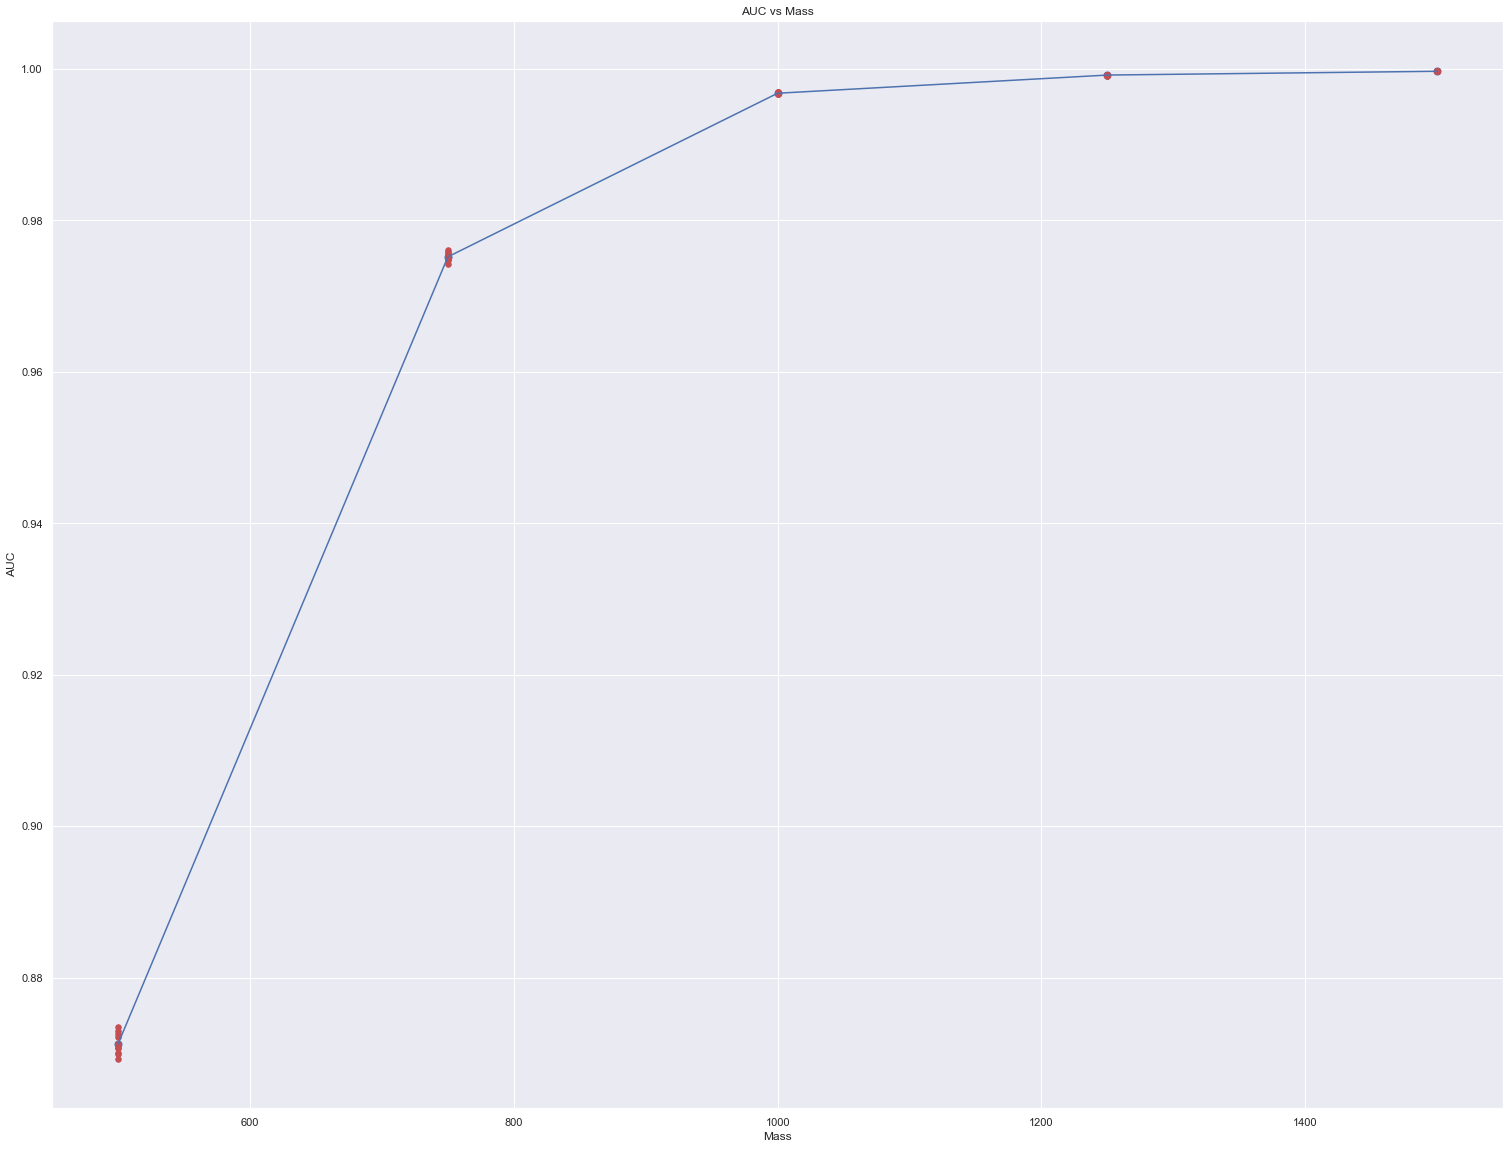

In [15]:
_ = auc_with_error(model, data, auc_index=2, verbose=0, silent=True)

* Better fit for 500mA, around +20% AUC.

Mass fooling + interpolation

In [11]:
mass = data.unique_mass
mass

[499.99997, 750.0, 1000.0, 1250.0, 1500.0]

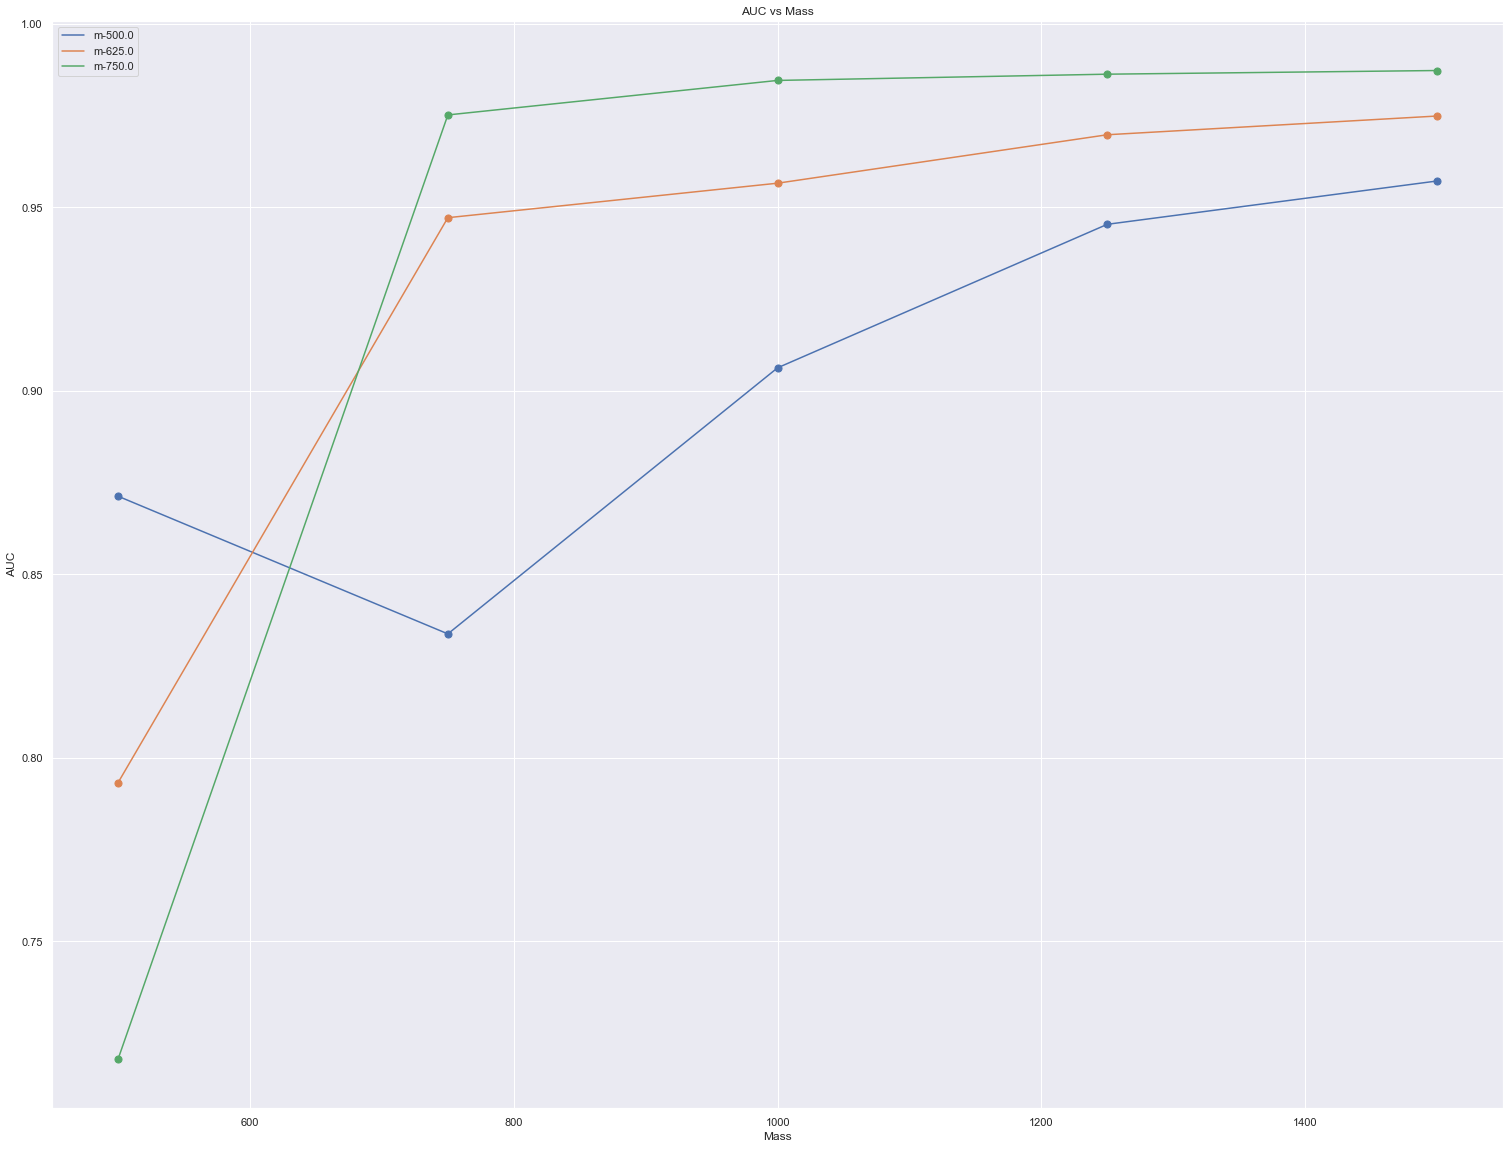

In [13]:
# 500, 750
_ = auc_vs_no_mass(model, data, auc_index=2, 
                   fake_mass=[mass[0], np.mean(mass[:2]), mass[1]], verbose=0, silent=True)

* Interestingly, AUC increases for true 500mA when faked with higher mass.
* 625mA seems to be interpolated well.

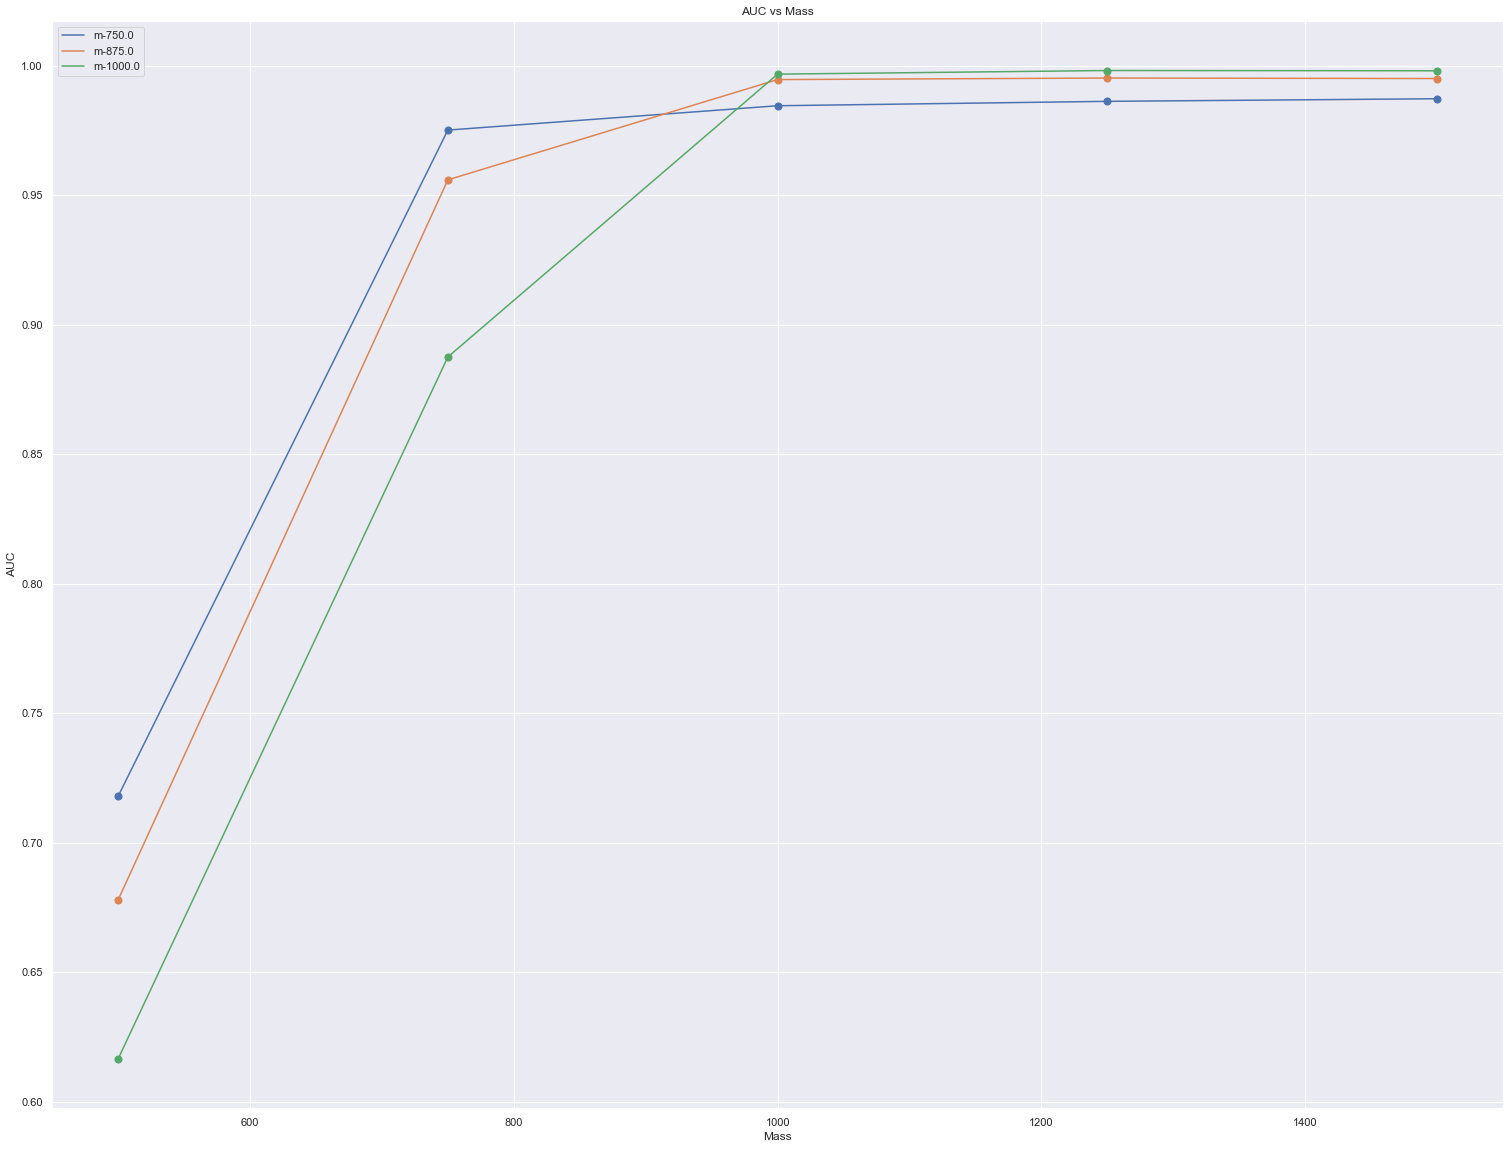

In [16]:
# 750, 1000
_ = auc_vs_no_mass(model, data, auc_index=2, 
                   fake_mass=[mass[1], np.mean(mass[1:3]), mass[2]], verbose=0, silent=True)

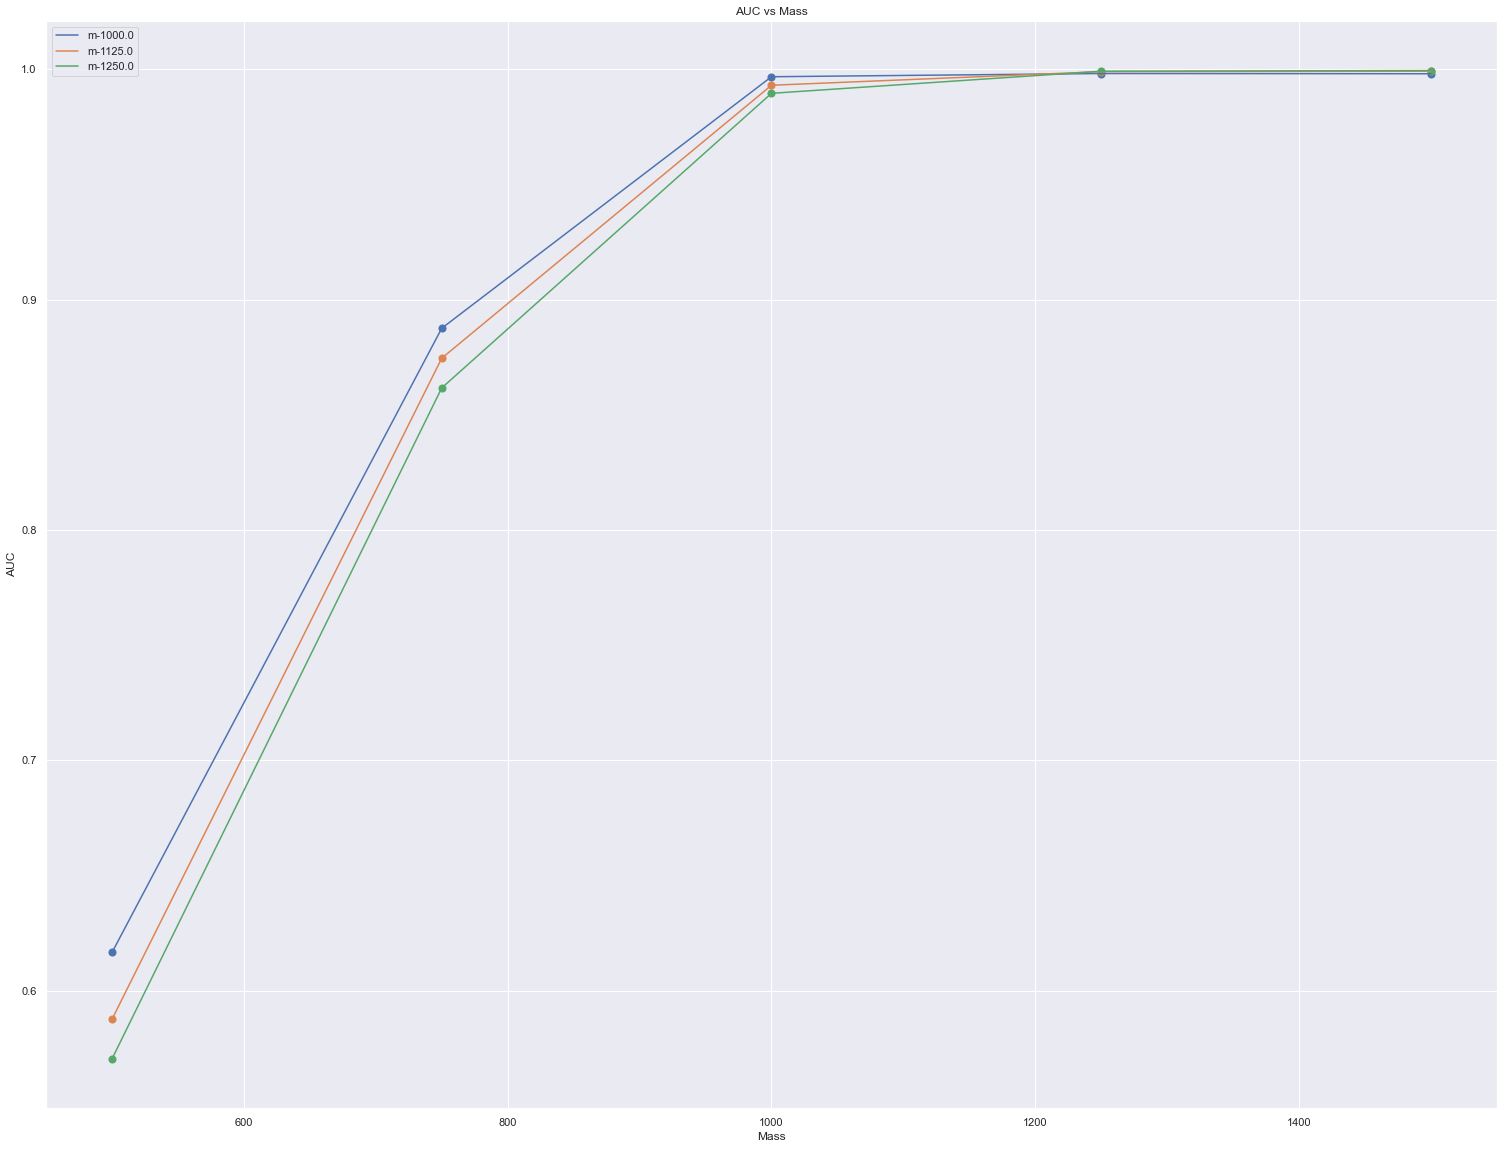

In [17]:
# 1000, 1250
_ = auc_vs_no_mass(model, data, auc_index=2, 
                   fake_mass=[mass[2], np.mean(mass[2:4]), mass[3]], verbose=0, silent=True)

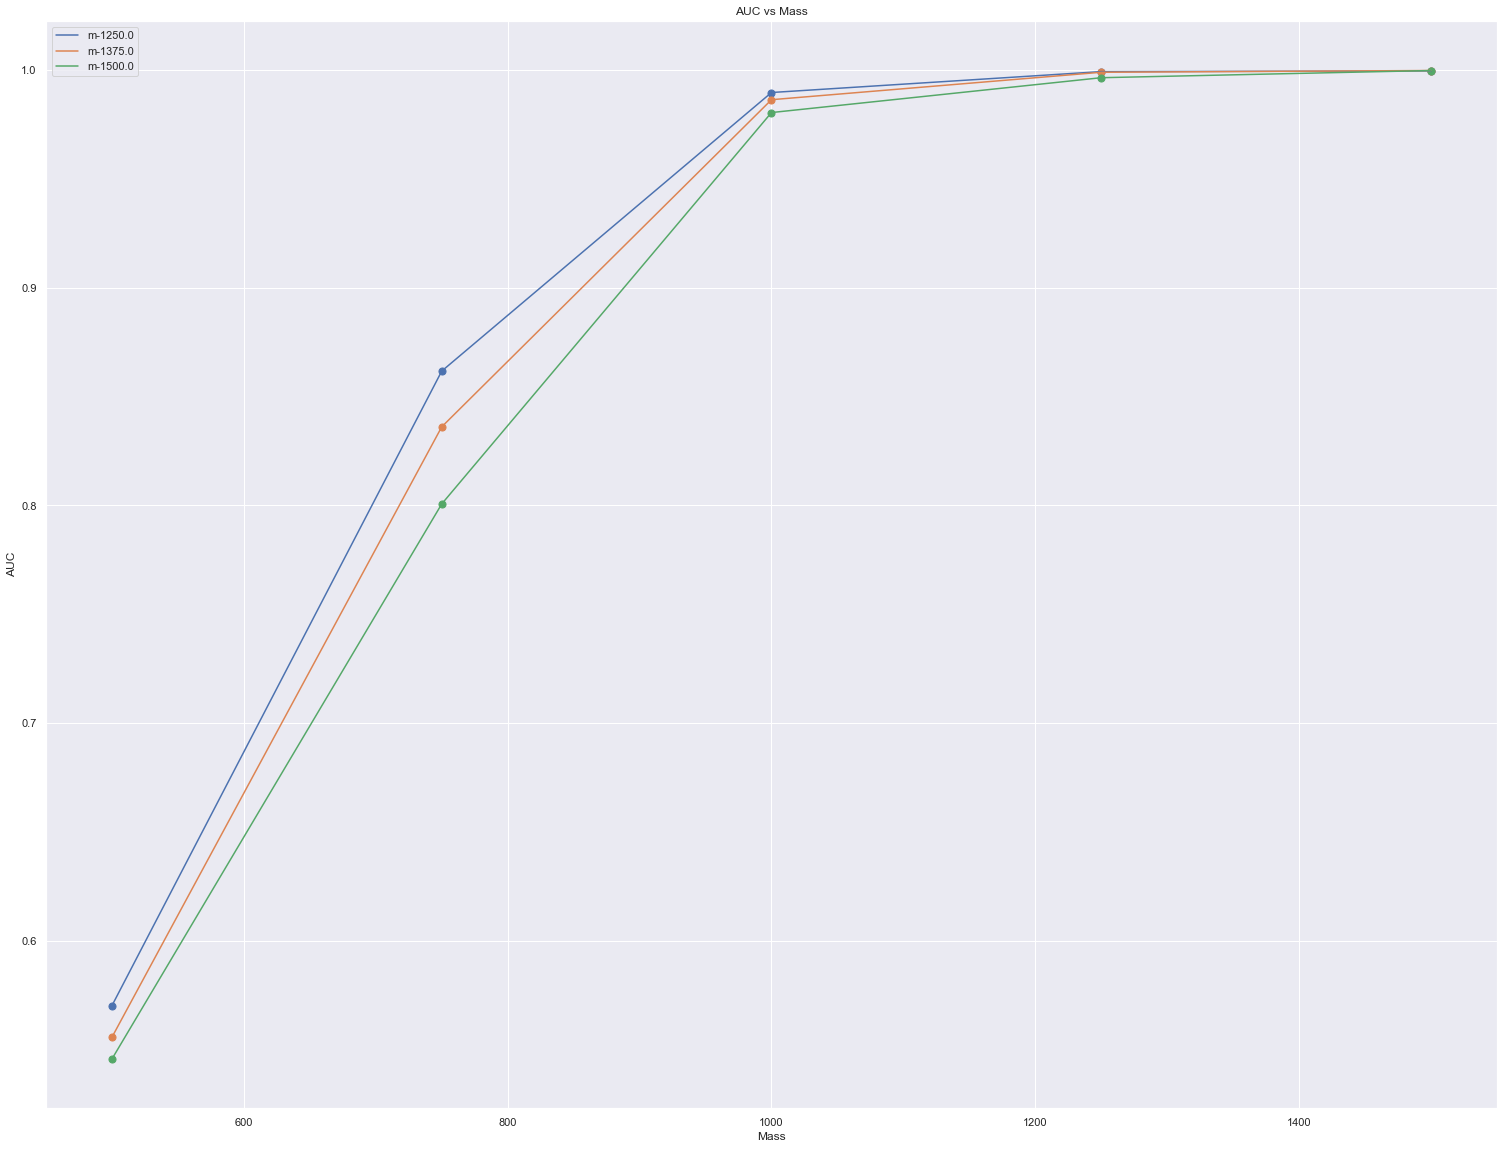

In [18]:
# 1250, 1500
_ = auc_vs_no_mass(model, data, auc_index=2, 
                   fake_mass=[mass[3], np.mean(mass[3:]), mass[4]], verbose=0, silent=True)

Feature reliance

In [11]:
num_features = len(data.columns['feature'])

# list of dict
features = []

j = -1
for i in range(num_features):
    # add an entry telling to drop only the i-th feature column
    if i % 5 == 0:
        features.append({'all': [], 'none': np.arange(0, num_features)})
        j += 1

    features[j][f'no-{i}'] = [i]
    

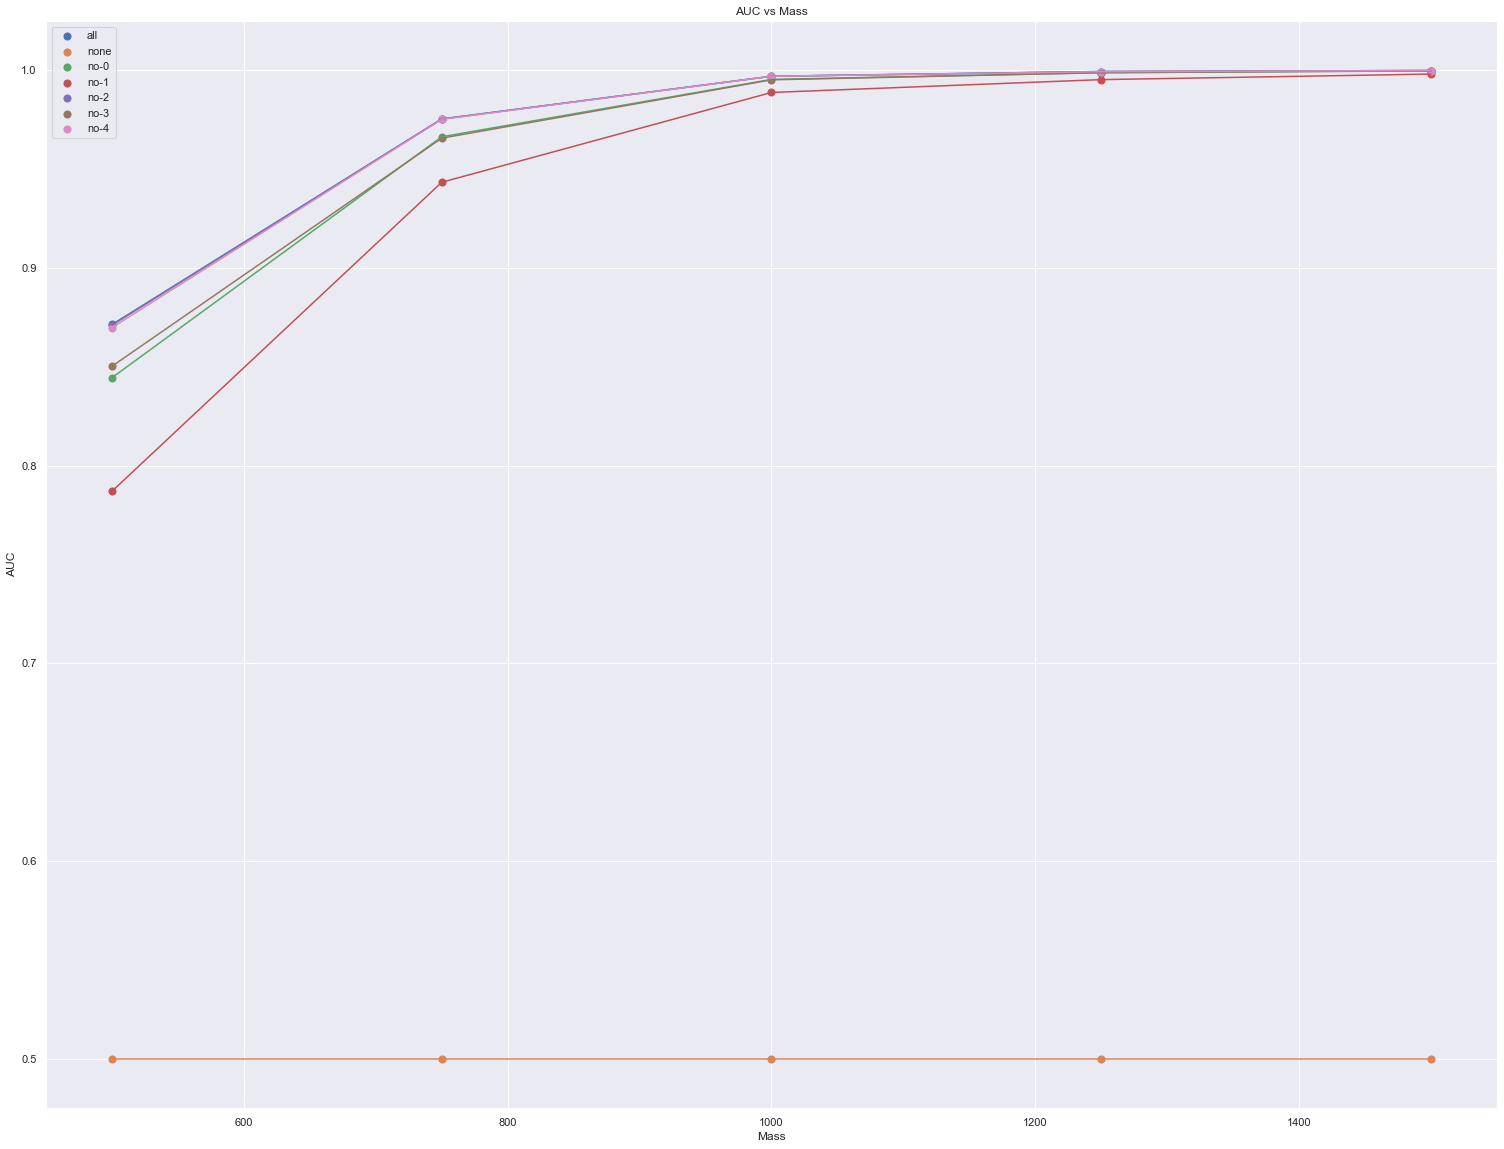

In [22]:
# 1st to 5th
_ = auc_vs_mass_no_features(model, data, auc_index=2, features=features[0], verbose=0, silent=True)

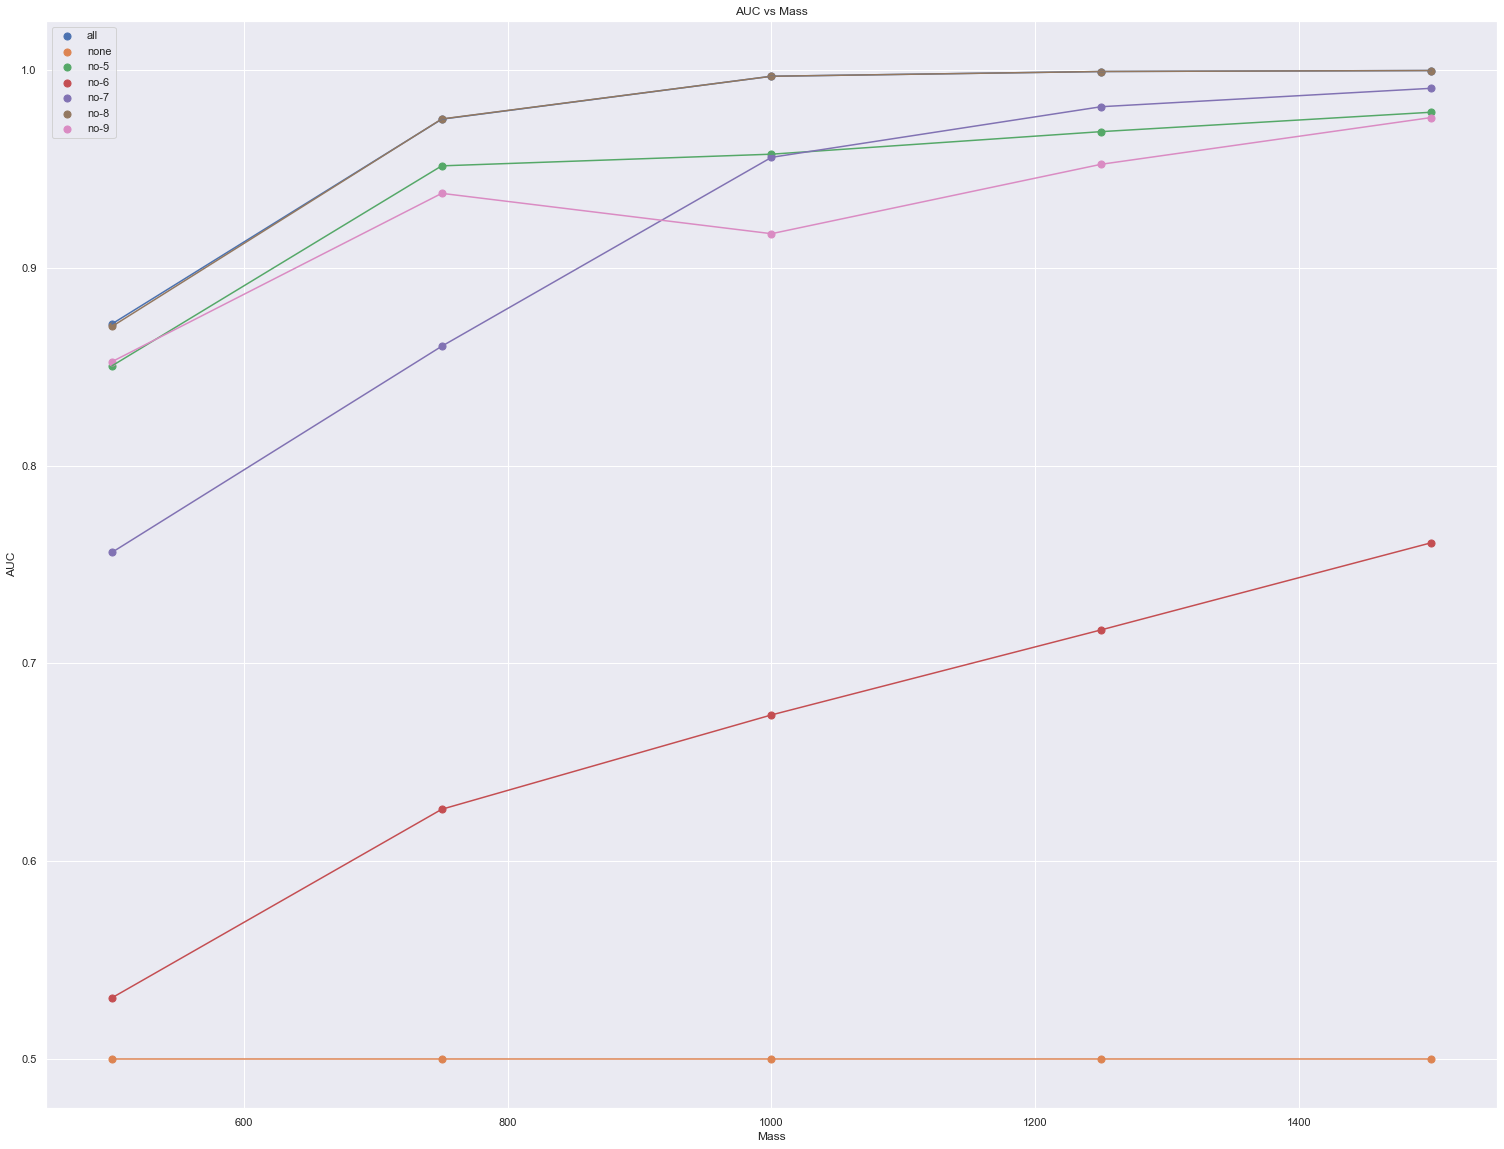

In [12]:
# 6th to 11th
_ = auc_vs_mass_no_features(model, data, auc_index=2, features=features[1], sample_frac=0.25,
                            verbose=0, silent=True)

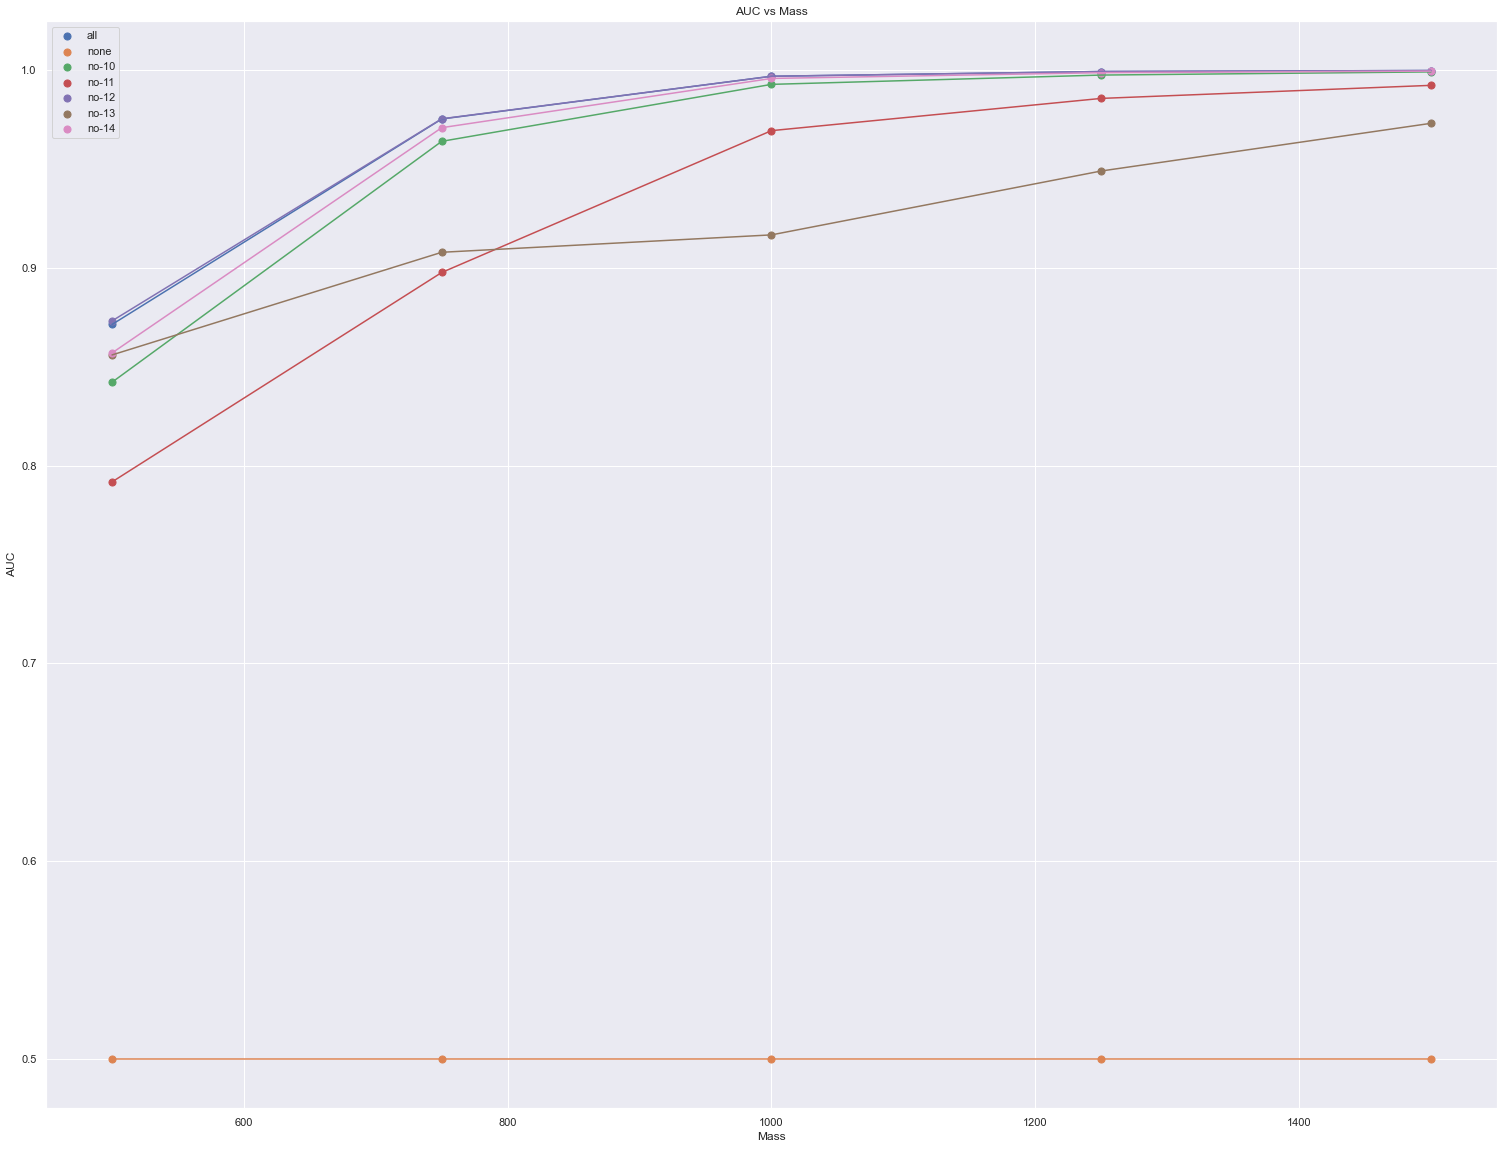

In [13]:
# 12st to 17th
_ = auc_vs_mass_no_features(model, data, auc_index=2, features=features[2], sample_frac=0.25,
                            verbose=0, silent=True)

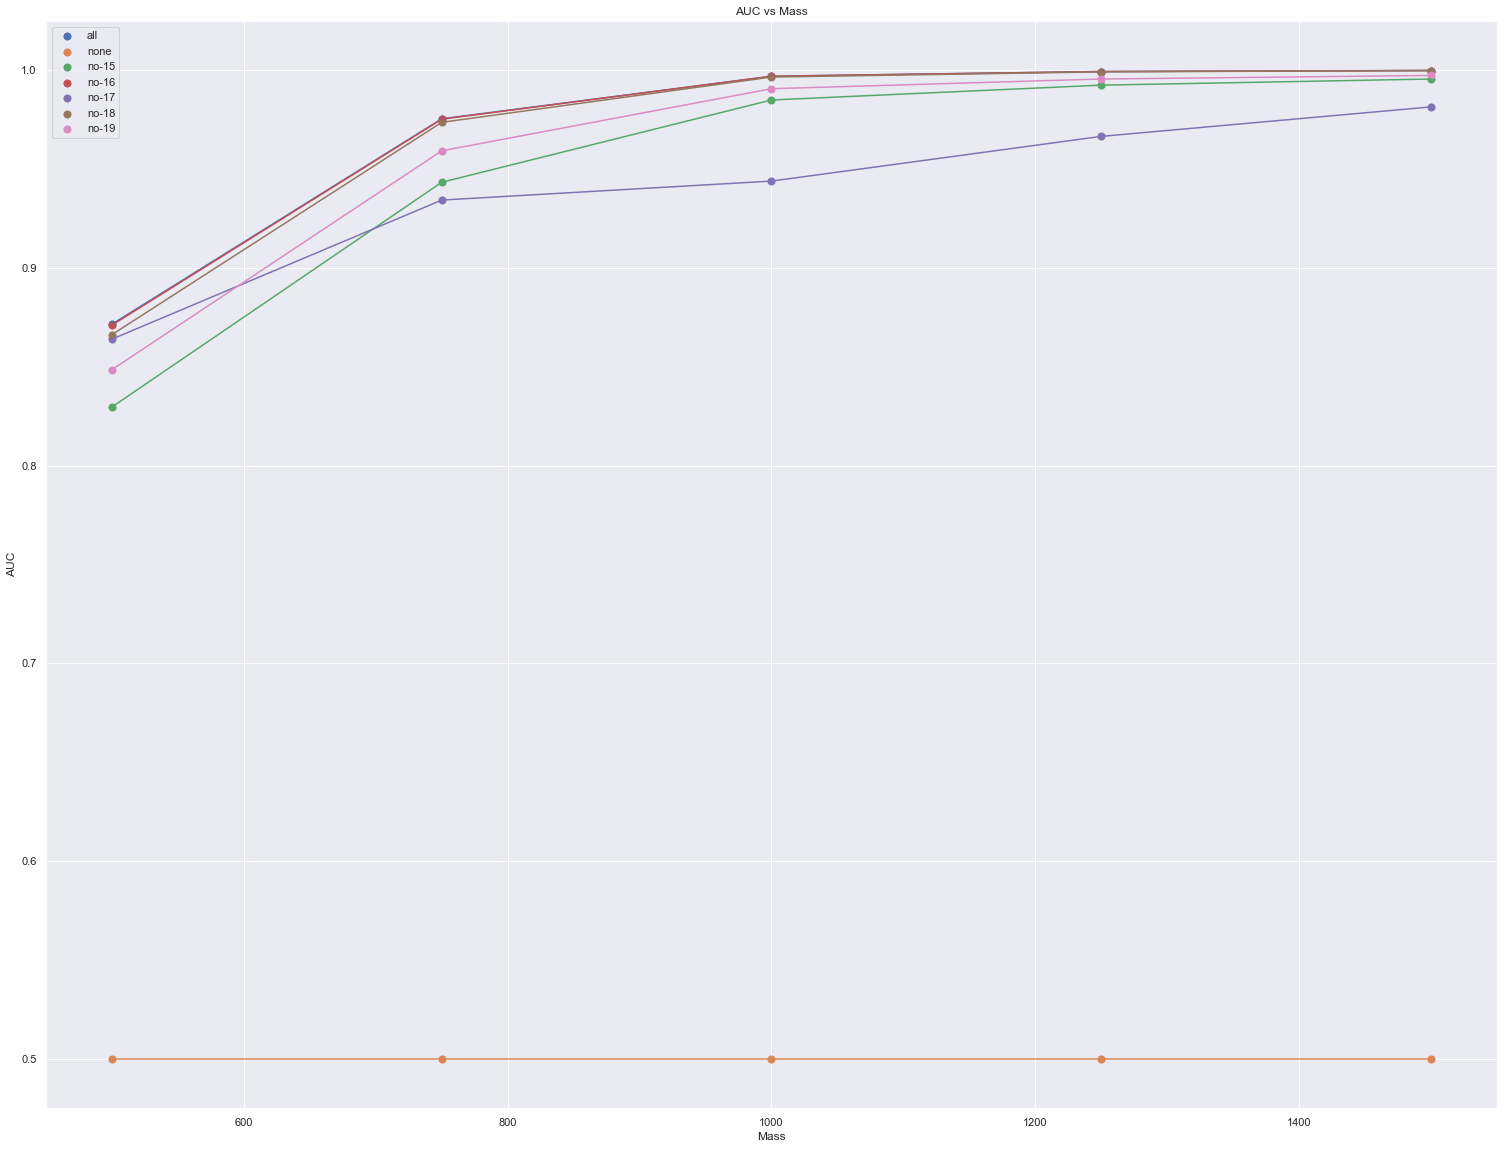

In [14]:
# 18st to 23th
_ = auc_vs_mass_no_features(model, data, auc_index=2, features=features[3], sample_frac=0.25,
                            verbose=0, silent=True)

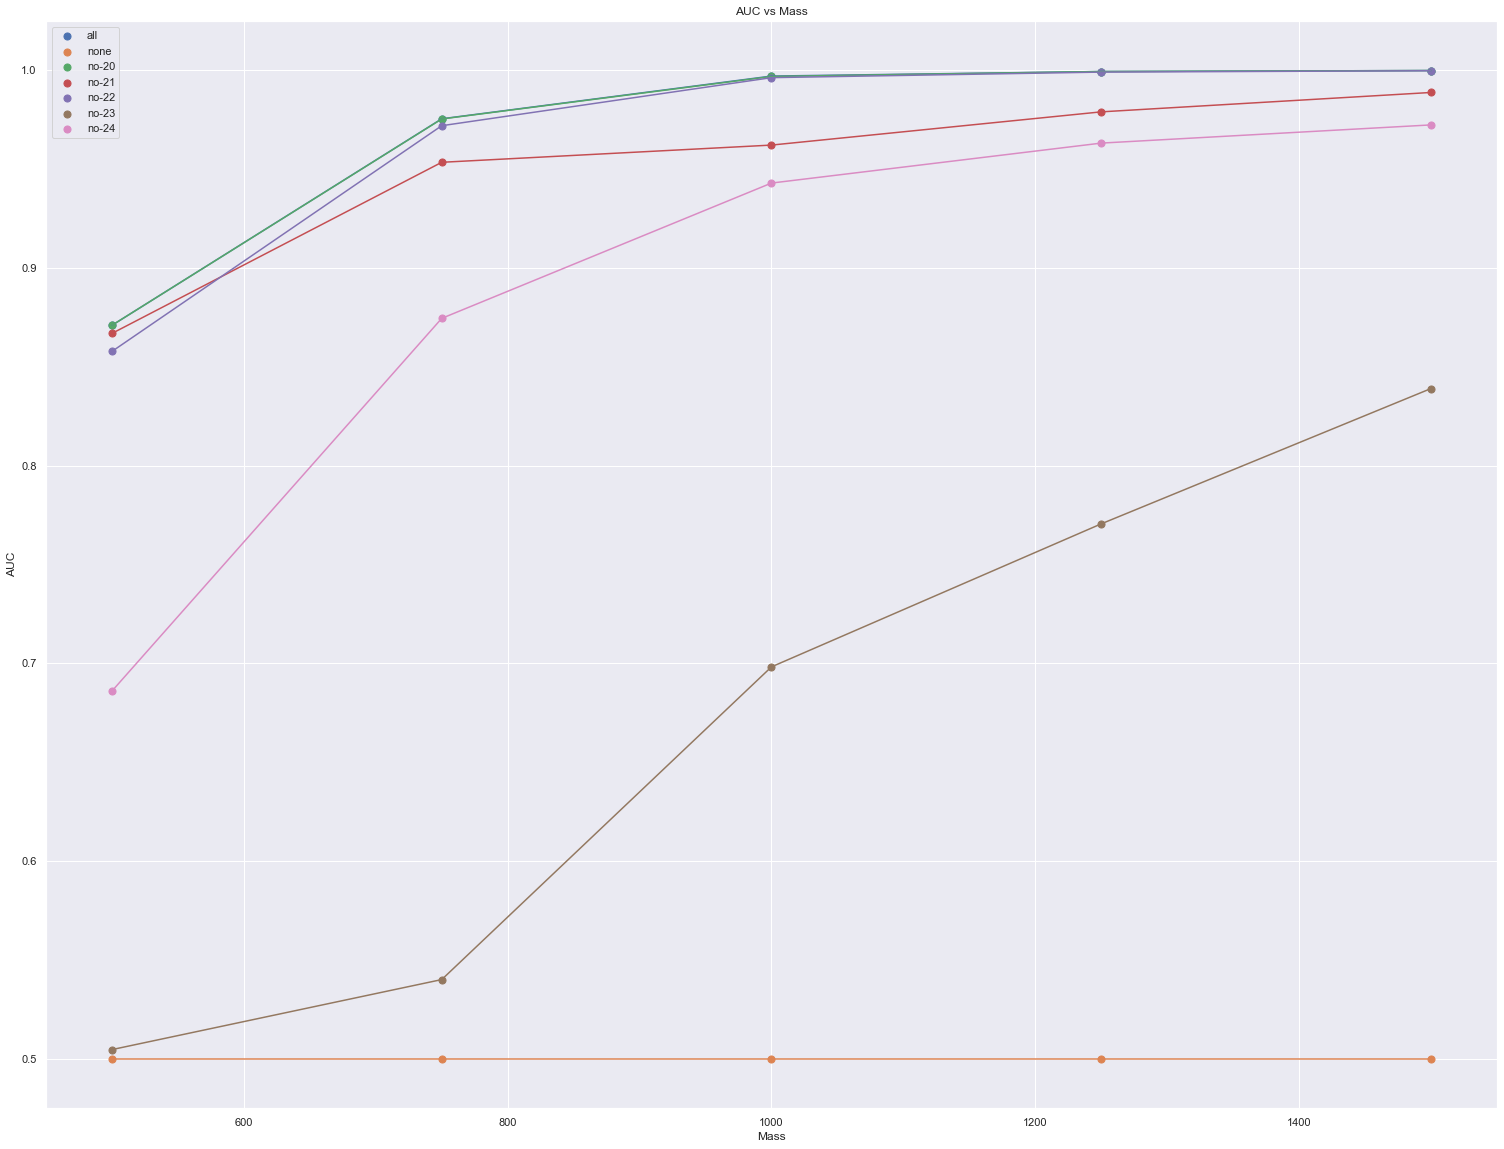

In [15]:
# 24st to 26th
_ = auc_vs_mass_no_features(model, data, auc_index=2, features=features[4], sample_frac=0.25,
                            verbose=0, silent=True)